<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Feature-Selection-Techniques" data-toc-modified-id="Feature-Selection-Techniques-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Feature Selection Techniques</a></span></li><li><span><a href="#Check-out-the-Data" data-toc-modified-id="Check-out-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check out the Data</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Shapiro-for-Normality-test-of-All-Numeric-Columns" data-toc-modified-id="Shapiro-for-Normality-test-of-All-Numeric-Columns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Shapiro for Normality test of All Numeric Columns</a></span></li><li><span><a href="#Spearman-Correlation-Test-for-Measures-of-Association-between-non-normal-Datas" data-toc-modified-id="Spearman-Correlation-Test-for-Measures-of-Association-between-non-normal-Datas-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Spearman Correlation Test for Measures of Association between non-normal Datas</a></span></li><li><span><a href="#Outlier-Treatment/Check" data-toc-modified-id="Outlier-Treatment/Check-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Outlier Treatment/Check</a></span></li><li><span><a href="#Skewness-Check" data-toc-modified-id="Skewness-Check-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Skewness Check</a></span></li><li><span><a href="#Exploratory-Data-Analysis-(-EDA-)" data-toc-modified-id="Exploratory-Data-Analysis-(-EDA-)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exploratory Data Analysis ( EDA )</a></span></li><li><span><a href="#Measures-of-Association-between-Continuous-and-Categorical-Variables" data-toc-modified-id="Measures-of-Association-between-Continuous-and-Categorical-Variables-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Measures of Association between Continuous and Categorical Variables</a></span></li><li><span><a href="#Removal/Selection-of-Categorical-Features" data-toc-modified-id="Removal/Selection-of-Categorical-Features-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Removal/Selection of Categorical Features</a></span></li><li><span><a href="#HP-Category-New-Feature-Creation" data-toc-modified-id="HP-Category-New-Feature-Creation-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>HP-Category New Feature Creation</a></span></li><li><span><a href="#Verify-Skewness" data-toc-modified-id="Verify-Skewness-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Verify Skewness</a></span></li><li><span><a href="#For-Regression,-Label-should-be-in-2D-and-Features-in-2D-format" data-toc-modified-id="For-Regression,-Label-should-be-in-2D-and-Features-in-2D-format-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>For Regression, Label should be in 2D and Features in 2D format</a></span></li><li><span><a href="#Encoding-Technique" data-toc-modified-id="Encoding-Technique-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Encoding Technique</a></span></li><li><span><a href="#Regression-Evaluation-Metrics" data-toc-modified-id="Regression-Evaluation-Metrics-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Regression Evaluation Metrics</a></span></li><li><span><a href="#Heteroscedasticity-Tests" data-toc-modified-id="Heteroscedasticity-Tests-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Heteroscedasticity Tests</a></span></li><li><span><a href="#Auto-Correlation-plot" data-toc-modified-id="Auto-Correlation-plot-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Auto-Correlation plot</a></span></li></ul></div>

1  Prediction of car prices
1.0.1  Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.

The company wants to know:
Which variables are significant in predicting the price of a car.
How well those variables describe the price of a car.

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

1.0.2  Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Feature Selection Techniques
1. Peecent missing values (Remove the features that have high % of missing values).
2. Amount of variation:- if a feature is mostly all the same value, then the model is not going to learn anything from it.
3. Pair wise Correlations... if two of your features are highly correlated you can drop one because the Redundant.
4. Multicolinearity(VIF)
5. Correlation with the Target/Feature Column
6. Ridge Regression & Lasso Regression
7. Principle Component Analysis

In [2]:
# import all libraries and dependencies for dataframe
from numpy import *
from pandas import *
from scipy import *
from matplotlib.pyplot import *
from seaborn import *
#from statsmodels.api import *
from statsmodels.formula.api import *
from pylab import rcParams
#import warnings
#warnings.filterwarnings("ignore")
# Don't need to type show() command further if you do %matplotlib inline
%matplotlib inline
from statsmodels.tsa.api import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
#from datetime import datetime, timedelta

In [3]:
# import all libraries and dependencies for data visualization
rcParams['figure.figsize'] = [10,10]
set(style='darkgrid')
rcParams["scatter.edgecolors"]='black'
from matplotlib.ticker import *
#Set Option for Displaying All Columns of a Pandas DataFrame
#Set Option for Displaying All Rows of a Pandas DataFrame
set_option('display.max_columns',None)
set_option('display.max_rows',None)

# Check out the Data

In [4]:
# sep=',' to align the DataFrame properly
# header='infer' which Row should be taken as header, default behaviour is to infer the Column names as header
# header=0 means 0th Row index should be taken as header
# na_values=None or na_values="String" or na_values=["String1","String2"] if you wanna specify any "String" as NaN
# keep_default_na=True by default ‘#N/A’,‘#N/A N/A’,‘#NA’,‘-1.#IND’,‘-1.#QNAN’,‘-NaN’,‘-nan’,‘1.#IND’,‘1.#QNAN’,‘N/A’,‘NA’,‘NULL’,‘NaN’,‘n/a’,‘nan’,‘null’ will be treated as NaN
# na_filter=True blank cells will be treated as NaN
# index_col=None works just like set_index() & you just need to type the column name to be set as index column

CAR=read_csv("DataFile\\CarPrice_Assignment.csv",sep=',',header='infer',na_values=None,keep_default_na=True,na_filter=True,index_col=None) #Write the file path & name inside ("")
CAR

car_ID  symboling                          CarName fueltype aspiration  \
0         1          3               alfa-romero giulia      gas        std   
1         2          3              alfa-romero stelvio      gas        std   
2         3          1         alfa-romero Quadrifoglio      gas        std   
3         4          2                      audi 100 ls      gas        std   
4         5          2                       audi 100ls      gas        std   
5         6          2                         audi fox      gas        std   
6         7          1                       audi 100ls      gas        std   
7         8          1                        audi 5000      gas        std   
8         9          1                        audi 4000      gas      turbo   
9        10          0              audi 5000s (diesel)      gas      turbo   
10       11          2                         bmw 320i      gas        std   
11       12          0                         bmw 320i      gas        std   
12       13          0                           bmw x1      gas        std   
13       14          0                           bmw x3      gas        std   
14       15          1                           bmw z4      gas        std   
15       16          0                           bmw x4      gas        std   
16       17          0                           bmw x5      gas        std   
17       18          0                           bmw x3      gas        std   
18       19          2                 chevrolet impala      gas        std   
19       20          1            chevrolet monte carlo      gas        std   
20       21          0              chevrolet vega 2300      gas        std   
21       22          1                    dodge rampage      gas        std   
22       23          1              dodge challenger se      gas        std   
23       24          1                       dodge d200      gas      turbo   
24       25          1                dodge monaco (sw)      gas        std   
25       26          1               dodge colt hardtop      gas        std   
26       27          1                  dodge colt (sw)      gas        std   
27       28          1             dodge coronet custom      gas      turbo   
28       29         -1                dodge dart custom      gas        std   
29       30          3        dodge coronet custom (sw)      gas      turbo   
30       31          2                      honda civic      gas        std   
31       32          2                 honda civic cvcc      gas        std   
32       33          1                      honda civic      gas        std   
33       34          1                honda accord cvcc      gas        std   
34       35          1                 honda civic cvcc      gas        std   
35       36          0                  honda accord lx      gas        std   
36       37          0              honda civic 1500 gl      gas        std   
37       38          0                     honda accord      gas        std   
38       39          0                 honda civic 1300      gas        std   
39       40          0                    honda prelude      gas        std   
40       41          0                     honda accord      gas        std   
41       42          0                      honda civic      gas        std   
42       43          1               honda civic (auto)      gas        std   
43       44          0                       isuzu MU-X      gas        std   
44       45          1                     isuzu D-Max       gas        std   
45       46          0              isuzu D-Max V-Cross      gas        std   
46       47          2                     isuzu D-Max       gas        std   
47       48          0                        jaguar xj      gas        std   
48       49          0                        jaguar xf      gas        std   
49       50          0                        jaguar xk

In [5]:
#Set Option for Displaying All Columns of a Pandas DataFrame
#Set Option for Displaying All Rows of a Pandas DataFrame
set_option('display.max_columns',None)
set_option('display.max_rows',None)
CAR

car_ID  symboling                          CarName fueltype aspiration  \
0         1          3               alfa-romero giulia      gas        std   
1         2          3              alfa-romero stelvio      gas        std   
2         3          1         alfa-romero Quadrifoglio      gas        std   
3         4          2                      audi 100 ls      gas        std   
4         5          2                       audi 100ls      gas        std   
5         6          2                         audi fox      gas        std   
6         7          1                       audi 100ls      gas        std   
7         8          1                        audi 5000      gas        std   
8         9          1                        audi 4000      gas      turbo   
9        10          0              audi 5000s (diesel)      gas      turbo   
10       11          2                         bmw 320i      gas        std   
11       12          0                         bmw 320i      gas        std   
12       13          0                           bmw x1      gas        std   
13       14          0                           bmw x3      gas        std   
14       15          1                           bmw z4      gas        std   
15       16          0                           bmw x4      gas        std   
16       17          0                           bmw x5      gas        std   
17       18          0                           bmw x3      gas        std   
18       19          2                 chevrolet impala      gas        std   
19       20          1            chevrolet monte carlo      gas        std   
20       21          0              chevrolet vega 2300      gas        std   
21       22          1                    dodge rampage      gas        std   
22       23          1              dodge challenger se      gas        std   
23       24          1                       dodge d200      gas      turbo   
24       25          1                dodge monaco (sw)      gas        std   
25       26          1               dodge colt hardtop      gas        std   
26       27          1                  dodge colt (sw)      gas        std   
27       28          1             dodge coronet custom      gas      turbo   
28       29         -1                dodge dart custom      gas        std   
29       30          3        dodge coronet custom (sw)      gas      turbo   
30       31          2                      honda civic      gas        std   
31       32          2                 honda civic cvcc      gas        std   
32       33          1                      honda civic      gas        std   
33       34          1                honda accord cvcc      gas        std   
34       35          1                 honda civic cvcc      gas        std   
35       36          0                  honda accord lx      gas        std   
36       37          0              honda civic 1500 gl      gas        std   
37       38          0                     honda accord      gas        std   
38       39          0                 honda civic 1300      gas        std   
39       40          0                    honda prelude      gas        std   
40       41          0                     honda accord      gas        std   
41       42          0                      honda civic      gas        std   
42       43          1               honda civic (auto)      gas        std   
43       44          0                       isuzu MU-X      gas        std   
44       45          1                     isuzu D-Max       gas        std   
45       46          0              isuzu D-Max V-Cross      gas        std   
46       47          2                     isuzu D-Max       gas        std   
47       48          0                        jaguar xj      gas        std   
48       49          0                        jaguar xf      gas        std   
49       50          0                        jaguar xk

In [6]:
# CAR is a DataFrame in type
type(CAR)

pandas.core.frame.DataFrame

In [7]:
# It shows type of the DataFrame
# Shows no of Rows & Cols
# Shows all Col names
# Shows total no of NaN values for each Column
# Shows data type of each Column
CAR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
#Shows no of Rows & Cols
CAR.shape
shape(CAR)

D:\D Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.shape is deprecated and will be removed in SciPy 2.0.0, use numpy.shape instead
  This is separate from the ipykernel package so we can avoid doing imports until


(205, 26)

In [9]:
# Shows data type of each column
# Object column generally contains "string" & arbitrary python objects like List, Dictionary, Tuple etc
CAR.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [10]:
# Total no of NaN Values in each column
# Shows which col has how many no of NaN values in total
# No Column has NaN value
CAR.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Data Preprocessing

In [11]:
# detect duplicate DataFrame rows: True if an entire row is identical to a previous row
CAR.duplicated().tail()

200    False
201    False
202    False
203    False
204    False
dtype: bool

In [12]:
# count the duplicate rows in the DataFrame
CAR.duplicated().sum()

0

In [13]:
# examine the duplicate rows (ignoring the first occurrence)
CAR.loc[CAR.duplicated(keep='first'), :]

Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

In [14]:
# drop the duplicate rows (inplace=False by default)
CAR.drop_duplicates(keep='first', inplace=True)
CAR.shape

(205, 26)

In [15]:
CAR.describe() #It prints the statistics of the data file
               #This shows the statistical informations of numerical cols only
               #Only numeric cols have been taken into account

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [16]:
CAR.columns #Shows all col names only

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [17]:
CAR.drop(columns="car_ID",axis=1,inplace=True) #Remove the "car_ID" col from CAR data
CAR.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [18]:
#Rename the Data cols "symboling" as "InsuranceRisk", "citympg" as "CityMileage", "highwaympg" as "HighwayMileage"
CAR.rename(columns={"symboling":"InsuranceRisk","citympg":"CityMileage","highwaympg":"HighwayMileage","CarName":"CarModel"},inplace=True)
CAR.columns

Index(['InsuranceRisk', 'CarModel', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'CityMileage', 'HighwayMileage', 'price'],
      dtype='object')

In [19]:
# sort the entire CAR DataFrame by the "price" Series/Column (returns a DataFrame)
CAR.sort_values("price",inplace=True)
CAR.sort_values(["price"],inplace=True)

In [20]:
CAR

InsuranceRisk                         CarModel fueltype aspiration  \
138              2                           subaru      gas        std   
18               2                 chevrolet impala      gas        std   
50               1                        maxda rx3      gas        std   
150              1            toyota corona mark ii      gas        std   
76               2                mitsubishi mirage      gas        std   
32               1                      honda civic      gas        std   
89               1                     Nissan versa      gas        std   
118              1                plymouth fury iii      gas        std   
21               1                    dodge rampage      gas        std   
51               1                 maxda glc deluxe      gas        std   
77               2                mitsubishi lancer      gas        std   
24               1                dodge monaco (sw)      gas        std   
120              1                plymouth fury iii      gas        std   
19               1            chevrolet monte carlo      gas        std   
151              1                    toyota corona      gas        std   
22               1              dodge challenger se      gas        std   
30               2                      honda civic      gas        std   
152              1              toyota corolla 1200      gas        std   
33               1                honda accord cvcc      gas        std   
20               0              chevrolet vega 2300      gas        std   
91               1                     nissan rogue      gas        std   
78               2             mitsubishi outlander      gas        std   
25               1               dodge colt hardtop      gas        std   
121              1   plymouth satellite custom (sw)      gas        std   
53               1                       mazda rx-4      gas        std   
43               0                       isuzu MU-X      gas        std   
52               1                  mazda rx2 coupe      gas        std   
92               1                     nissan latio      gas        std   
31               2                 honda civic cvcc      gas        std   
153              0            toyota corona hardtop      gas        std   
156              0                   toyota mark ii      gas        std   
85               1               mitsubishi montero      gas        std   
139              2                        subaru dl      gas        std   
90               1                      nissan gt-r   diesel        std   
141              0                           subaru      gas        std   
34               1                 honda civic cvcc      gas        std   
157              0              toyota corolla 1200      gas        std   
35               0                  honda accord lx      gas        std   
36               0              honda civic 1500 gl      gas        std   
94               1                      nissan leaf      gas        std   
93               1                     nissan titan      gas        std   
54               1                 mazda glc deluxe      gas        std   
146              0                    subaru trezia      gas        std   
96               1                     nissan latio      gas        std   
140              2                        subaru dl      gas        std   
26               1                  dodge colt (sw)      gas        std   
122              1         plymouth fury gran sedan      gas        std   
79               1                    mitsubishi g4      gas      turbo   
160              0                    toyota corona      gas        std   
142              0                       subaru brz      gas        std   
182              2                 vokswagen rabbit   diesel        std   
159              0                   toyota corolla   diesel        std   
95               1            

In [21]:
# Reset the Index Sequence after Sorting the CAR DataFrame as per "price" series/column
CAR.reset_index(inplace=True)
CAR

index  InsuranceRisk                         CarModel fueltype  \
0      138              2                           subaru      gas   
1       18              2                 chevrolet impala      gas   
2       50              1                        maxda rx3      gas   
3      150              1            toyota corona mark ii      gas   
4       76              2                mitsubishi mirage      gas   
5       32              1                      honda civic      gas   
6       89              1                     Nissan versa      gas   
7      118              1                plymouth fury iii      gas   
8       21              1                    dodge rampage      gas   
9       51              1                 maxda glc deluxe      gas   
10      77              2                mitsubishi lancer      gas   
11      24              1                dodge monaco (sw)      gas   
12     120              1                plymouth fury iii      gas   
13      19              1            chevrolet monte carlo      gas   
14     151              1                    toyota corona      gas   
15      22              1              dodge challenger se      gas   
16      30              2                      honda civic      gas   
17     152              1              toyota corolla 1200      gas   
18      33              1                honda accord cvcc      gas   
19      20              0              chevrolet vega 2300      gas   
20      91              1                     nissan rogue      gas   
21      78              2             mitsubishi outlander      gas   
22      25              1               dodge colt hardtop      gas   
23     121              1   plymouth satellite custom (sw)      gas   
24      53              1                       mazda rx-4      gas   
25      43              0                       isuzu MU-X      gas   
26      52              1                  mazda rx2 coupe      gas   
27      92              1                     nissan latio      gas   
28      31              2                 honda civic cvcc      gas   
29     153              0            toyota corona hardtop      gas   
30     156              0                   toyota mark ii      gas   
31      85              1               mitsubishi montero      gas   
32     139              2                        subaru dl      gas   
33      90              1                      nissan gt-r   diesel   
34     141              0                           subaru      gas   
35      34              1                 honda civic cvcc      gas   
36     157              0              toyota corolla 1200      gas   
37      35              0                  honda accord lx      gas   
38      36              0              honda civic 1500 gl      gas   
39      94              1                      nissan leaf      gas   
40      93              1                     nissan titan      gas   
41      54              1                 mazda glc deluxe      gas   
42     146              0                    subaru trezia      gas   
43      96              1                     nissan latio      gas   
44     140              2                        subaru dl      gas   
45      26              1                  dodge colt (sw)      gas   
46     122              1         plymouth fury gran sedan      gas   
47      79              1                    mitsubishi g4      gas   
48     160              0                    toyota corona      gas   
49     142              0                       subaru brz      gas   
50     182              2                 vokswagen rabbit   diesel   
51     159              0                   toyota corolla   diesel   
52      95              1                      nissan juke      gas   
53      37              0                     honda accord      gas   
54     154              0         toyota corolla 1600 (sw)      gas   
55     158              0    

In [22]:
# Shows the Unique Elements/Entries of "InsuranceRisk" Column
CAR["InsuranceRisk"].unique()

array([ 2,  1,  0,  3, -1, -2], dtype=int64)

In [23]:
# We will rename/replace the Unique Elements/Entries of "InsuranceRisk" Column
# As 3 = High Risk, 2 = Medium Risk, 1 = Low Risk, 0 = Neutral, -1 = Safe -2 = Very Safe
#CAR["InsuranceRisk"].replace({3:'High Risk',2:'Medium Risk',1:'Low Risk',0:'Neutral',-1:'Safe',-2:'Very Safe'},inplace=True)
#CAR

In [24]:
# We will rename/replace the Unique Elements/Entries of "doornumber" Column
# As two = 2, four = 4
CAR["doornumber"].replace({'two':2,'four':4},inplace=True)
CAR

index  InsuranceRisk                         CarModel fueltype  \
0      138              2                           subaru      gas   
1       18              2                 chevrolet impala      gas   
2       50              1                        maxda rx3      gas   
3      150              1            toyota corona mark ii      gas   
4       76              2                mitsubishi mirage      gas   
5       32              1                      honda civic      gas   
6       89              1                     Nissan versa      gas   
7      118              1                plymouth fury iii      gas   
8       21              1                    dodge rampage      gas   
9       51              1                 maxda glc deluxe      gas   
10      77              2                mitsubishi lancer      gas   
11      24              1                dodge monaco (sw)      gas   
12     120              1                plymouth fury iii      gas   
13      19              1            chevrolet monte carlo      gas   
14     151              1                    toyota corona      gas   
15      22              1              dodge challenger se      gas   
16      30              2                      honda civic      gas   
17     152              1              toyota corolla 1200      gas   
18      33              1                honda accord cvcc      gas   
19      20              0              chevrolet vega 2300      gas   
20      91              1                     nissan rogue      gas   
21      78              2             mitsubishi outlander      gas   
22      25              1               dodge colt hardtop      gas   
23     121              1   plymouth satellite custom (sw)      gas   
24      53              1                       mazda rx-4      gas   
25      43              0                       isuzu MU-X      gas   
26      52              1                  mazda rx2 coupe      gas   
27      92              1                     nissan latio      gas   
28      31              2                 honda civic cvcc      gas   
29     153              0            toyota corona hardtop      gas   
30     156              0                   toyota mark ii      gas   
31      85              1               mitsubishi montero      gas   
32     139              2                        subaru dl      gas   
33      90              1                      nissan gt-r   diesel   
34     141              0                           subaru      gas   
35      34              1                 honda civic cvcc      gas   
36     157              0              toyota corolla 1200      gas   
37      35              0                  honda accord lx      gas   
38      36              0              honda civic 1500 gl      gas   
39      94              1                      nissan leaf      gas   
40      93              1                     nissan titan      gas   
41      54              1                 mazda glc deluxe      gas   
42     146              0                    subaru trezia      gas   
43      96              1                     nissan latio      gas   
44     140              2                        subaru dl      gas   
45      26              1                  dodge colt (sw)      gas   
46     122              1         plymouth fury gran sedan      gas   
47      79              1                    mitsubishi g4      gas   
48     160              0                    toyota corona      gas   
49     142              0                       subaru brz      gas   
50     182              2                 vokswagen rabbit   diesel   
51     159              0                   toyota corolla   diesel   
52      95              1                      nissan juke      gas   
53      37              0                     honda accord      gas   
54     154              0         toyota corolla 1600 (sw)      gas   
55     158              0    

In [25]:
# Shows the Unique Elements/Entries of "cylindernumber" Column
CAR["cylindernumber"].unique()

array(['four', 'three', 'two', 'five', 'six', 'eight', 'twelve'],
      dtype=object)

In [26]:
# We will rename/replace the Unique Elements/Entries of "cylindernumber" Column
# As four = 4, six = 6, five = 5, three = 3, twelve = 12, two = 2, eight = 8
CAR["cylindernumber"].replace({'two':2,'four':4,'six':6,'three':3,'five':5,'twelve':12,'eight':8},inplace=True)
CAR

index  InsuranceRisk                         CarModel fueltype  \
0      138              2                           subaru      gas   
1       18              2                 chevrolet impala      gas   
2       50              1                        maxda rx3      gas   
3      150              1            toyota corona mark ii      gas   
4       76              2                mitsubishi mirage      gas   
5       32              1                      honda civic      gas   
6       89              1                     Nissan versa      gas   
7      118              1                plymouth fury iii      gas   
8       21              1                    dodge rampage      gas   
9       51              1                 maxda glc deluxe      gas   
10      77              2                mitsubishi lancer      gas   
11      24              1                dodge monaco (sw)      gas   
12     120              1                plymouth fury iii      gas   
13      19              1            chevrolet monte carlo      gas   
14     151              1                    toyota corona      gas   
15      22              1              dodge challenger se      gas   
16      30              2                      honda civic      gas   
17     152              1              toyota corolla 1200      gas   
18      33              1                honda accord cvcc      gas   
19      20              0              chevrolet vega 2300      gas   
20      91              1                     nissan rogue      gas   
21      78              2             mitsubishi outlander      gas   
22      25              1               dodge colt hardtop      gas   
23     121              1   plymouth satellite custom (sw)      gas   
24      53              1                       mazda rx-4      gas   
25      43              0                       isuzu MU-X      gas   
26      52              1                  mazda rx2 coupe      gas   
27      92              1                     nissan latio      gas   
28      31              2                 honda civic cvcc      gas   
29     153              0            toyota corona hardtop      gas   
30     156              0                   toyota mark ii      gas   
31      85              1               mitsubishi montero      gas   
32     139              2                        subaru dl      gas   
33      90              1                      nissan gt-r   diesel   
34     141              0                           subaru      gas   
35      34              1                 honda civic cvcc      gas   
36     157              0              toyota corolla 1200      gas   
37      35              0                  honda accord lx      gas   
38      36              0              honda civic 1500 gl      gas   
39      94              1                      nissan leaf      gas   
40      93              1                     nissan titan      gas   
41      54              1                 mazda glc deluxe      gas   
42     146              0                    subaru trezia      gas   
43      96              1                     nissan latio      gas   
44     140              2                        subaru dl      gas   
45      26              1                  dodge colt (sw)      gas   
46     122              1         plymouth fury gran sedan      gas   
47      79              1                    mitsubishi g4      gas   
48     160              0                    toyota corona      gas   
49     142              0                       subaru brz      gas   
50     182              2                 vokswagen rabbit   diesel   
51     159              0                   toyota corolla   diesel   
52      95              1                      nissan juke      gas   
53      37              0                     honda accord      gas   
54     154              0         toyota corolla 1600 (sw)      gas   
55     158              0    

In [27]:
# Shows the Unique Elements/Entries of "CarModel" Column
CAR["CarModel"].unique()

array(['subaru', 'chevrolet impala', 'maxda rx3', 'toyota corona mark ii',
       'mitsubishi mirage', 'honda civic', 'Nissan versa',
       'plymouth fury iii', 'dodge rampage', 'maxda glc deluxe',
       'mitsubishi lancer', 'dodge monaco (sw)', 'chevrolet monte carlo',
       'toyota corona', 'dodge challenger se', 'toyota corolla 1200',
       'honda accord cvcc', 'chevrolet vega 2300', 'nissan rogue',
       'mitsubishi outlander', 'dodge colt hardtop',
       'plymouth satellite custom (sw)', 'mazda rx-4', 'isuzu MU-X',
       'mazda rx2 coupe', 'nissan latio', 'honda civic cvcc',
       'toyota corona hardtop', 'toyota mark ii', 'mitsubishi montero',
       'subaru dl', 'nissan gt-r', 'honda accord lx',
       'honda civic 1500 gl', 'nissan leaf', 'nissan titan',
       'mazda glc deluxe', 'subaru trezia', 'dodge colt (sw)',
       'plymouth fury gran sedan', 'mitsubishi g4', 'subaru brz',
       'vokswagen rabbit', 'toyota corolla', 'nissan juke',
       'honda accord', 'toyota

In [28]:
# It is observed that "CarModel" column elements/entries consists of two parts 'car company' + ' ' + 'Car Model'
# Let's split out car company to a new column.
CAR["Company"] = CAR.CarModel.str.split(' ').str.get(0).str.upper()

In [29]:
CAR

index  InsuranceRisk                         CarModel fueltype  \
0      138              2                           subaru      gas   
1       18              2                 chevrolet impala      gas   
2       50              1                        maxda rx3      gas   
3      150              1            toyota corona mark ii      gas   
4       76              2                mitsubishi mirage      gas   
5       32              1                      honda civic      gas   
6       89              1                     Nissan versa      gas   
7      118              1                plymouth fury iii      gas   
8       21              1                    dodge rampage      gas   
9       51              1                 maxda glc deluxe      gas   
10      77              2                mitsubishi lancer      gas   
11      24              1                dodge monaco (sw)      gas   
12     120              1                plymouth fury iii      gas   
13      19              1            chevrolet monte carlo      gas   
14     151              1                    toyota corona      gas   
15      22              1              dodge challenger se      gas   
16      30              2                      honda civic      gas   
17     152              1              toyota corolla 1200      gas   
18      33              1                honda accord cvcc      gas   
19      20              0              chevrolet vega 2300      gas   
20      91              1                     nissan rogue      gas   
21      78              2             mitsubishi outlander      gas   
22      25              1               dodge colt hardtop      gas   
23     121              1   plymouth satellite custom (sw)      gas   
24      53              1                       mazda rx-4      gas   
25      43              0                       isuzu MU-X      gas   
26      52              1                  mazda rx2 coupe      gas   
27      92              1                     nissan latio      gas   
28      31              2                 honda civic cvcc      gas   
29     153              0            toyota corona hardtop      gas   
30     156              0                   toyota mark ii      gas   
31      85              1               mitsubishi montero      gas   
32     139              2                        subaru dl      gas   
33      90              1                      nissan gt-r   diesel   
34     141              0                           subaru      gas   
35      34              1                 honda civic cvcc      gas   
36     157              0              toyota corolla 1200      gas   
37      35              0                  honda accord lx      gas   
38      36              0              honda civic 1500 gl      gas   
39      94              1                      nissan leaf      gas   
40      93              1                     nissan titan      gas   
41      54              1                 mazda glc deluxe      gas   
42     146              0                    subaru trezia      gas   
43      96              1                     nissan latio      gas   
44     140              2                        subaru dl      gas   
45      26              1                  dodge colt (sw)      gas   
46     122              1         plymouth fury gran sedan      gas   
47      79              1                    mitsubishi g4      gas   
48     160              0                    toyota corona      gas   
49     142              0                       subaru brz      gas   
50     182              2                 vokswagen rabbit   diesel   
51     159              0                   toyota corolla   diesel   
52      95              1                      nissan juke      gas   
53      37              0                     honda accord      gas   
54     154              0         toyota corolla 1600 (sw)      gas   
55     158              0    

In [30]:
# No of Unique entries/elements/Companies in "Company" Column
# There are in total 27 Companies
len(CAR["Company"].unique())

27

In [31]:
# Shows Unique entries/elements/Companies of "Company" Column
CAR["Company"].unique()

array(['SUBARU', 'CHEVROLET', 'MAXDA', 'TOYOTA', 'MITSUBISHI', 'HONDA',
       'NISSAN', 'PLYMOUTH', 'DODGE', 'MAZDA', 'ISUZU', 'VOKSWAGEN',
       'VOLKSWAGEN', 'RENAULT', 'VW', 'SAAB', 'PEUGEOT', 'VOLVO',
       'ALFA-ROMERO', 'AUDI', 'TOYOUTA', 'BMW', 'MERCURY', 'PORSCHE',
       'BUICK', 'JAGUAR', 'PORCSHCE'], dtype=object)

In [32]:
# It's noticed that in "Company" names,
# VOLKSWAGON has three different values as VOLKSWAGEN, VOKSWAGEN and VW
# MAZDA is also spelled as MAXDA
# PORSCHE as PORSCHE and PORCSCHE
# ALFA-ROMERO as ALFA-ROMEO
# Let's fix these data issues.
CAR["Company"] = CAR["Company"].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
CAR["Company"] = CAR["Company"].replace(['MAXDA'], 'MAZDA')
CAR["Company"] = CAR["Company"].replace(['PORCSHCE'], 'PORSCHE')
CAR["Company"] = CAR["Company"].replace(['TOYOUTA'], 'TOYOTA')
CAR["Company"] = CAR["Company"].replace(['ALFA-ROMERO'], 'ALFA-ROMEO')

In [33]:
# No of Unique entries/elements/Companies in "Company" Column
# There are in total 22 Companies
len(CAR["Company"].unique())

22

In [34]:
# Shows Unique entries/elements/Companies of "Company" Column
CAR["Company"].unique()

array(['SUBARU', 'CHEVROLET', 'MAZDA', 'TOYOTA', 'MITSUBISHI', 'HONDA',
       'NISSAN', 'PLYMOUTH', 'DODGE', 'ISUZU', 'VOLKSWAGEN', 'RENAULT',
       'SAAB', 'PEUGEOT', 'VOLVO', 'ALFA-ROMEO', 'AUDI', 'BMW', 'MERCURY',
       'PORSCHE', 'BUICK', 'JAGUAR'], dtype=object)

In [35]:
# Shows data type of each column
# Object column generally contains "string" & arbitrary python objects like List, Dictionary, Tuple etc
CAR.dtypes

index                 int64
InsuranceRisk         int64
CarModel             object
fueltype             object
aspiration           object
doornumber            int64
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
CityMileage           int64
HighwayMileage        int64
price               float64
Company              object
dtype: object

In [36]:
# Rearrange the order of CAR DataFrame columns/serieses
# "Company" this column will be plced before "CarModel" Column
# Just assign the Column Names in the Order you want them
CAR=CAR[['InsuranceRisk', 'Company', 'CarModel', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'CityMileage', 'HighwayMileage', 'price']]
CAR

InsuranceRisk     Company                         CarModel fueltype  \
0                2      SUBARU                           subaru      gas   
1                2   CHEVROLET                 chevrolet impala      gas   
2                1       MAZDA                        maxda rx3      gas   
3                1      TOYOTA            toyota corona mark ii      gas   
4                2  MITSUBISHI                mitsubishi mirage      gas   
5                1       HONDA                      honda civic      gas   
6                1      NISSAN                     Nissan versa      gas   
7                1    PLYMOUTH                plymouth fury iii      gas   
8                1       DODGE                    dodge rampage      gas   
9                1       MAZDA                 maxda glc deluxe      gas   
10               2  MITSUBISHI                mitsubishi lancer      gas   
11               1       DODGE                dodge monaco (sw)      gas   
12               1    PLYMOUTH                plymouth fury iii      gas   
13               1   CHEVROLET            chevrolet monte carlo      gas   
14               1      TOYOTA                    toyota corona      gas   
15               1       DODGE              dodge challenger se      gas   
16               2       HONDA                      honda civic      gas   
17               1      TOYOTA              toyota corolla 1200      gas   
18               1       HONDA                honda accord cvcc      gas   
19               0   CHEVROLET              chevrolet vega 2300      gas   
20               1      NISSAN                     nissan rogue      gas   
21               2  MITSUBISHI             mitsubishi outlander      gas   
22               1       DODGE               dodge colt hardtop      gas   
23               1    PLYMOUTH   plymouth satellite custom (sw)      gas   
24               1       MAZDA                       mazda rx-4      gas   
25               0       ISUZU                       isuzu MU-X      gas   
26               1       MAZDA                  mazda rx2 coupe      gas   
27               1      NISSAN                     nissan latio      gas   
28               2       HONDA                 honda civic cvcc      gas   
29               0      TOYOTA            toyota corona hardtop      gas   
30               0      TOYOTA                   toyota mark ii      gas   
31               1  MITSUBISHI               mitsubishi montero      gas   
32               2      SUBARU                        subaru dl      gas   
33               1      NISSAN                      nissan gt-r   diesel   
34               0      SUBARU                           subaru      gas   
35               1       HONDA                 honda civic cvcc      gas   
36               0      TOYOTA              toyota corolla 1200      gas   
37               0       HONDA                  honda accord lx      gas   
38               0       HONDA              honda civic 1500 gl      gas   
39               1      NISSAN                      nissan leaf      gas   
40               1      NISSAN                     nissan titan      gas   
41               1       MAZDA                 mazda glc deluxe      gas   
42               0      SUBARU                    subaru trezia      gas   
43               1      NISSAN                     nissan latio      gas   
44               2      SUBARU                        subaru dl      gas   
45               1       DODGE                  dodge colt (sw)      gas   
46               1    PLYMOUTH         plymouth fury gran sedan      gas   
47               1  MITSUBISHI                    mitsubishi g4      gas   
48               0      TOYOTA                    toyota corona      gas   
49               0      SUBARU                       subaru brz      gas   
50               2  VOLKSWAGEN                 vokswagen rabbit   diesel   
51               0      TOYOTA                   toyo

# Shapiro for Normality test of All Numeric Columns

In [37]:
#Normality test/Distribution test of all Numeric columns/variables
from scipy.stats import shapiro
stat,pvalue = shapiro(CAR['wheelbase'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): wheelbase is Normally distributed")
else:
    print("Alternate Hypothesis (H1): wheelbase is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*D'Agostino's Skewness/K^2 test(normality)
from scipy.stats import normaltest
stat,pvalue = normaltest(CAR['wheelbase'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): wheelbase is Normally distributed")
else:
    print("Alternate Hypothesis (H1): wheelbase is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*Anderson Darling Test(normality)
from scipy.stats import anderson
Result=anderson(CAR['wheelbase'])
p=0
for i in range(len(Result.critical_values)):
    SL, CV = Result.significance_level[i], Result.critical_values[i]
    if Result.statistic < Result.critical_values[i]:
        print("Null Hypothesis (H0): '%.3f : %.3f, wheelbase is Normally distributed"%(SL,CV))
    else:
        print("Alternate Hypothesis (H1): '%.3f : %.3f, wheelbase is not Normally Distributed"%(SL,CV))
print("Confidence Level : {} %".format(((1- Result.statistic)*100)))
print('Statistic: %.3f' % Result.statistic)

Alternate Hypothesis (H1): wheelbase is not Normally Distributed
Confidence Level : 99.99999989631559 %
Statistics=0.912, p=0.000
Alternate Hypothesis (H1): wheelbase is not Normally Distributed
Confidence Level : 99.99999522607668 %
Statistics=33.715, p=0.000
Alternate Hypothesis (H1): '15.000 : 0.565, wheelbase is not Normally Distributed
Alternate Hypothesis (H1): '10.000 : 0.644, wheelbase is not Normally Distributed
Alternate Hypothesis (H1): '5.000 : 0.772, wheelbase is not Normally Distributed
Alternate Hypothesis (H1): '2.500 : 0.901, wheelbase is not Normally Distributed
Alternate Hypothesis (H1): '1.000 : 1.072, wheelbase is not Normally Distributed
Confidence Level : -592.169278352921 %
Statistic: 6.922


In [38]:
#Normality test/Distribution test of all Numeric columns/variables
stat,pvalue = shapiro(CAR['carlength'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): carlength is Normally distributed")
else:
    print("Alternate Hypothesis (H1): carlength is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*D'Agostino's Skewness/K^2 test(normality)
stat,pvalue = normaltest(CAR['carlength'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): carlength is Normally distributed")
else:
    print("Alternate Hypothesis (H1): carlength is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*Anderson Darling Test(normality)
Result=anderson(CAR['carlength'])
p=0
for i in range(len(Result.critical_values)):
    SL, CV = Result.significance_level[i], Result.critical_values[i]
    if Result.statistic < Result.critical_values[i]:
        print("Null Hypothesis (H0): '%.3f : %.3f, carlength is Normally distributed"%(SL,CV))
    else:
        print("Alternate Hypothesis (H1): '%.3f : %.3f, carlength is not Normally Distributed"%(SL,CV))
print("Confidence Level : {} %".format(((1- Result.statistic)*100)))
print('Statistic: %.3f' % Result.statistic)

Alternate Hypothesis (H1): carlength is not Normally Distributed
Confidence Level : 98.96372705698013 %
Statistics=0.982, p=0.010
Null Hypothesis (H0): carlength is Normally distributed
Confidence Level : 35.56936193881629 %
Statistics=0.879, p=0.644
Alternate Hypothesis (H1): '15.000 : 0.565, carlength is not Normally Distributed
Alternate Hypothesis (H1): '10.000 : 0.644, carlength is not Normally Distributed
Alternate Hypothesis (H1): '5.000 : 0.772, carlength is not Normally Distributed
Alternate Hypothesis (H1): '2.500 : 0.901, carlength is not Normally Distributed
Alternate Hypothesis (H1): '1.000 : 1.072, carlength is not Normally Distributed
Confidence Level : -53.221847004923006 %
Statistic: 1.532


In [39]:
#Normality test/Distribution test of all Numeric columns/variables
stat,pvalue = shapiro(CAR['carwidth'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): carwidth is Normally distributed")
else:
    print("Alternate Hypothesis (H1): carwidth is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*D'Agostino's Skewness/K^2 test(normality)
stat,pvalue = normaltest(CAR['carwidth'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): carwidth is Normally distributed")
else:
    print("Alternate Hypothesis (H1): carwidth is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*Anderson Darling Test(normality)
Result=anderson(CAR['carwidth'])
p=0
for i in range(len(Result.critical_values)):
    SL, CV = Result.significance_level[i], Result.critical_values[i]
    if Result.statistic < Result.critical_values[i]:
        print("Null Hypothesis (H0): '%.3f : %.3f, carwidth is Normally distributed"%(SL,CV))
    else:
        print("Alternate Hypothesis (H1): '%.3f : %.3f, carwidth is not Normally Distributed"%(SL,CV))
print("Confidence Level : {} %".format(((1- Result.statistic)*100)))
print('Statistic: %.3f' % Result.statistic)

Alternate Hypothesis (H1): carwidth is not Normally Distributed
Confidence Level : 99.99999949871427 %
Statistics=0.921, p=0.000
Alternate Hypothesis (H1): carwidth is not Normally Distributed
Confidence Level : 99.9997366462097 %
Statistics=25.694, p=0.000
Alternate Hypothesis (H1): '15.000 : 0.565, carwidth is not Normally Distributed
Alternate Hypothesis (H1): '10.000 : 0.644, carwidth is not Normally Distributed
Alternate Hypothesis (H1): '5.000 : 0.772, carwidth is not Normally Distributed
Alternate Hypothesis (H1): '2.500 : 0.901, carwidth is not Normally Distributed
Alternate Hypothesis (H1): '1.000 : 1.072, carwidth is not Normally Distributed
Confidence Level : -402.62839927481195 %
Statistic: 5.026


In [40]:
#Normality test/Distribution test of all Numeric columns/variables
stat,pvalue = shapiro(CAR['carheight'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): carheight is Normally distributed")
else:
    print("Alternate Hypothesis (H1): carheight is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*D'Agostino's Skewness/K^2 test(normality)
stat,pvalue = normaltest(CAR['carheight'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): carheight is Normally distributed")
else:
    print("Alternate Hypothesis (H1): carheight is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*Anderson Darling Test(normality)
Result=anderson(CAR['carheight'])
p=0
for i in range(len(Result.critical_values)):
    SL, CV = Result.significance_level[i], Result.critical_values[i]
    if Result.statistic < Result.critical_values[i]:
        print("Null Hypothesis (H0): '%.3f : %.3f, carheight is Normally distributed"%(SL,CV))
    else:
        print("Alternate Hypothesis (H1): '%.3f : %.3f, carheight is not Normally Distributed"%(SL,CV))
print("Confidence Level : {} %".format(((1- Result.statistic)*100)))
print('Statistic: %.3f' % Result.statistic)

Alternate Hypothesis (H1): carheight is not Normally Distributed
Confidence Level : 97.83177375793457 %
Statistics=0.984, p=0.022
Null Hypothesis (H0): carheight is Normally distributed
Confidence Level : 72.52668982007489 %
Statistics=2.584, p=0.275
Alternate Hypothesis (H1): '15.000 : 0.565, carheight is not Normally Distributed
Alternate Hypothesis (H1): '10.000 : 0.644, carheight is not Normally Distributed
Alternate Hypothesis (H1): '5.000 : 0.772, carheight is not Normally Distributed
Alternate Hypothesis (H1): '2.500 : 0.901, carheight is not Normally Distributed
Null Hypothesis (H0): '1.000 : 1.072, carheight is Normally distributed
Confidence Level : -3.30991192273018 %
Statistic: 1.033


In [41]:
#Normality test/Distribution test of all Numeric columns/variables
stat,pvalue = shapiro(CAR['curbweight'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): curbweight is Normally distributed")
else:
    print("Alternate Hypothesis (H1): curbweight is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*D'Agostino's Skewness/K^2 test(normality)
stat,pvalue = normaltest(CAR['curbweight'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): curbweight is Normally distributed")
else:
    print("Alternate Hypothesis (H1): curbweight is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*Anderson Darling Test(normality)
Result=anderson(CAR['curbweight'])
p=0
for i in range(len(Result.critical_values)):
    SL, CV = Result.significance_level[i], Result.critical_values[i]
    if Result.statistic < Result.critical_values[i]:
        print("Null Hypothesis (H0): '%.3f : %.3f, curbweight is Normally distributed"%(SL,CV))
    else:
        print("Alternate Hypothesis (H1): '%.3f : %.3f, curbweight is not Normally Distributed"%(SL,CV))
print("Confidence Level : {} %".format(((1- Result.statistic)*100)))
print('Statistic: %.3f' % Result.statistic)

Alternate Hypothesis (H1): curbweight is not Normally Distributed
Confidence Level : 99.99971083886976 %
Statistics=0.953, p=0.000
Alternate Hypothesis (H1): curbweight is not Normally Distributed
Confidence Level : 99.91260638825909 %
Statistics=14.085, p=0.001
Alternate Hypothesis (H1): '15.000 : 0.565, curbweight is not Normally Distributed
Alternate Hypothesis (H1): '10.000 : 0.644, curbweight is not Normally Distributed
Alternate Hypothesis (H1): '5.000 : 0.772, curbweight is not Normally Distributed
Alternate Hypothesis (H1): '2.500 : 0.901, curbweight is not Normally Distributed
Alternate Hypothesis (H1): '1.000 : 1.072, curbweight is not Normally Distributed
Confidence Level : -180.0143995169435 %
Statistic: 2.800


In [42]:
#Normality test/Distribution test of all Numeric columns/variables
stat,pvalue = shapiro(CAR['enginesize'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): enginesize is Normally distributed")
else:
    print("Alternate Hypothesis (H1): enginesize is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*D'Agostino's Skewness/K^2 test(normality)
stat,pvalue = normaltest(CAR['enginesize'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): enginesize is Normally distributed")
else:
    print("Alternate Hypothesis (H1): enginesize is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*Anderson Darling Test(normality)
Result=anderson(CAR['enginesize'])
p=0
for i in range(len(Result.critical_values)):
    SL, CV = Result.significance_level[i], Result.critical_values[i]
    if Result.statistic < Result.critical_values[i]:
        print("Null Hypothesis (H0): '%.3f : %.3f, enginesize is Normally distributed"%(SL,CV))
    else:
        print("Alternate Hypothesis (H1): '%.3f : %.3f, enginesize is not Normally Distributed"%(SL,CV))
print("Confidence Level : {} %".format(((1- Result.statistic)*100)))
print('Statistic: %.3f' % Result.statistic)

Alternate Hypothesis (H1): enginesize is not Normally Distributed
Confidence Level : 99.99999999999694 %
Statistics=0.829, p=0.000
Alternate Hypothesis (H1): enginesize is not Normally Distributed
Confidence Level : 100.0 %
Statistics=95.917, p=0.000
Alternate Hypothesis (H1): '15.000 : 0.565, enginesize is not Normally Distributed
Alternate Hypothesis (H1): '10.000 : 0.644, enginesize is not Normally Distributed
Alternate Hypothesis (H1): '5.000 : 0.772, enginesize is not Normally Distributed
Alternate Hypothesis (H1): '2.500 : 0.901, enginesize is not Normally Distributed
Alternate Hypothesis (H1): '1.000 : 1.072, enginesize is not Normally Distributed
Confidence Level : -774.0767249431002 %
Statistic: 8.741


In [43]:
#Normality test/Distribution test of all Numeric columns/variables
stat,pvalue = shapiro(CAR['boreratio'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): boreratio is Normally distributed")
else:
    print("Alternate Hypothesis (H1): boreratio is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*D'Agostino's Skewness/K^2 test(normality)
stat,pvalue = normaltest(CAR['boreratio'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): boreratio is Normally distributed")
else:
    print("Alternate Hypothesis (H1): boreratio is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*Anderson Darling Test(normality)
Result=anderson(CAR['boreratio'])
p=0
for i in range(len(Result.critical_values)):
    SL, CV = Result.significance_level[i], Result.critical_values[i]
    if Result.statistic < Result.critical_values[i]:
        print("Null Hypothesis (H0): '%.3f : %.3f, boreratio is Normally distributed"%(SL,CV))
    else:
        print("Alternate Hypothesis (H1): '%.3f : %.3f, boreratio is not Normally Distributed"%(SL,CV))
print("Confidence Level : {} %".format(((1- Result.statistic)*100)))
print('Statistic: %.3f' % Result.statistic)

Alternate Hypothesis (H1): boreratio is not Normally Distributed
Confidence Level : 99.98957637581043 %
Statistics=0.967, p=0.000
Alternate Hypothesis (H1): boreratio is not Normally Distributed
Confidence Level : 99.90396264781077 %
Statistics=13.896, p=0.001
Alternate Hypothesis (H1): '15.000 : 0.565, boreratio is not Normally Distributed
Alternate Hypothesis (H1): '10.000 : 0.644, boreratio is not Normally Distributed
Alternate Hypothesis (H1): '5.000 : 0.772, boreratio is not Normally Distributed
Alternate Hypothesis (H1): '2.500 : 0.901, boreratio is not Normally Distributed
Alternate Hypothesis (H1): '1.000 : 1.072, boreratio is not Normally Distributed
Confidence Level : -152.69653856171317 %
Statistic: 2.527


In [44]:
#Normality test/Distribution test of all Numeric columns/variables
stat,pvalue = shapiro(CAR['stroke'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): stroke is Normally distributed")
else:
    print("Alternate Hypothesis (H1): stroke is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*D'Agostino's Skewness/K^2 test(normality)
stat,pvalue = normaltest(CAR['stroke'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): stroke is Normally distributed")
else:
    print("Alternate Hypothesis (H1): stroke is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*Anderson Darling Test(normality)
Result=anderson(CAR['stroke'])
p=0
for i in range(len(Result.critical_values)):
    SL, CV = Result.significance_level[i], Result.critical_values[i]
    if Result.statistic < Result.critical_values[i]:
        print("Null Hypothesis (H0): '%.3f : %.3f, stroke is Normally distributed"%(SL,CV))
    else:
        print("Alternate Hypothesis (H1): '%.3f : %.3f, stroke is not Normally Distributed"%(SL,CV))
print("Confidence Level : {} %".format(((1- Result.statistic)*100)))
print('Statistic: %.3f' % Result.statistic)

Alternate Hypothesis (H1): stroke is not Normally Distributed
Confidence Level : 99.99998900275386 %
Statistics=0.938, p=0.000
Alternate Hypothesis (H1): stroke is not Normally Distributed
Confidence Level : 99.99991616311166 %
Statistics=27.984, p=0.000
Alternate Hypothesis (H1): '15.000 : 0.565, stroke is not Normally Distributed
Alternate Hypothesis (H1): '10.000 : 0.644, stroke is not Normally Distributed
Alternate Hypothesis (H1): '5.000 : 0.772, stroke is not Normally Distributed
Alternate Hypothesis (H1): '2.500 : 0.901, stroke is not Normally Distributed
Alternate Hypothesis (H1): '1.000 : 1.072, stroke is not Normally Distributed
Confidence Level : -310.8367355562109 %
Statistic: 4.108


In [45]:
#Normality test/Distribution test of all Numeric columns/variables
stat,pvalue = shapiro(CAR['horsepower'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): horsepower is Normally distributed")
else:
    print("Alternate Hypothesis (H1): horsepower is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*D'Agostino's Skewness/K^2 test(normality)
stat,pvalue = normaltest(CAR['horsepower'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): horsepower is Normally distributed")
else:
    print("Alternate Hypothesis (H1): horsepower is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*Anderson Darling Test(normality)
Result=anderson(CAR['horsepower'])
p=0
for i in range(len(Result.critical_values)):
    SL, CV = Result.significance_level[i], Result.critical_values[i]
    if Result.statistic < Result.critical_values[i]:
        print("Null Hypothesis (H0): '%.3f : %.3f, horsepower is Normally distributed"%(SL,CV))
    else:
        print("Alternate Hypothesis (H1): '%.3f : %.3f, horsepower is not Normally Distributed"%(SL,CV))
print("Confidence Level : {} %".format(((1- Result.statistic)*100)))
print('Statistic: %.3f' % Result.statistic)

Alternate Hypothesis (H1): horsepower is not Normally Distributed
Confidence Level : 99.99999999826336 %
Statistics=0.884, p=0.000
Alternate Hypothesis (H1): horsepower is not Normally Distributed
Confidence Level : 99.99999999999018 %
Statistics=59.902, p=0.000
Alternate Hypothesis (H1): '15.000 : 0.565, horsepower is not Normally Distributed
Alternate Hypothesis (H1): '10.000 : 0.644, horsepower is not Normally Distributed
Alternate Hypothesis (H1): '5.000 : 0.772, horsepower is not Normally Distributed
Alternate Hypothesis (H1): '2.500 : 0.901, horsepower is not Normally Distributed
Alternate Hypothesis (H1): '1.000 : 1.072, horsepower is not Normally Distributed
Confidence Level : -534.84516713944 %
Statistic: 6.348


In [46]:
#Normality test/Distribution test of all Numeric columns/variables
stat,pvalue = shapiro(CAR['compressionratio'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): compressionratio is Normally distributed")
else:
    print("Alternate Hypothesis (H1): compressionratio is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*D'Agostino's Skewness/K^2 test(normality)
stat,pvalue = normaltest(CAR['compressionratio'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): compressionratio is Normally distributed")
else:
    print("Alternate Hypothesis (H1): compressionratio is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*Anderson Darling Test(normality)
Result=anderson(CAR['compressionratio'])
p=0
for i in range(len(Result.critical_values)):
    SL, CV = Result.significance_level[i], Result.critical_values[i]
    if Result.statistic < Result.critical_values[i]:
        print("Null Hypothesis (H0): '%.3f : %.3f, compressionratio is Normally distributed"%(SL,CV))
    else:
        print("Alternate Hypothesis (H1): '%.3f : %.3f, compressionratio is not Normally Distributed"%(SL,CV))
print("Confidence Level : {} %".format(((1- Result.statistic)*100)))
print('Statistic: %.3f' % Result.statistic)

Alternate Hypothesis (H1): compressionratio is not Normally Distributed
Confidence Level : 100.0 %
Statistics=0.498, p=0.000
Alternate Hypothesis (H1): compressionratio is not Normally Distributed
Confidence Level : 100.0 %
Statistics=120.514, p=0.000
Alternate Hypothesis (H1): '15.000 : 0.565, compressionratio is not Normally Distributed
Alternate Hypothesis (H1): '10.000 : 0.644, compressionratio is not Normally Distributed
Alternate Hypothesis (H1): '5.000 : 0.772, compressionratio is not Normally Distributed
Alternate Hypothesis (H1): '2.500 : 0.901, compressionratio is not Normally Distributed
Alternate Hypothesis (H1): '1.000 : 1.072, compressionratio is not Normally Distributed
Confidence Level : -4411.132377308701 %
Statistic: 45.111


In [47]:
#Normality test/Distribution test of all Numeric columns/variables
stat,pvalue = shapiro(CAR['peakrpm'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): peakrpm is Normally distributed")
else:
    print("Alternate Hypothesis (H1): peakrpm is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*D'Agostino's Skewness/K^2 test(normality)
stat,pvalue = normaltest(CAR['peakrpm'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): peakrpm is Normally distributed")
else:
    print("Alternate Hypothesis (H1): peakrpm is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*Anderson Darling Test(normality)
Result=anderson(CAR['peakrpm'])
p=0
for i in range(len(Result.critical_values)):
    SL, CV = Result.significance_level[i], Result.critical_values[i]
    if Result.statistic < Result.critical_values[i]:
        print("Null Hypothesis (H0): '%.3f : %.3f, peakrpm is Normally distributed"%(SL,CV))
    else:
        print("Alternate Hypothesis (H1): '%.3f : %.3f, peakrpm is not Normally Distributed"%(SL,CV))
print("Confidence Level : {} %".format(((1- Result.statistic)*100)))
print('Statistic: %.3f' % Result.statistic)

Alternate Hypothesis (H1): peakrpm is not Normally Distributed
Confidence Level : 99.973155366024 %
Statistics=0.971, p=0.000
Null Hypothesis (H0): peakrpm is Normally distributed
Confidence Level : 16.68532253214401 %
Statistics=0.365, p=0.833
Alternate Hypothesis (H1): '15.000 : 0.565, peakrpm is not Normally Distributed
Alternate Hypothesis (H1): '10.000 : 0.644, peakrpm is not Normally Distributed
Alternate Hypothesis (H1): '5.000 : 0.772, peakrpm is not Normally Distributed
Alternate Hypothesis (H1): '2.500 : 0.901, peakrpm is not Normally Distributed
Alternate Hypothesis (H1): '1.000 : 1.072, peakrpm is not Normally Distributed
Confidence Level : -106.39322988806157 %
Statistic: 2.064


In [48]:
#Normality test/Distribution test of all Numeric columns/variables
stat,pvalue = shapiro(CAR['CityMileage'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): CityMileage is Normally distributed")
else:
    print("Alternate Hypothesis (H1): CityMileage is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*D'Agostino's Skewness/K^2 test(normality)
stat,pvalue = normaltest(CAR['CityMileage'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): CityMileage is Normally distributed")
else:
    print("Alternate Hypothesis (H1): CityMileage is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*Anderson Darling Test(normality)
Result=anderson(CAR['CityMileage'])
p=0
for i in range(len(Result.critical_values)):
    SL, CV = Result.significance_level[i], Result.critical_values[i]
    if Result.statistic < Result.critical_values[i]:
        print("Null Hypothesis (H0): '%.3f : %.3f, CityMileage is Normally distributed"%(SL,CV))
    else:
        print("Alternate Hypothesis (H1): '%.3f : %.3f, CityMileage is not Normally Distributed"%(SL,CV))
print("Confidence Level : {} %".format(((1- Result.statistic)*100)))
print('Statistic: %.3f' % Result.statistic)

Alternate Hypothesis (H1): CityMileage is not Normally Distributed
Confidence Level : 99.99921741336948 %
Statistics=0.957, p=0.000
Alternate Hypothesis (H1): CityMileage is not Normally Distributed
Confidence Level : 99.96484181104115 %
Statistics=15.906, p=0.000
Alternate Hypothesis (H1): '15.000 : 0.565, CityMileage is not Normally Distributed
Alternate Hypothesis (H1): '10.000 : 0.644, CityMileage is not Normally Distributed
Alternate Hypothesis (H1): '5.000 : 0.772, CityMileage is not Normally Distributed
Alternate Hypothesis (H1): '2.500 : 0.901, CityMileage is not Normally Distributed
Alternate Hypothesis (H1): '1.000 : 1.072, CityMileage is not Normally Distributed
Confidence Level : -108.19718105776417 %
Statistic: 2.082


In [49]:
#Normality test/Distribution test of all Numeric columns/variables
stat,pvalue = shapiro(CAR['HighwayMileage'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): HighwayMileage is Normally distributed")
else:
    print("Alternate Hypothesis (H1): HighwayMileage is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*D'Agostino's Skewness/K^2 test(normality)
stat,pvalue = normaltest(CAR['HighwayMileage'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): HighwayMileage is Normally distributed")
else:
    print("Alternate Hypothesis (H1): HighwayMileage is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*Anderson Darling Test(normality)
Result=anderson(CAR['HighwayMileage'])
p=0
for i in range(len(Result.critical_values)):
    SL, CV = Result.significance_level[i], Result.critical_values[i]
    if Result.statistic < Result.critical_values[i]:
        print("Null Hypothesis (H0): '%.3f : %.3f, HighwayMileage is Normally distributed"%(SL,CV))
    else:
        print("Alternate Hypothesis (H1): '%.3f : %.3f, HighwayMileage is not Normally Distributed"%(SL,CV))
print("Confidence Level : {} %".format(((1- Result.statistic)*100)))
print('Statistic: %.3f' % Result.statistic)

Alternate Hypothesis (H1): HighwayMileage is not Normally Distributed
Confidence Level : 99.9348463199567 %
Statistics=0.974, p=0.001
Alternate Hypothesis (H1): HighwayMileage is not Normally Distributed
Confidence Level : 99.58949904034903 %
Statistics=10.991, p=0.004
Alternate Hypothesis (H1): '15.000 : 0.565, HighwayMileage is not Normally Distributed
Alternate Hypothesis (H1): '10.000 : 0.644, HighwayMileage is not Normally Distributed
Alternate Hypothesis (H1): '5.000 : 0.772, HighwayMileage is not Normally Distributed
Alternate Hypothesis (H1): '2.500 : 0.901, HighwayMileage is not Normally Distributed
Alternate Hypothesis (H1): '1.000 : 1.072, HighwayMileage is not Normally Distributed
Confidence Level : -47.586128679668604 %
Statistic: 1.476


In [50]:
#Normality test/Distribution test of all Numeric columns/variables
stat,pvalue = shapiro(CAR['price'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): price is Normally distributed")
else:
    print("Alternate Hypothesis (H1): price is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*D'Agostino's Skewness/K^2 test(normality)
stat,pvalue = normaltest(CAR['price'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): price is Normally distributed")
else:
    print("Alternate Hypothesis (H1): price is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*Anderson Darling Test(normality)
Result=anderson(CAR['price'])
p=0
for i in range(len(Result.critical_values)):
    SL, CV = Result.significance_level[i], Result.critical_values[i]
    if Result.statistic < Result.critical_values[i]:
        print("Null Hypothesis (H0): '%.3f : %.3f, price is Normally distributed"%(SL,CV))
    else:
        print("Alternate Hypothesis (H1): '%.3f : %.3f, price is not Normally Distributed"%(SL,CV))
print("Confidence Level : {} %".format(((1- Result.statistic)*100)))
print('Statistic: %.3f' % Result.statistic)

Alternate Hypothesis (H1): price is not Normally Distributed
Confidence Level : 99.99999999999982 %
Statistics=0.801, p=0.000
Alternate Hypothesis (H1): price is not Normally Distributed
Confidence Level : 100.0 %
Statistics=77.375, p=0.000
Alternate Hypothesis (H1): '15.000 : 0.565, price is not Normally Distributed
Alternate Hypothesis (H1): '10.000 : 0.644, price is not Normally Distributed
Alternate Hypothesis (H1): '5.000 : 0.772, price is not Normally Distributed
Alternate Hypothesis (H1): '2.500 : 0.901, price is not Normally Distributed
Alternate Hypothesis (H1): '1.000 : 1.072, price is not Normally Distributed
Confidence Level : -1134.0562863167577 %
Statistic: 12.341


# Spearman Correlation Test for Measures of Association between non-normal Datas
1. As all columns of CAR DataFrame are not normally distributed then we will use Spearman Correlation
2. Regression only assumes normality for the outcome (Label) variable.
3. Non-normality in the predictors (Features) May create a nonlinear relationship between them and the Y (Label)
4. Try to transform the Y (Label) to Normal distribution
5. If you have lots of non-normal Features (Predictors) that can cause heterogeneity of Variance which is the bigger problem
7. What are the non-parametric alternatives of Multiple Linear Regression ?? It is non Linear regression
8. You either Try to transform the Y (Label) to Normal distribution or perform non Linear regression

In [51]:
#Spearman Correlation test (When two Continuous Variables have Non linear Relationship)
#Correlation between Rank of "Price" & Rank of "wheelbase"
#Distribution of Ranking Squared Differences
#Scipy ---> Scientific Python ---> All formulaes related to math and stats to be applied
#Acceptable p-value for my hypothesis is 0.05
from scipy.stats import spearmanr
correlation,pvalue = spearmanr(CAR['price'], CAR['wheelbase'])
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and wheelbase have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and wheelbase have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "InsuranceRisk"
#To find Correlation between "Price" & Rank "InsuranceRisk" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "InsuranceRisk"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
from scipy.stats import kendalltau
correlation,pvalue = kendalltau(CAR['price'], CAR['wheelbase'])
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and wheelbase have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and wheelbase have no non linear relationship")
    
#Detailed Test
from scipy.stats import linregress
linregress(CAR['price'], CAR['wheelbase'])

Spearmans correlation coefficient:0.682
2.2633976162091888e-29
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and wheelbase have non linear relationship
Kendall's Rank correlation coefficient:0.537
2.202187758713776e-29
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and wheelbase have non linear relationship


LinregressResult(slope=0.0004355413989064132, intercept=92.9740282710016, rvalue=0.5778155982921498, pvalue=1.1828204863377815e-19, stderr=4.31788802369597e-05)

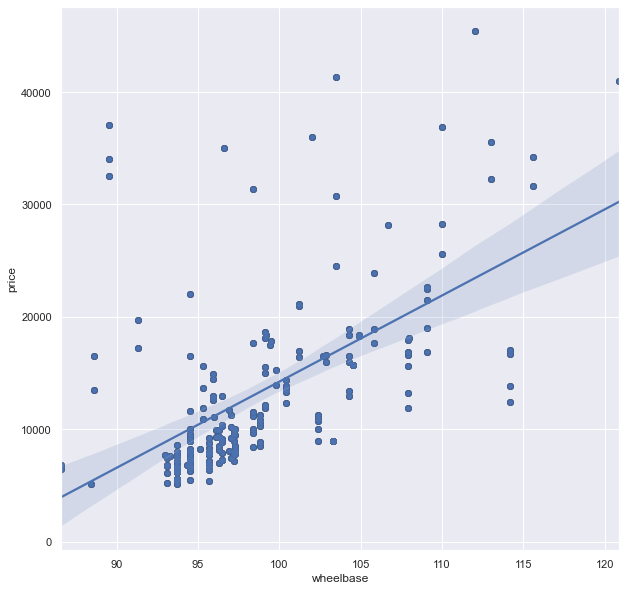

In [52]:
# Plotting of Spearman Correlation
scatter(CAR['wheelbase'],CAR['price']) #Scatter Plot
regplot(CAR['wheelbase'],CAR['price']) #Plot the Regression Line
show()

In [53]:
#Spearman Correlation test (When two Continuous Variables have Non linear Relationship)
#Correlation between Rank of "Price" & Rank of "carlength"
#Distribution of Ranking Squared Differences
correlation,pvalue = spearmanr(CAR['price'], CAR['carlength'])
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and carlength have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and carlength have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "InsuranceRisk"
#To find Correlation between "Price" & Rank "InsuranceRisk" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "InsuranceRisk"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
correlation,pvalue = kendalltau(CAR['price'], CAR['carlength'])
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and carlength have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and carlength have no non linear relationship")
    
#Detailed Test
linregress(CAR['price'], CAR['carlength'])

Spearmans correlation coefficient:0.804
8.905307987812625e-48
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and carlength have non linear relationship
Kendall's Rank correlation coefficient:0.626
7.535614914305364e-40
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and carlength have non linear relationship


LinregressResult(slope=0.0010546422595021493, intercept=160.04708825761034, rvalue=0.6829200156779625, pvalue=1.678706624074455e-29, stderr=7.91778055325987e-05)

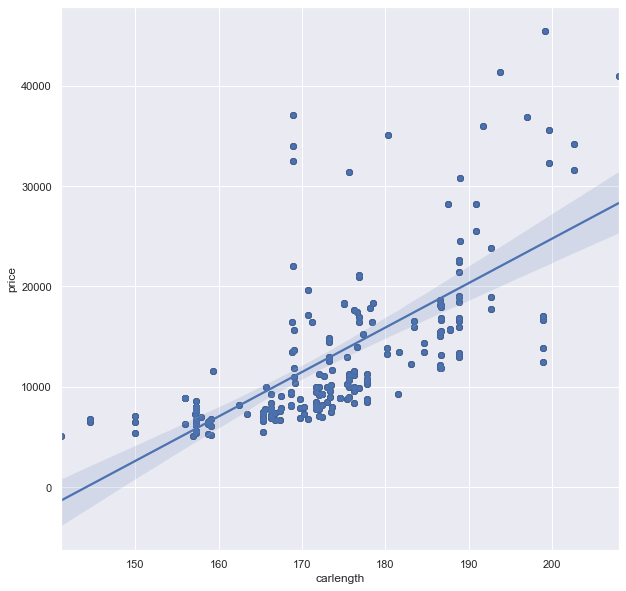

In [54]:
# Plotting of Spearman Correlation
scatter(CAR['carlength'],CAR['price']) #Scatter Plot
regplot(CAR['carlength'],CAR['price']) #Plot the Regression Line
show()

In [55]:
#Spearman Correlation test (When two Continuous Variables have Non linear Relationship)
#Correlation between Rank of "Price" & Rank of "carwidth"
#Distribution of Ranking Squared Differences
correlation,pvalue = spearmanr(CAR['price'], CAR['carwidth'])
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and carwidth have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and carwidth have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "InsuranceRisk"
#To find Correlation between "Price" & Rank "InsuranceRisk" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "InsuranceRisk"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
correlation,pvalue = kendalltau(CAR['price'], CAR['carwidth'])
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and carwidth have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and carwidth have no non linear relationship")
    
#Detailed Test
linregress(CAR['price'], CAR['carwidth'])

Spearmans correlation coefficient:0.811
3.112152823701878e-49
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and carwidth have non linear relationship
Kendall's Rank correlation coefficient:0.636
4.734040038548317e-40
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and carwidth have non linear relationship


LinregressResult(slope=0.0002038975676113063, intercept=63.20071588679727, rvalue=0.7593252997415113, pvalue=9.627437876119923e-40, stderr=1.226378277936602e-05)

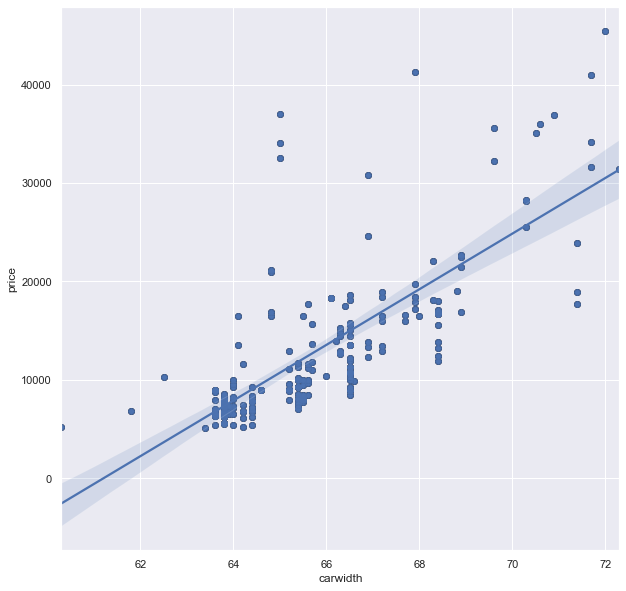

In [56]:
# Plotting of Spearman Correlation
scatter(CAR['carwidth'],CAR['price']) #Scatter Plot
regplot(CAR['carwidth'],CAR['price']) #Plot the Regression Line
show()

In [57]:
#Spearman Correlation test (When two Continuous Variables have Non linear Relationship)
#Correlation between Rank of "Price" & Rank of "carheight"
#Distribution of Ranking Squared Differences
correlation,pvalue = spearmanr(CAR['price'], CAR['carheight'])
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and carheight have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and carheight have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "InsuranceRisk"
#To find Correlation between "Price" & Rank "InsuranceRisk" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "InsuranceRisk"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
correlation,pvalue = kendalltau(CAR['price'], CAR['carheight'])
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and carheight have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and carheight have no non linear relationship")
    
#Detailed Test
linregress(CAR['price'], CAR['carheight'])

Spearmans correlation coefficient:0.243
0.0004527120631474023
Confidence Level : 99.95472879368525 %
Alternate Hypothesis (H1) - price and carheight have non linear relationship
Kendall's Rank correlation coefficient:0.169
0.0003881490766978419
Confidence Level : 99.96118509233021 %
Alternate Hypothesis (H1) - price and carheight have non linear relationship


LinregressResult(slope=3.6500948987615845e-05, intercept=53.24026551351486, rvalue=0.11933622657049449, pvalue=0.08832832352274995, stderr=2.131420710037919e-05)

<AxesSubplot:xlabel='carheight', ylabel='price'>

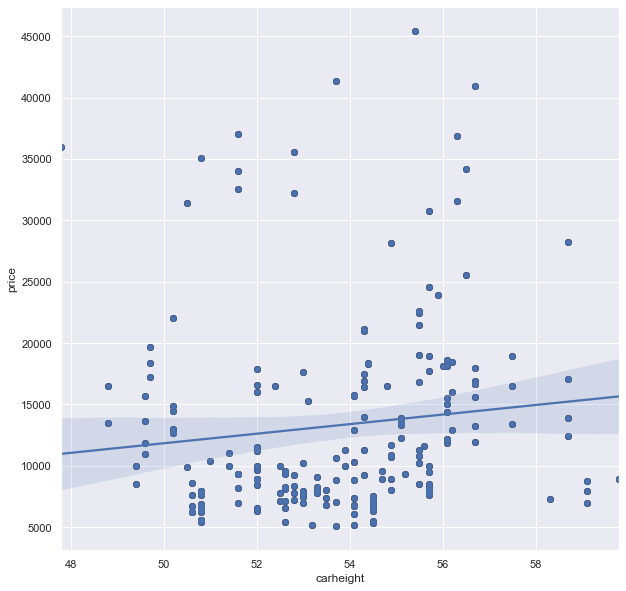

In [58]:
# Plotting of Spearman Correlation
scatter(CAR['carheight'],CAR['price']) #Scatter Plot
regplot(CAR['carheight'],CAR['price']) #Plot the Regression Line

In [59]:
#Spearman Correlation test (When two Continuous Variables have Non linear Relationship)
#Correlation between Rank of "Price" & Rank of "curbweight"
#Distribution of Ranking Squared Differences
correlation,pvalue = spearmanr(CAR['price'], CAR['curbweight'])
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and curbweight have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and curbweight have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "InsuranceRisk"
#To find Correlation between "Price" & Rank "InsuranceRisk" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "InsuranceRisk"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
correlation,pvalue = kendalltau(CAR['price'], CAR['curbweight'])
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and curbweight have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and curbweight have no non linear relationship")
    
#Detailed Test
linregress(CAR['price'], CAR['curbweight'])

Spearmans correlation coefficient:0.909
4.0026112686216925e-79
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and curbweight have non linear relationship
Kendall's Rank correlation coefficient:0.738
1.8570081586240034e-55
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and curbweight have non linear relationship


LinregressResult(slope=0.05444170157346684, intercept=1832.7591388894684, rvalue=0.8353048793372961, pvalue=1.2144448264034582e-54, stderr=0.002514971855552889)

<AxesSubplot:xlabel='curbweight', ylabel='price'>

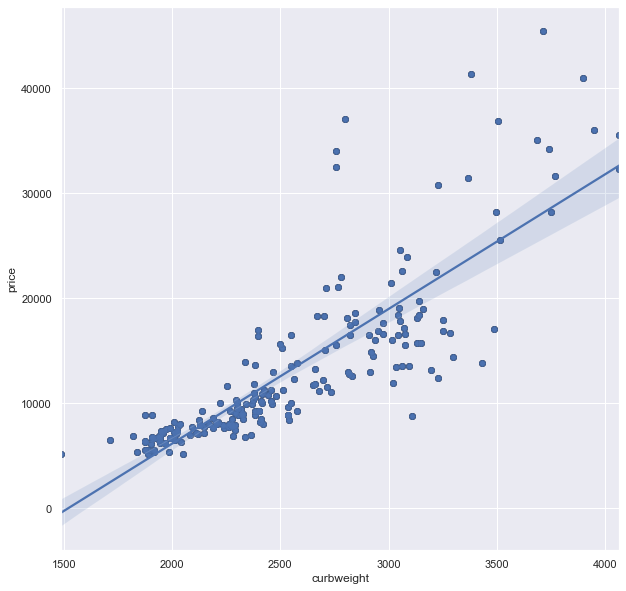

In [60]:
# Plotting of Spearman Correlation
scatter(CAR['curbweight'],CAR['price']) #Scatter Plot
regplot(CAR['curbweight'],CAR['price']) #Plot the Regression Line

In [61]:
#Spearman Correlation test (When two Continuous Variables have Non linear Relationship)
#Correlation between Rank of "Price" & Rank of "enginesize"
#Distribution of Ranking Squared Differences
correlation,pvalue = spearmanr(CAR['price'], CAR['enginesize'])
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and enginesize have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and enginesize have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "InsuranceRisk"
#To find Correlation between "Price" & Rank "InsuranceRisk" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "InsuranceRisk"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
correlation,pvalue = kendalltau(CAR['price'], CAR['enginesize'])
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and enginesize have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and enginesize have no non linear relationship")
    
#Detailed Test
linregress(CAR['price'], CAR['enginesize'])

Spearmans correlation coefficient:0.826
1.9437256267294584e-52
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and enginesize have non linear relationship
Kendall's Rank correlation coefficient:0.656
7.515338100014142e-43
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and enginesize have non linear relationship


LinregressResult(slope=0.004556567391722428, intercept=66.41109061723817, rvalue=0.8741448025245119, pvalue=1.354763759864529e-65, stderr=0.00017768204678735998)

<AxesSubplot:xlabel='enginesize', ylabel='price'>

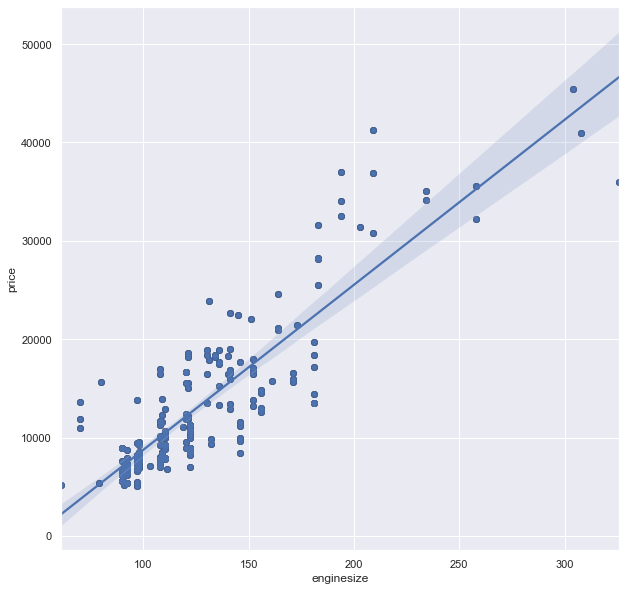

In [62]:
# Plotting of Spearman Correlation
scatter(CAR['enginesize'],CAR['price']) #Scatter Plot
regplot(CAR['enginesize'],CAR['price']) #Plot the Regression Line

In [63]:
#Spearman Correlation test (When two Continuous Variables have Non linear Relationship)
#Correlation between Rank of "Price" & Rank of "boreratio"
#Distribution of Ranking Squared Differences
correlation,pvalue = spearmanr(CAR['price'], CAR['boreratio'])
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and boreratio have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and boreratio have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "InsuranceRisk"
#To find Correlation between "Price" & Rank "InsuranceRisk" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "InsuranceRisk"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
correlation,pvalue = kendalltau(CAR['price'], CAR['boreratio'])
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and boreratio have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and boreratio have no non linear relationship")
    
#Detailed Test
linregress(CAR['price'], CAR['boreratio'])

Spearmans correlation coefficient:0.644
2.2096049099458725e-25
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and boreratio have non linear relationship
Kendall's Rank correlation coefficient:0.487
3.449976015008142e-24
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and boreratio have non linear relationship


LinregressResult(slope=1.8754069167331863e-05, intercept=3.080763749202828, rvalue=0.5531732367984438, pvalue=7.907922278248714e-18, stderr=1.982283985223214e-06)

<AxesSubplot:xlabel='boreratio', ylabel='price'>

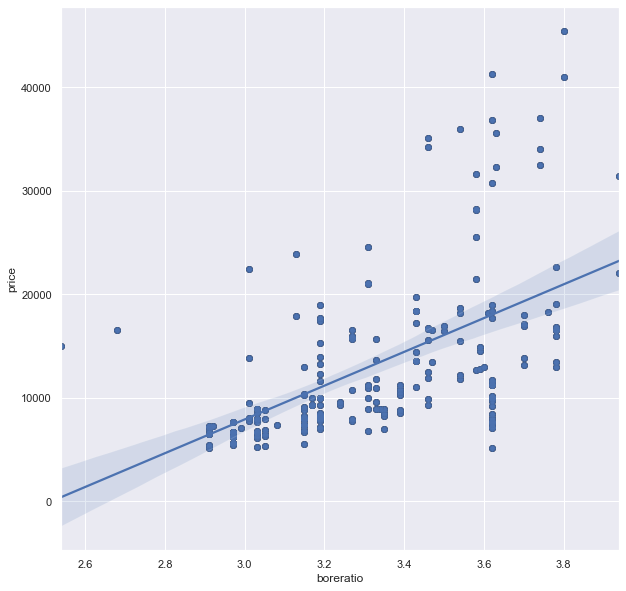

In [64]:
# Plotting of Spearman Correlation
scatter(CAR['boreratio'],CAR['price']) #Scatter Plot
regplot(CAR['boreratio'],CAR['price']) #Plot the Regression Line

In [65]:
#Spearman Correlation test (When two Continuous Variables have Non linear Relationship)
#Correlation between Rank of "Price" & Rank of "stroke"
#Distribution of Ranking Squared Differences
correlation,pvalue = spearmanr(CAR['price'], CAR['stroke'])
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and stroke have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and stroke have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "InsuranceRisk"
#To find Correlation between "Price" & Rank "InsuranceRisk" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "InsuranceRisk"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
correlation,pvalue = kendalltau(CAR['price'], CAR['stroke'])
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and stroke have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and stroke have no non linear relationship")
    
#Detailed Test
linregress(CAR['price'], CAR['stroke'])

Spearmans correlation coefficient:0.111
0.11197418464000011
Confidence Level : 88.80258153599999 %
Null Hypothesis (H0)- price and stroke have no non linear relationship
Kendall's Rank correlation coefficient:0.086
0.07345064022742401
Confidence Level : 92.65493597725761 %
Null Hypothesis (H0)- price and stroke have no non linear relationship


LinregressResult(slope=3.118484712795615e-06, intercept=3.2140114151953028, rvalue=0.07944308388193096, pvalue=0.2575137159090876, stderr=2.746405768031543e-06)

<AxesSubplot:xlabel='stroke', ylabel='price'>

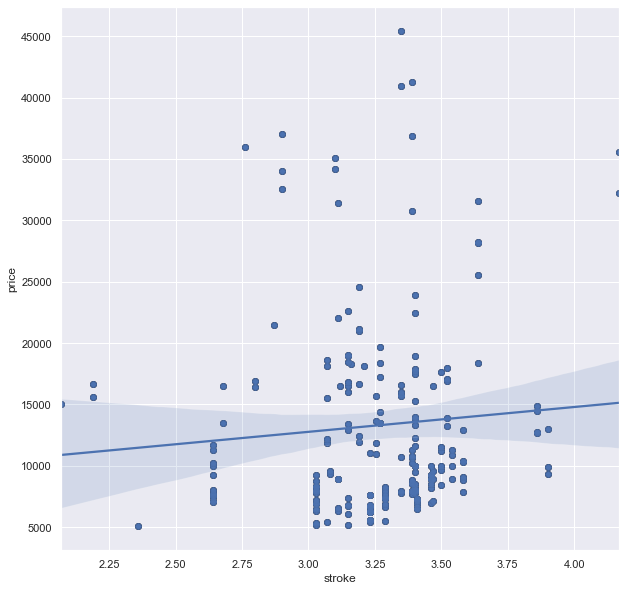

In [66]:
# Plotting of Spearman Correlation
scatter(CAR['stroke'],CAR['price']) #Scatter Plot
regplot(CAR['stroke'],CAR['price']) #Plot the Regression Line

In [67]:
#Spearman Correlation test (When two Continuous Variables have Non linear Relationship)
#Correlation between Rank of "Price" & Rank of "compressionratio"
#Distribution of Ranking Squared Differences
correlation,pvalue = spearmanr(CAR['price'], CAR['compressionratio'])
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and compressionratio have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and compressionratio have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "InsuranceRisk"
#To find Correlation between "Price" & Rank "InsuranceRisk" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "InsuranceRisk"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
correlation,pvalue = kendalltau(CAR['price'], CAR['compressionratio'])
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and compressionratio have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and compressionratio have no non linear relationship")
    
#Detailed Test
linregress(CAR['price'], CAR['compressionratio'])

Spearmans correlation coefficient:-0.174
0.012775353546101244
Confidence Level : 98.72246464538988 %
Alternate Hypothesis (H1) - price and compressionratio have non linear relationship
Kendall's Rank correlation coefficient:-0.134
0.006169328472737722
Confidence Level : 99.38306715272623 %
Alternate Hypothesis (H1) - price and compressionratio have non linear relationship


LinregressResult(slope=3.38012539278083e-05, intercept=9.693767120038535, rvalue=0.06798350579944265, pvalue=0.3327723612238054, stderr=3.481571413754573e-05)

<AxesSubplot:xlabel='compressionratio', ylabel='price'>

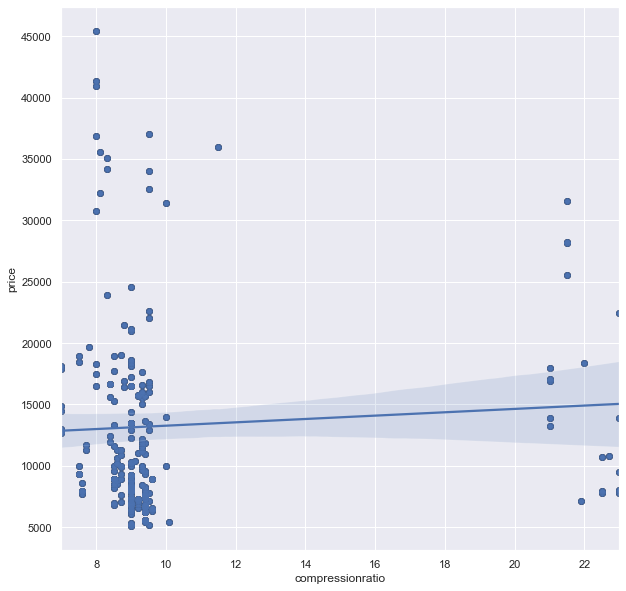

In [68]:
# Plotting of Spearman Correlation
scatter(CAR['compressionratio'],CAR['price']) #Scatter Plot
regplot(CAR['compressionratio'],CAR['price']) #Plot the Regression Line

In [69]:
#Spearman Correlation test (When two Continuous Variables have Non linear Relationship)
#Correlation between Rank of "Price" & Rank of "horsepower"
#Distribution of Ranking Squared Differences
correlation,pvalue = spearmanr(CAR['price'], CAR['horsepower'])
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and horsepower have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and horsepower have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "InsuranceRisk"
#To find Correlation between "Price" & Rank "InsuranceRisk" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "InsuranceRisk"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
correlation,pvalue = kendalltau(CAR['price'], CAR['horsepower'])
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and horsepower have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and horsepower have no non linear relationship")
    
#Detailed Test
linregress(CAR['price'], CAR['horsepower'])

Spearmans correlation coefficient:0.855
1.0967646925749196e-59
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and horsepower have non linear relationship
Kendall's Rank correlation coefficient:0.672
2.736813628998727e-45
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and horsepower have non linear relationship


LinregressResult(slope=0.004000221192788036, intercept=51.00729417517778, rvalue=0.8081388225362216, pvalue=1.4834365732940852e-48, stderr=0.00020462535935254967)

<AxesSubplot:xlabel='horsepower', ylabel='price'>

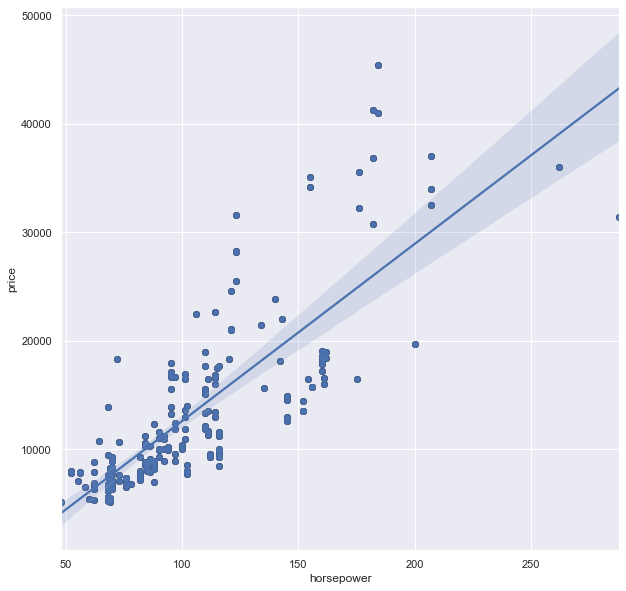

In [70]:
# Plotting of Spearman Correlation
scatter(CAR['horsepower'],CAR['price']) #Scatter Plot
regplot(CAR['horsepower'],CAR['price']) #Plot the Regression Line

In [71]:
#Spearman Correlation test (When two Continuous Variables have Non linear Relationship)
#Correlation between Rank of "Price" & Rank of "peakrpm"
#Distribution of Ranking Squared Differences
correlation,pvalue = spearmanr(CAR['price'], CAR['peakrpm'])
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and peakrpm have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and peakrpm have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "InsuranceRisk"
#To find Correlation between "Price" & Rank "InsuranceRisk" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "InsuranceRisk"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
correlation,pvalue = kendalltau(CAR['price'], CAR['peakrpm'])
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and peakrpm have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and peakrpm have no non linear relationship")
    
#Detailed Test
linregress(CAR['price'], CAR['peakrpm'])

Spearmans correlation coefficient:-0.066
0.34504819082574767
Confidence Level : 65.49518091742523 %
Null Hypothesis (H0)- price and peakrpm have no non linear relationship
Kendall's Rank correlation coefficient:-0.038
0.44493828994611784
Confidence Level : 55.50617100538822 %
Null Hypothesis (H0)- price and peakrpm have no non linear relationship


LinregressResult(slope=-0.005090994903650006, intercept=5192.713617072343, rvalue=-0.08526715027785686, pvalue=0.22414123444666637, stderr=0.004175306497830672)

<AxesSubplot:xlabel='peakrpm', ylabel='price'>

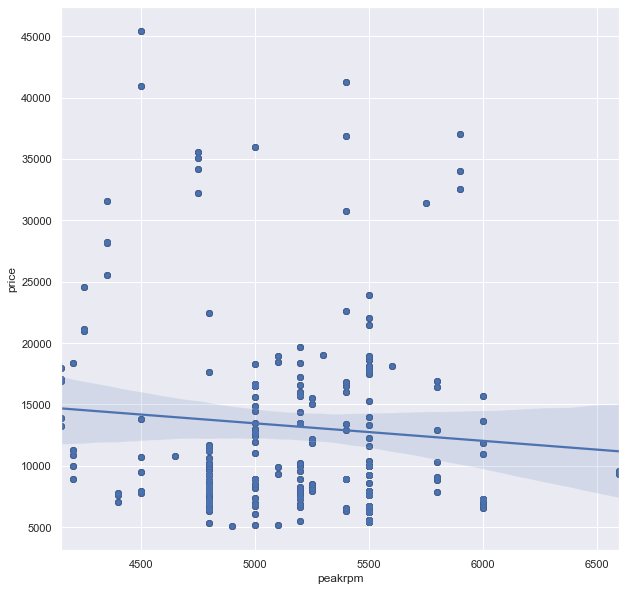

In [72]:
# Plotting of Spearman Correlation
scatter(CAR['peakrpm'],CAR['price']) #Scatter Plot
regplot(CAR['peakrpm'],CAR['price']) #Plot the Regression Line

In [73]:
#Spearman Correlation test (When two Continuous Variables have Non linear Relationship)
#Correlation between Rank of "Price" & Rank of "CityMileage"
#Distribution of Ranking Squared Differences
correlation,pvalue = spearmanr(CAR['price'], CAR['CityMileage'])
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and CityMileage have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and CityMileage have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "InsuranceRisk"
#To find Correlation between "Price" & Rank "InsuranceRisk" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "InsuranceRisk"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
correlation,pvalue = kendalltau(CAR['price'], CAR['CityMileage'])
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and CityMileage have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and CityMileage have no non linear relationship")
    
#Detailed Test
linregress(CAR['price'], CAR['CityMileage'])

Spearmans correlation coefficient:-0.829
3.016616328395848e-53
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and CityMileage have non linear relationship
Kendall's Rank correlation coefficient:-0.657
7.0953234611636e-42
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and CityMileage have non linear relationship


LinregressResult(slope=-0.0005615678188465292, intercept=32.675285591784416, rvalue=-0.6857513360270397, pvalue=7.978684249663421e-30, stderr=4.183319231356522e-05)

<AxesSubplot:xlabel='CityMileage', ylabel='price'>

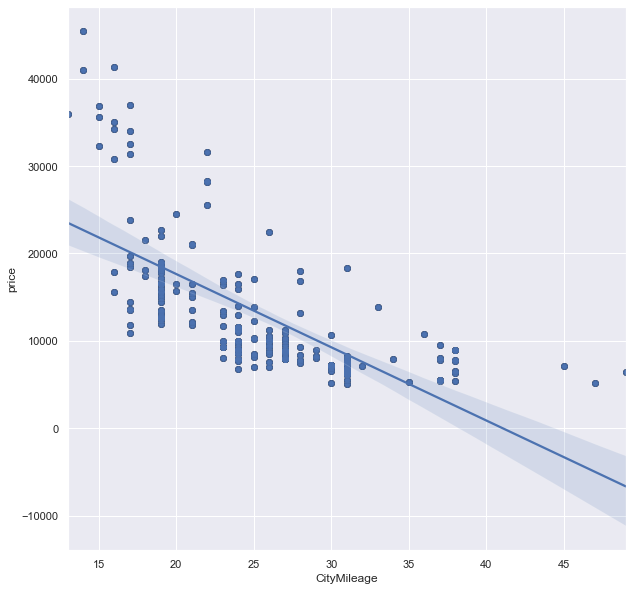

In [74]:
# Plotting of Spearman Correlation
scatter(CAR['CityMileage'],CAR['price']) #Scatter Plot
regplot(CAR['CityMileage'],CAR['price']) #Plot the Regression Line

In [75]:
#Spearman Correlation test (When two Continuous Variables have Non linear Relationship)
#Correlation between Rank of "Price" & Rank of "HighwayMileage"
#Distribution of Ranking Squared Differences
correlation,pvalue = spearmanr(CAR['price'], CAR['HighwayMileage'])
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and HighwayMileage have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and HighwayMileage have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "InsuranceRisk"
#To find Correlation between "Price" & Rank "InsuranceRisk" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "InsuranceRisk"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
correlation,pvalue = kendalltau(CAR['price'], CAR['HighwayMileage'])
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and HighwayMileage have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and HighwayMileage have no non linear relationship")
    
#Detailed Test
linregress(CAR['price'], CAR['HighwayMileage'])

Spearmans correlation coefficient:-0.823
1.0749573921925921e-51
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and HighwayMileage have non linear relationship
Kendall's Rank correlation coefficient:-0.644
9.70259906825319e-41
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and HighwayMileage have non linear relationship


LinregressResult(slope=-0.0006013349944812999, intercept=38.73497018997588, rvalue=-0.6975990916465561, pvalue=3.2306813803647553e-31, stderr=4.33482596022097e-05)

<AxesSubplot:xlabel='HighwayMileage', ylabel='price'>

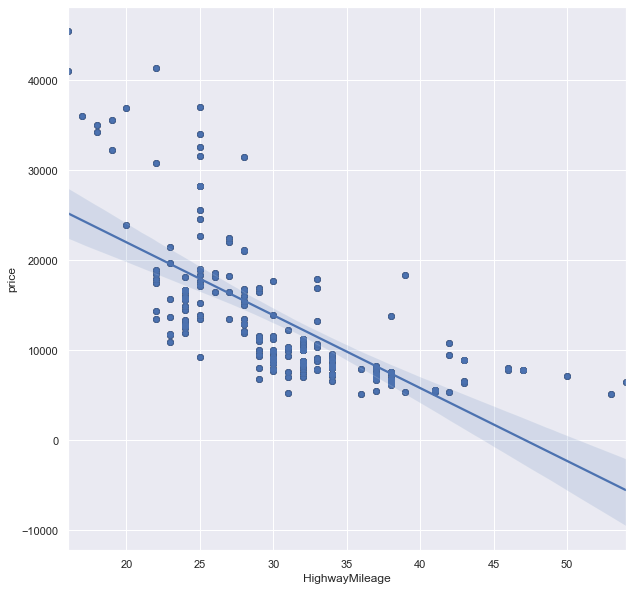

In [76]:
# Plotting of Spearman Correlation
scatter(CAR['HighwayMileage'],CAR['price']) #Scatter Plot
regplot(CAR['HighwayMileage'],CAR['price']) #Plot the Regression Line

In [77]:
# From the above Spearman Correlation test we can see "stroke" & "peakrpm" have no Correlation with CAR "price"
# We will Remove "stroke" & "peakrpm" features from CAR DataFrame
CAR.drop(columns=["stroke","peakrpm"],axis=1,inplace=True) #Remove the "stroke" & "peakrpm" col from CAR data
CAR.columns

D:\D Program Files\Anaconda\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['InsuranceRisk', 'Company', 'CarModel', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'compressionratio', 'horsepower', 'CityMileage', 'HighwayMileage',
       'price'],
      dtype='object')

# Outlier Treatment/Check
1. Point Outliers: Observations anomalous with respect to the majority of observations in a feature (aka univariate outlier).
2. Contextual Outliers: Observations considered anomalous given a specific context.
3. Collective Outliers: A collection of observations anomalous but appear close to one another bacause they all have a similar anomalous value.

Text(0.5, 0, 'Continuous Variable')

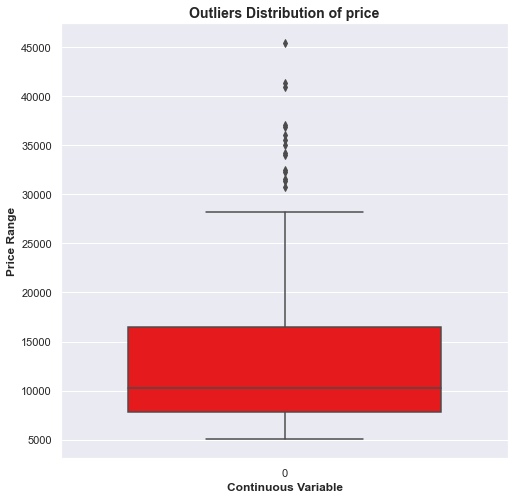

In [78]:
# Outlier Analysis of target variable CAR "price" with maximum amount of Inconsistency
rcParams['figure.figsize'] = [8,8]
boxplot(data=CAR["price"], orient="v", palette="Set1", whis=1.5, saturation=1, width=0.7)
title("Outliers Distribution of price", fontsize = 14, fontweight = 'bold')
ylabel("Price Range", fontweight = 'bold')
xlabel("Continuous Variable", fontweight = 'bold')

In [79]:
CAR.price.describe() #It prints the statistics of the Selected Column "price"
                     #This shows the statistical informations of "price" Column

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<AxesSubplot:title={'center':'CAR Price Distribution Plot'}, xlabel='price', ylabel='Frequency'>

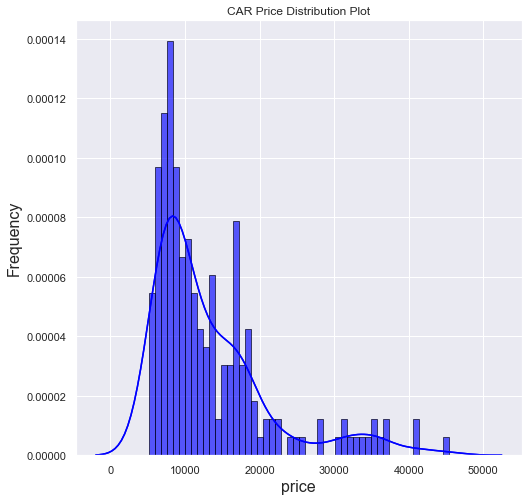

In [80]:
# See the distribution plot of "Price" Column
# See the distribution plot/histogram of "Price" Column
# Inference
# Mean and median of price are significantly different.
# Large standard deviation indicates that there is considerable variance in the prices of the automobiles.
# Price values are right-skewed, most cars are priced at the lower end (9000) of the price range.
figure(figsize=(8,8)) # Assign the Plotting Figure Size of 8 by 8
title('CAR Price Distribution Plot') #Give the Distribution plot Name
xlabel('price', fontsize=16) #Give name to the X-axis
ylabel('Frequency', fontsize=16) #Give name to the Y-axis
distplot(CAR['price'], hist_kws=dict(edgecolor="black", linewidth=1), color='Blue', bins=50) # Assign the distribution plot
distplot(CAR.price, hist_kws=dict(edgecolor="black", linewidth=1), color='Blue', bins=50) # Assign the distribution plot

Text(0, 0.5, 'Probability')

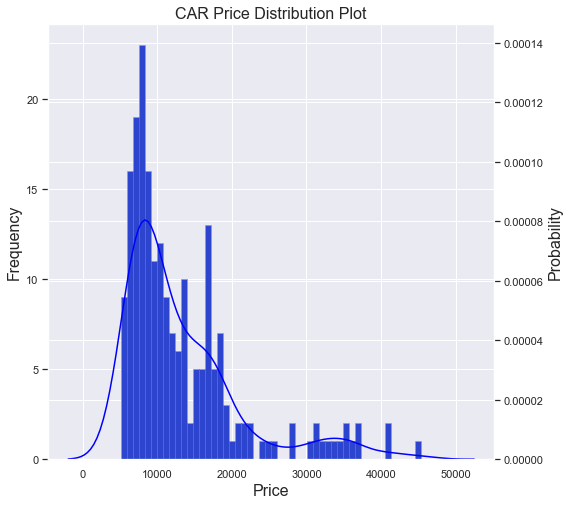

In [81]:
# See the histogram plot of "Price" Column
fig, ax = subplots(figsize=(8,8))
ax2 = ax.twinx()
ax.hist(CAR['price'], bins=50)
ax2.hist(CAR['price'], bins=50, density=True)
distplot(CAR['price'], hist_kws=dict(edgecolor="red", linewidth=1), color='Blue', bins=50)
title('CAR Price Distribution Plot', fontsize=16) #Give the Distribution plot Name
ax.set_xlabel('Price', fontsize=16) #Give name to the X-axis
ax.set_ylabel('Frequency',fontsize=16)
ax2.set_ylabel('Probability',fontsize=16)

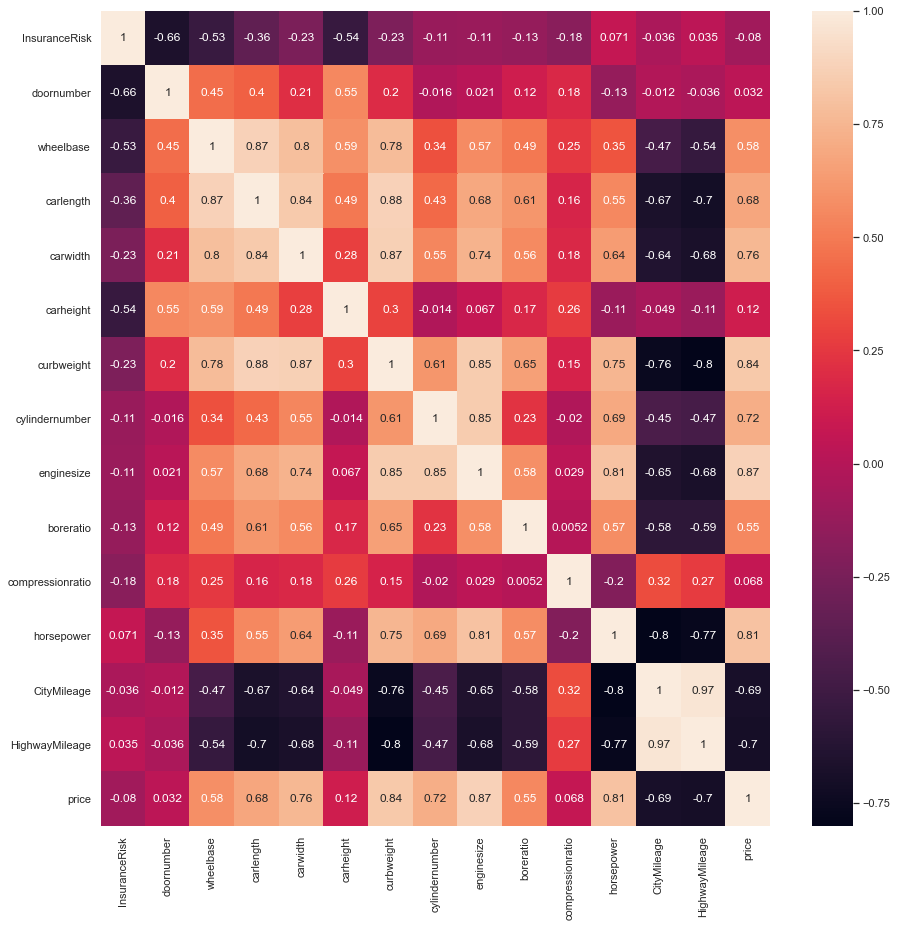

In [82]:
# Correlation plot by using heatmap includes Numeric Cols only
figure(figsize=(15,15)) # Assign the Plotting Figure Size of 8 by 8
heatmap(CAR.corr(), annot=True)
show()

In [83]:
# Each Pair Combination of Feature & Label Correlation List
CAR.corr().price.sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
cylindernumber      0.718305
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
compressionratio    0.067984
doornumber          0.031835
InsuranceRisk      -0.079978
CityMileage        -0.685751
HighwayMileage     -0.697599
Name: price, dtype: float64

In [84]:
#Displaying correlation among all the columns 
CAR.corr()

InsuranceRisk  doornumber  wheelbase  carlength  carwidth  \
InsuranceRisk          1.000000   -0.664073  -0.531954  -0.357612 -0.232919   
doornumber            -0.664073    1.000000   0.447357   0.398568  0.207168   
wheelbase             -0.531954    0.447357   1.000000   0.874587  0.795144   
carlength             -0.357612    0.398568   0.874587   1.000000  0.841118   
carwidth              -0.232919    0.207168   0.795144   0.841118  1.000000   
carheight             -0.541038    0.552208   0.589435   0.491029  0.279210   
curbweight            -0.227691    0.197379   0.776386   0.877728  0.867032   
cylindernumber        -0.113129   -0.016009   0.339507   0.430672  0.545007   
enginesize            -0.105790    0.020742   0.569329   0.683360  0.735433   
boreratio             -0.130051    0.119258   0.488750   0.606454  0.559150   
compressionratio      -0.178515    0.177888   0.249786   0.158414  0.181129   
horsepower             0.070873   -0.126947   0.353294   0.552623  0.640732   
CityMileage           -0.035823   -0.012417  -0.470414  -0.670909 -0.642704   
HighwayMileage         0.034606   -0.036330  -0.544082  -0.704662 -0.677218   
price                 -0.079978    0.031835   0.577816   0.682920  0.759325   

                  carheight  curbweight  cylindernumber  enginesize  \
InsuranceRisk     -0.541038   -0.227691       -0.113129   -0.105790   
doornumber         0.552208    0.197379       -0.016009    0.020742   
wheelbase          0.589435    0.776386        0.339507    0.569329   
carlength          0.491029    0.877728        0.430672    0.683360   
carwidth           0.279210    0.867032        0.545007    0.735433   
carheight          1.000000    0.295572       -0.013995    0.067149   
curbweight         0.295572    1.000000        0.609727    0.850594   
cylindernumber    -0.013995    0.609727        1.000000    0.846031   
enginesize         0.067149    0.850594        0.846031    1.000000   
boreratio          0.171071    0.648480        0.231399    0.583774   
compressionratio   0.261214    0.151362       -0.020002    0.028971   
horsepower        -0.108802    0.750739        0.692016    0.809769   
CityMileage       -0.048640   -0.757414       -0.445837   -0.653658   
HighwayMileage    -0.107358   -0.797465       -0.466666   -0.677470   
price              0.119336    0.835305        0.718305    0.874145   

                  boreratio  compressionratio  horsepower  CityMileage  \
InsuranceRisk     -0.130051         -0.178515    0.070873    -0.035823   
doornumber         0.119258          0.177888   -0.126947    -0.012417   
wheelbase          0.488750          0.249786    0.353294    -0.470414   
carlength          0.606454          0.158414    0.552623    -0.670909   
carwidth           0.559150          0.181129    0.640732    -0.642704   
carheight          0.171071          0.261214   -0.108802    -0.048640   
curbweight         0.648480          0.151362    0.750739    -0.757414   
cylindernumber     0.231399         -0.020002    0.692016    -0.445837   
enginesize         0.583774          0.028971    0.809769    -0.653658   
boreratio          1.000000          0.005197    0.573677    -0.584532   
compressionratio   0.005197          1.000000   -0.204326     0.324701   
horsepower         0.573677         -0.204326    1.000000    -0.801456   
CityMileage       -0.584532          0.324701   -0.801456     1.000000   
HighwayMileage    -0.587012          0.265201   -0.770544     0.971337   
price              0.553173          0.067984    0.808139    -0.685751   

                  HighwayMileage     price  
InsuranceRisk           0.034606 -0.079978  
doornumber             -0.036330  0.031835  
wheelbase              -0.544082  0.577816  
carlength              -0.704662  0.682920  
carwidth               -0.677218  0.759325  
carheight              -0.107358  0.119336  
curbweight             -0.797465  0.835305  
cylindernumber         -0.466666  0.718305  
enginesize             -0.

# Skewness Check

In [85]:
CAR.skew()

InsuranceRisk       0.211072
doornumber         -0.247552
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
cylindernumber      2.817459
enginesize          1.947655
boreratio           0.020156
compressionratio    2.610862
horsepower          1.405310
CityMileage         0.663704
HighwayMileage      0.539997
price               1.777678
dtype: float64

# Exploratory Data Analysis ( EDA )

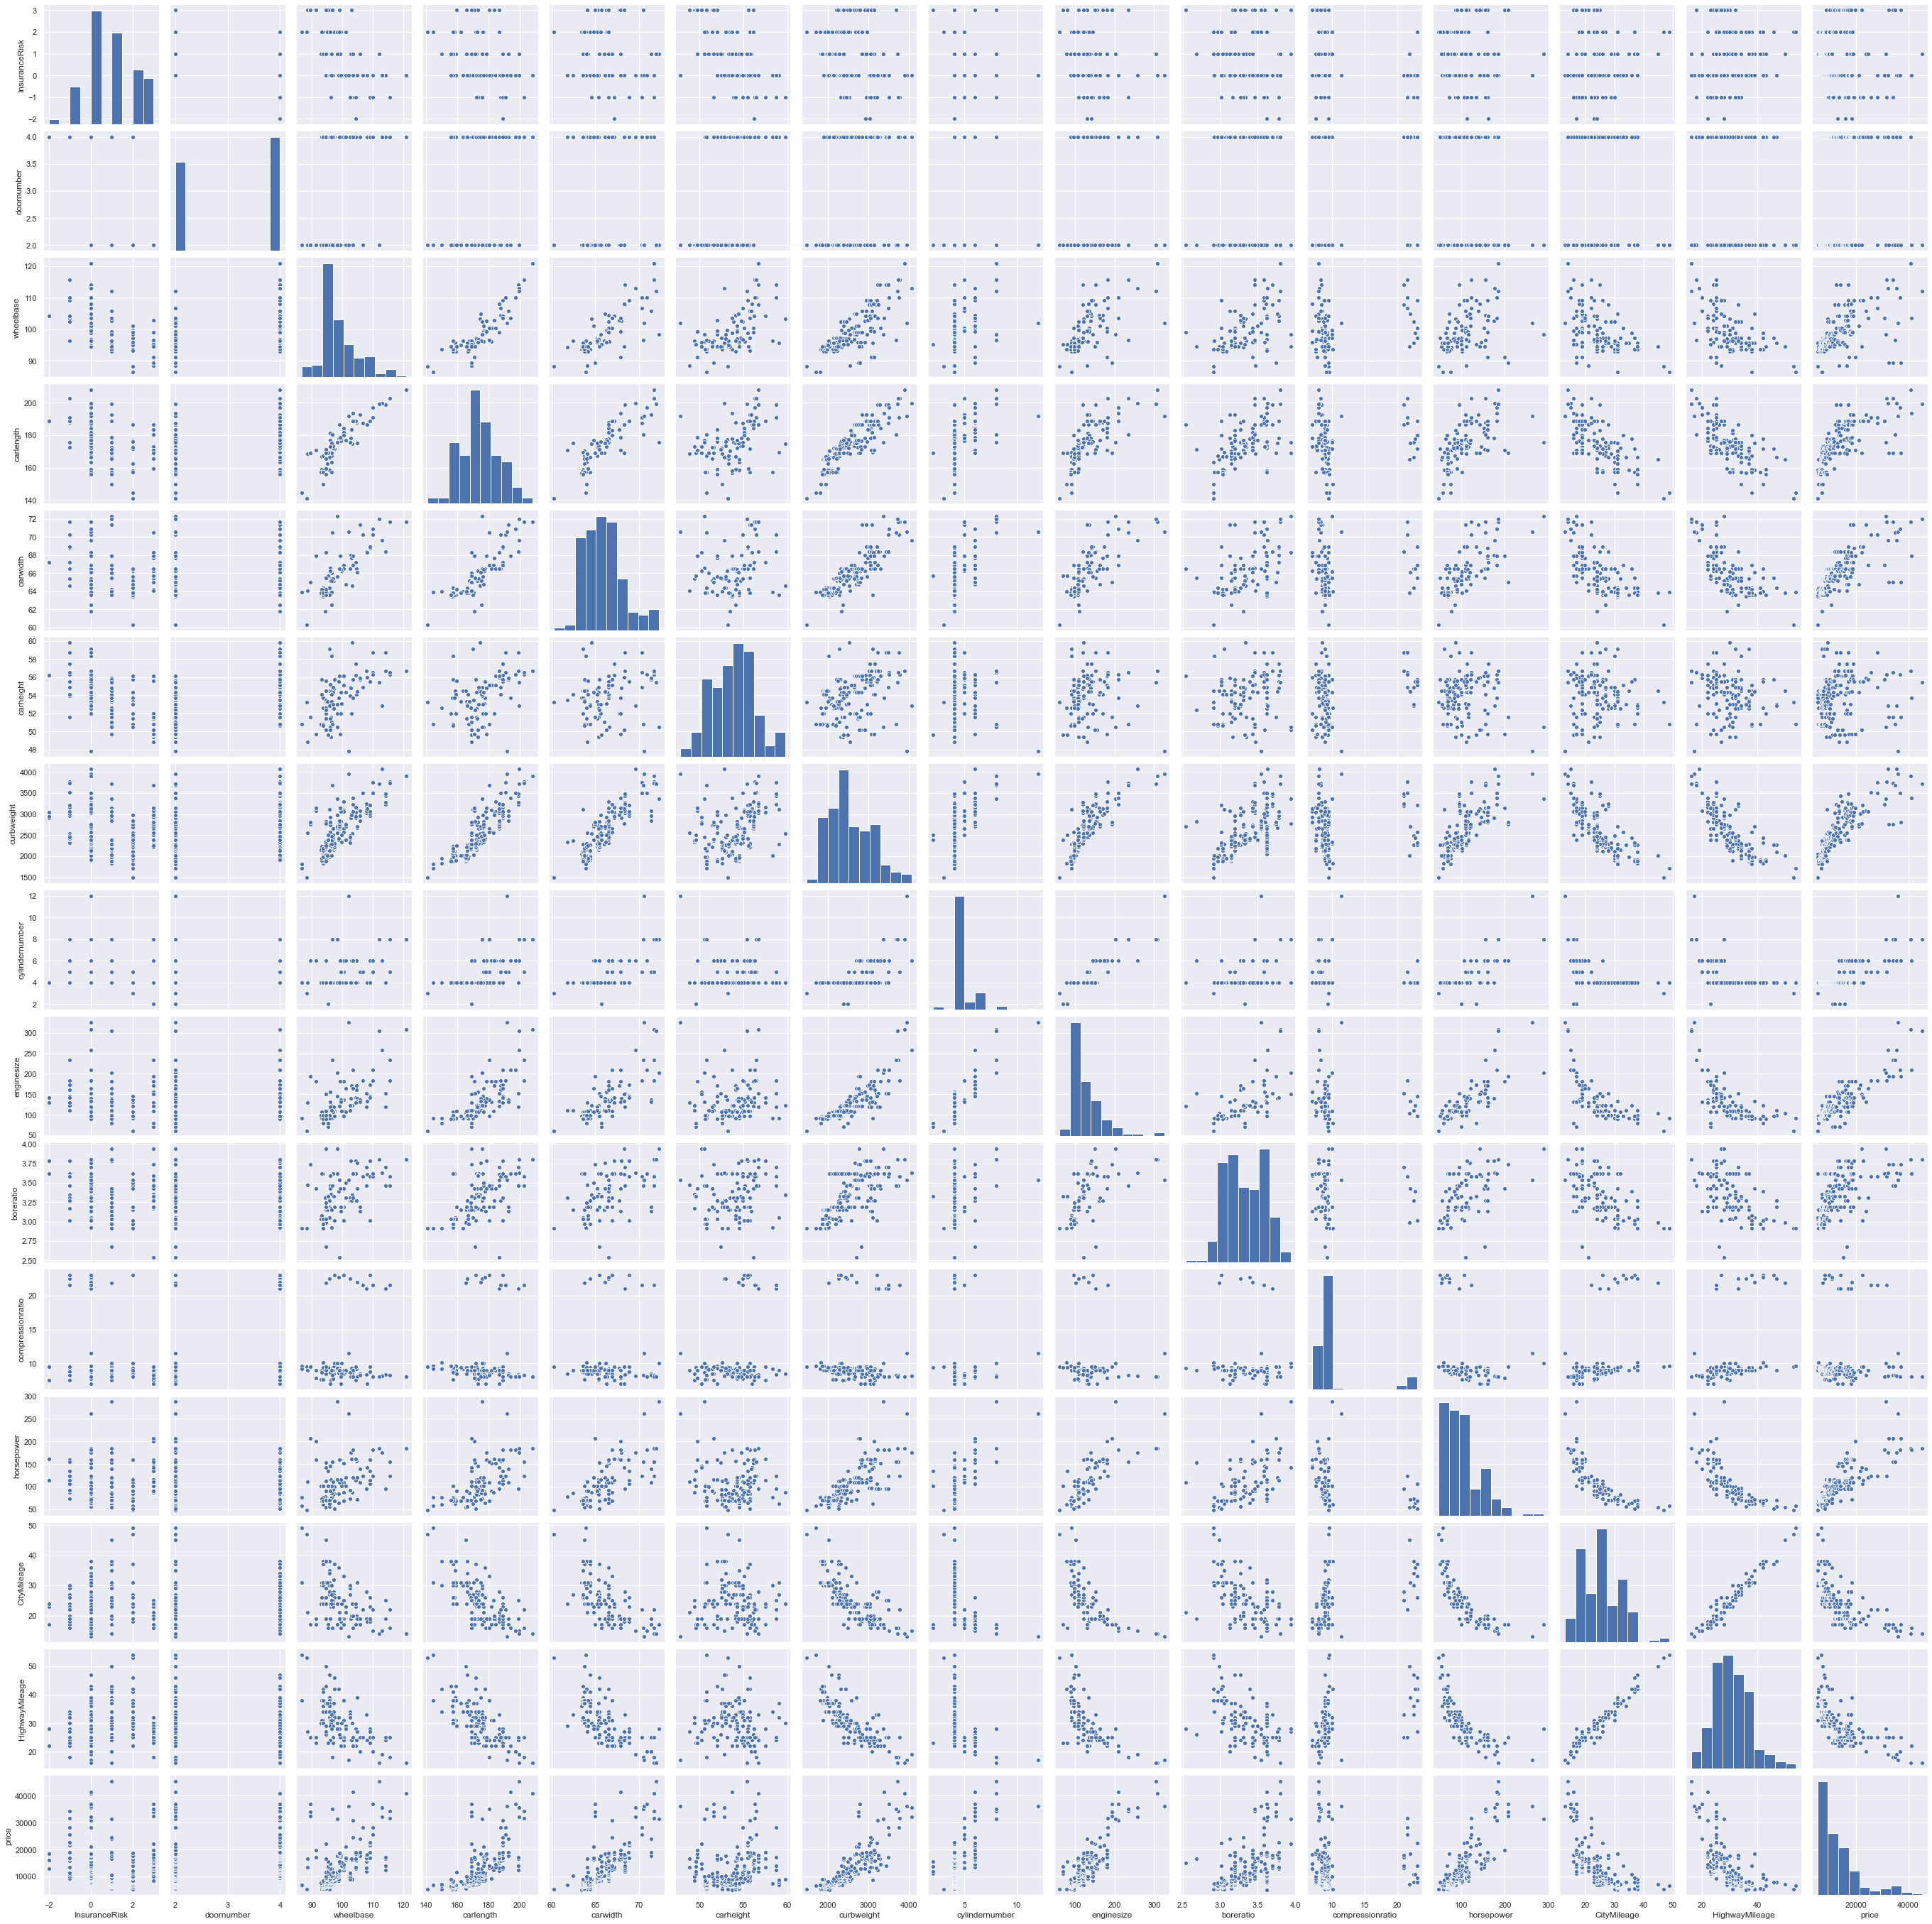

In [86]:
# See the pair plot of CAR DataFrame
# To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function.
# This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame.
# By default, it also draws the univariate distribution of each variable on the diagonal Axes:
pairplot(CAR)
show()

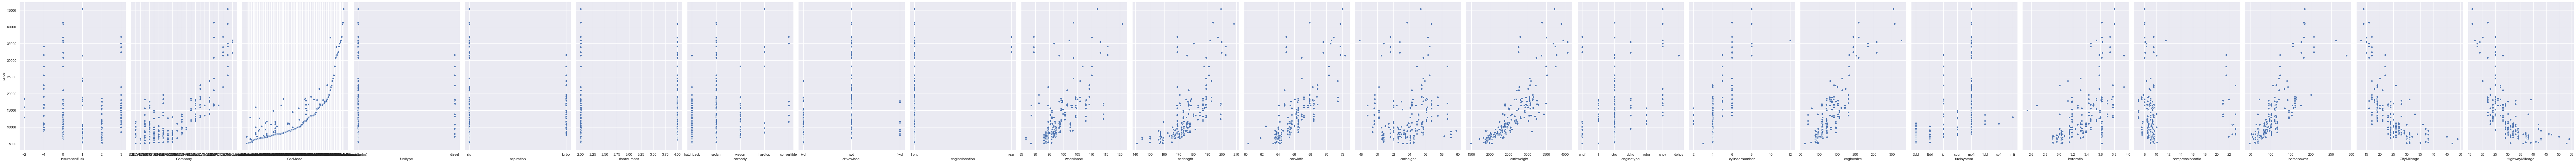

In [87]:
# Visualise the relationship between Each Feature & Label Combination Using Scatterplots
pairplot(CAR, x_vars=['InsuranceRisk','Company','CarModel','fueltype','aspiration',
                      'doornumber','carbody','drivewheel','enginelocation','wheelbase',
                      'carlength','carwidth','carheight','curbweight','enginetype',
                      'cylindernumber','enginesize','fuelsystem','boreratio',
                      'compressionratio','horsepower','CityMileage','HighwayMileage'], y_vars='price',height=7, aspect=0.7, kind='scatter')
show()

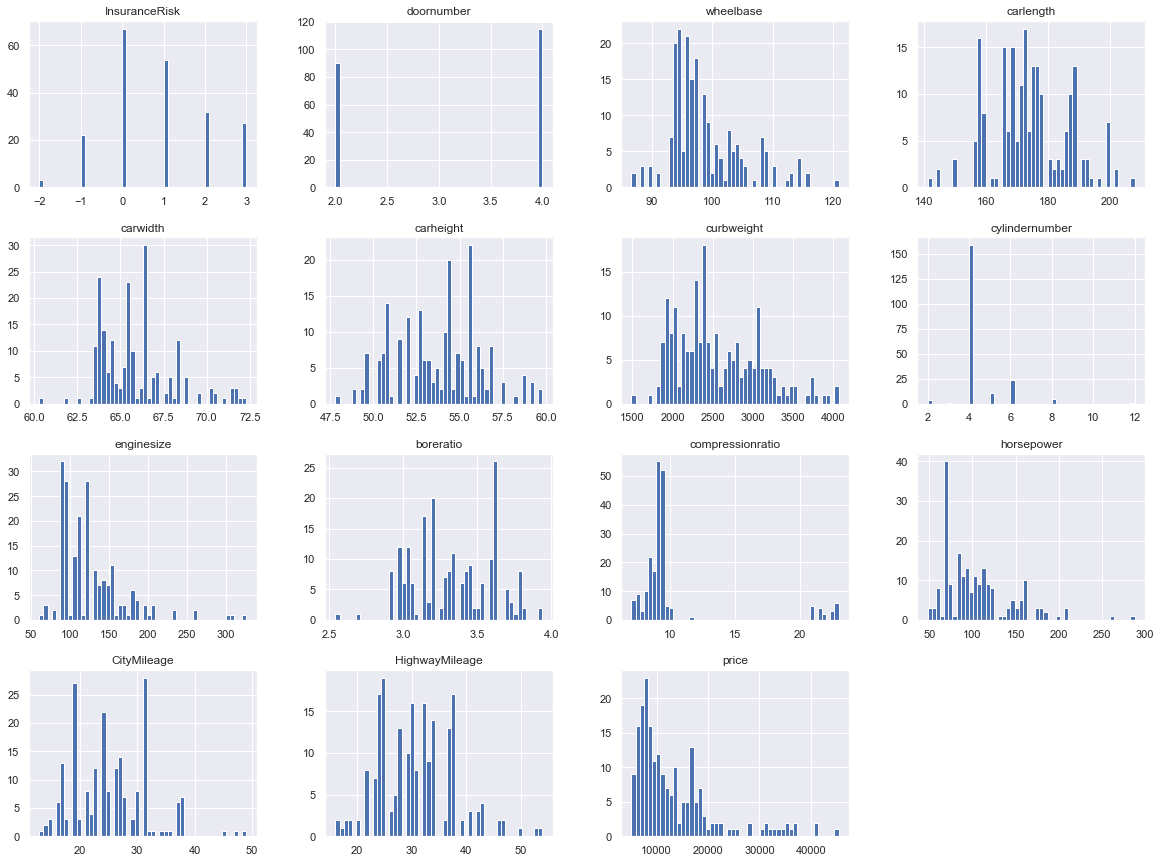

In [88]:
# See the histogram plot of CAR DataFrame
# Univariate Distribution of Each Variable
CAR.hist(bins=50, figsize=(20, 15))
show()

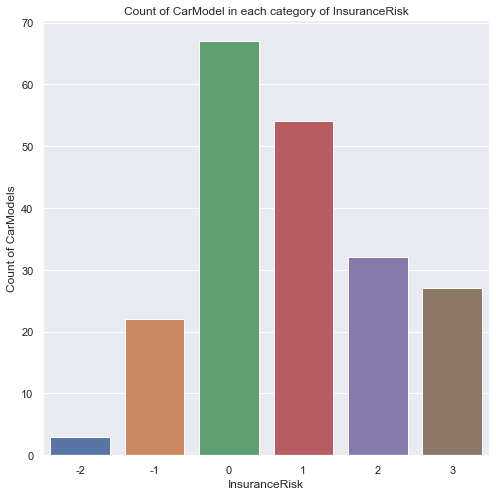

In [89]:
# Let's see the count of automobiles/CarModels in each category of "InsuranceRisk" feature
figure(figsize=(8,8)) # Assign the Plotting Figure Size of 8 by 8
title('Count of CarModel in each category of InsuranceRisk') #Give the countplot plot Name
countplot(CAR["InsuranceRisk"]).set(xlabel='InsuranceRisk', ylabel='Count of CarModels') #Assign the CountPlot
show()

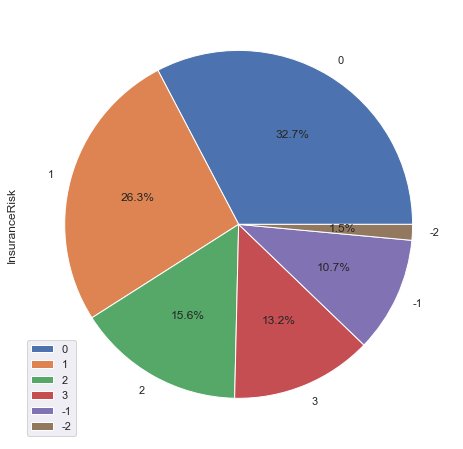

In [90]:
# Let's see the Percentage Share of automobiles/CarModels in each category of "InsuranceRisk" feature
DataFrame(CAR["InsuranceRisk"].value_counts()).plot.pie(subplots=True,
labels = DataFrame(CAR["InsuranceRisk"].value_counts()).index.values, 
autopct='%1.1f%%', figsize = (8,8))
gca().set_aspect('equal')# More than 50% of the total automobile/CarModels are with "InsuranceRisk" either in Neutral(0) or Low Risk(1)

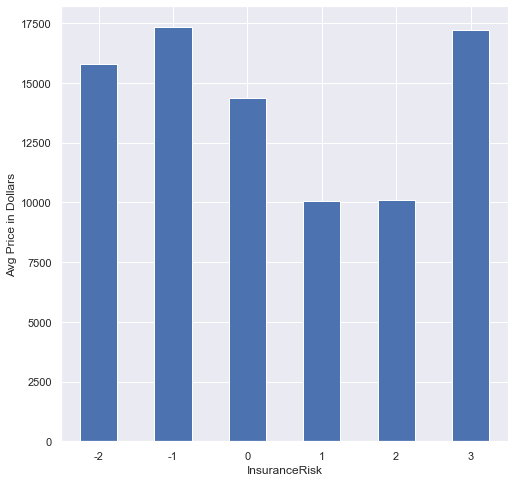

In [91]:
# Let's see the average price of automobile/CarModels in each category of "InsuranceRisk" feature
# groupby() will be applied to "InsuranceRisk" & mean() will be applied to "price" as per gropby() of "InsuranceRisk"
CAR[['InsuranceRisk','price']].groupby("InsuranceRisk").mean().plot(kind='bar',legend = False).set(xlabel='InsuranceRisk', ylabel='Avg Price in Dollars')
xticks(rotation = 0) # 0 degree Horizontal alignment of "InsuranceRisk" category names/values
show()# Average price of car is lower for Low Risk(1) & Medium Risk(2) "InsuranceRisk" category.

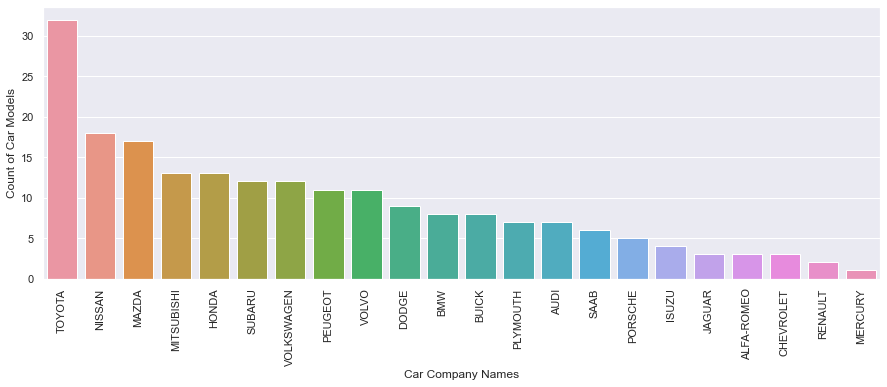

In [92]:
# Let's see Car Companies and their no of Car Models.
subplots(figsize = (15,5))
countplot(CAR["Company"], order=value_counts(CAR["Company"]).index).set(xlabel = 'Car Company Names', ylabel= 'Count of Car Models')
xticks(rotation = 90) # 90 degree Vertical alignment of Car Company Names
show()# Toyota, a Japanese company has the most no of Car Models.

In [93]:
# Shows the frequency of each unique Entry/Element/Company of "Company" Column
CAR.Company.value_counts()

TOYOTA        32
NISSAN        18
MAZDA         17
MITSUBISHI    13
HONDA         13
SUBARU        12
VOLKSWAGEN    12
PEUGEOT       11
VOLVO         11
DODGE          9
BMW            8
BUICK          8
PLYMOUTH       7
AUDI           7
SAAB           6
PORSCHE        5
ISUZU          4
JAGUAR         3
ALFA-ROMEO     3
CHEVROLET      3
RENAULT        2
MERCURY        1
Name: Company, dtype: int64

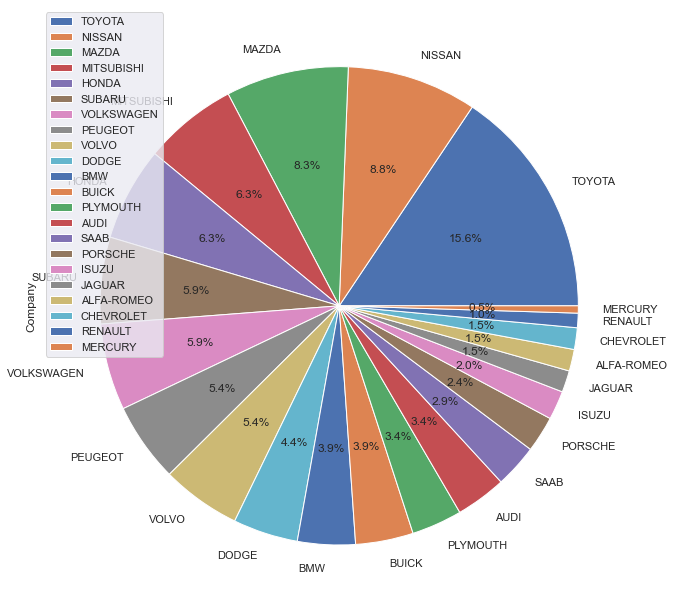

In [94]:
# Let's see the Percentage Share of automobile/CarModels in each category of "Company" feature
DataFrame(CAR["Company"].value_counts()).plot.pie(subplots=True,
labels = DataFrame(CAR["Company"].value_counts()).index.values, 
autopct='%1.1f%%', figsize = (11,11))
gca().set_aspect('equal')
show()# More than 15.6% of the total automobile/CarModels are from "TOYOTA"

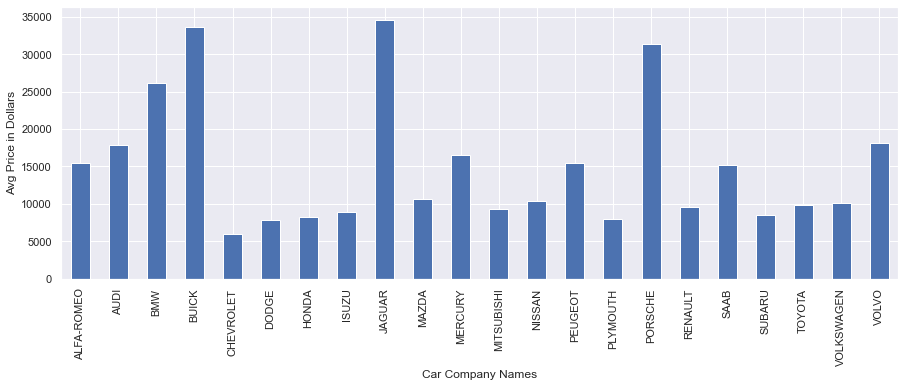

In [95]:
# Let's see the average car price of each Car Company
# groupby() will be applied to "Company" & mean() will be applied to "price" as per gropby() of "Company"
CAR[['Company','price']].groupby("Company").mean().plot(kind='bar',legend = False, sort_columns = True, figsize = (15,5)).set(xlabel='Car Company Names', ylabel='Avg Price in Dollars')
xticks(rotation = 90) # 90 degree Veetical alignment of Car "Company" category names
show()# Average price of car is Highets for JAGUAR car "Company"

In [96]:
# Inference:
# Toyota has considerably highest no of Car Models 32 in the market & market share in terms of CadModels is 15.6%.
# Average price of car is Highest for JAGUAR car "Company" with no of Car Models 3
# Brands can be categorised as Luxury, Mid Ranged, Budget based on their average price range.
# Some of the Luxury brans are PORSCHE, JAGUAR & BUICK

# Measures of Association between Continuous and Categorical Variables

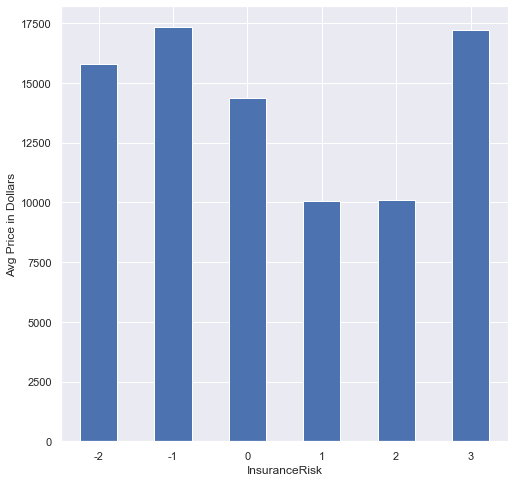

In [97]:
# Measures of Association between CAR "Price" & CAR "InsuranceRisk"
# Let's see the average price of automobile/CarModel in each category of "InsuranceRisk" feature
# groupby() will be applied to "InsuranceRisk" & mean() will be applied to "price" as per gropby() of "InsuranceRisk"
CAR[['InsuranceRisk','price']].groupby("InsuranceRisk").mean().plot(kind='bar',legend = False).set(xlabel='InsuranceRisk', ylabel='Avg Price in Dollars')
xticks(rotation = 0) # 0 degree Horizontal alignment of "InsuranceRisk" category names
show()# Average price of car is lower for Low Risk(1) & Medium Risk(2) in "InsuranceRisk" category.

In [98]:
# Let's see the average price of automobile/CarModel in each category of "InsuranceRisk" feature
# groupby() will be applied to "InsuranceRisk" & mean() will be applied to "price" as per gropby() of "InsuranceRisk"
# There is Significant Differences in the Average Price of CAR in each category of "InsuranceRisk" feature
CAR.price.groupby(CAR.InsuranceRisk).mean()

InsuranceRisk
-2    15781.666667
-1    17330.681818
 0    14366.965179
 1    10037.907407
 2    10109.281250
 3    17221.296296
Name: price, dtype: float64

In [99]:
# Let's see the total price of automobile/CarModel in each category of "InsuranceRisk" feature
# groupby() will be applied to "InsuranceRisk" & sum() will be applied to "price" as per gropby() of "InsuranceRisk"
# There is Significant Differences in the Total Price of CAR in each category of "InsuranceRisk" feature
CAR.price.groupby(CAR.InsuranceRisk).sum()

InsuranceRisk
-2     47345.000
-1    381275.000
 0    962586.667
 1    542047.000
 2    323497.000
 3    464975.000
Name: price, dtype: float64

<AxesSubplot:title={'center':'price'}, xlabel='InsuranceRisk'>

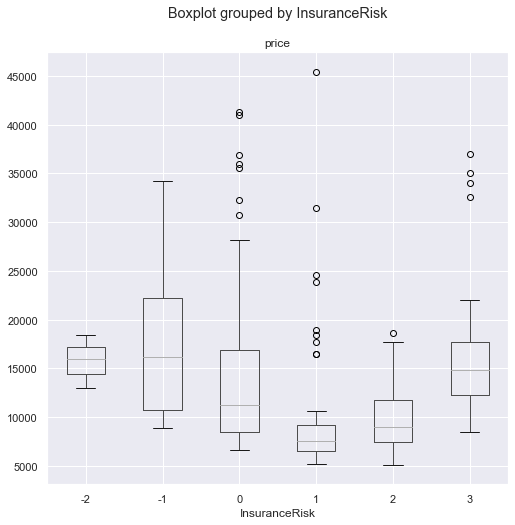

In [100]:
#Lets see the Boxplot of CAR "Price" grouped by "InsuranceRisk" feature
CAR.boxplot("price",by="InsuranceRisk")

D:\D Program Files\Anaconda\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


<AxesSubplot:xlabel='InsuranceRisk', ylabel='price'>

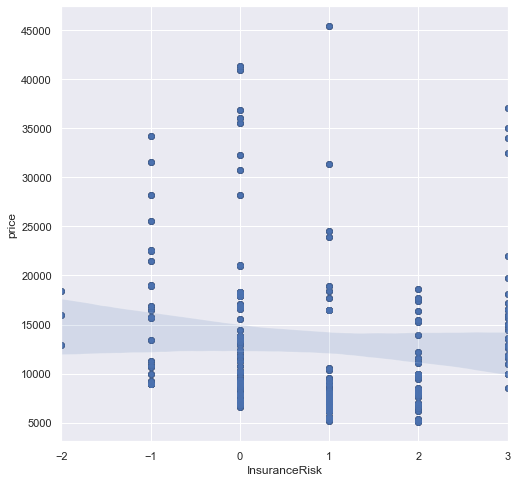

In [101]:
#"InsuranceRisk" is Ordinal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable
scatter(CAR['InsuranceRisk'],CAR['price']) #Scatter plot
regplot(CAR['InsuranceRisk'],CAR['price']) #Plot the Regression Line

In [102]:
# Shows the frequency of each unique Entry/Element/Category of "InsuranceRisk" Column
CAR.InsuranceRisk.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: InsuranceRisk, dtype: int64

In [103]:
#"InsuranceRisk" is Ordinal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable

#To find Correlation between "Price" & "InsuranceRisk" we will Perform Spearman Rank Correlation
#Correlation between Rank of "Price" & Rank of "InsuranceRisk"
#Distribution of Ranking Squared Differences
#Spearman Rank Correlation is not much efficient here due to lots of Tied Rank Scores in "InsuranceRisk"
#The Magnitude of Each Variable doesnt really matter
#The only thing that we care about the Rank of Each Variable
#The Manual Binning of "Price" for each category of "InsuranceRisk"
#The Manual Ranking of "Price" & "InsuranceRisk"
TotalPrice=[47345,381275,962586,542047,323497,464975]
MeanPrice=[15781,17330,14366,10037,10109,17221]
InsuranceRisk=[-2,-1,0,1,2,3]
correlation,pvalue = spearmanr(MeanPrice, InsuranceRisk)
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and InsuranceRisk have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and InsuranceRisk have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "InsuranceRisk"
#To find Correlation between "Price" & Rank "InsuranceRisk" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "InsuranceRisk"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
from scipy.stats import kendalltau
correlation,pvalue = kendalltau(MeanPrice, InsuranceRisk)
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and InsuranceRisk have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and InsuranceRisk have no non linear relationship")

#Detailed Test
linregress(CAR['price'], CAR['InsuranceRisk'])

Spearmans correlation coefficient:-0.257
0.6227871720116618
Confidence Level : 37.72128279883382 %
Null Hypothesis (H0)- price and InsuranceRisk have no non linear relationship
Kendall's Rank correlation coefficient:-0.200
0.7194444444444444
Confidence Level : 28.055555555555557 %
Null Hypothesis (H0)- price and InsuranceRisk have no non linear relationship


LinregressResult(slope=-1.246705097446515e-05, intercept=0.9996677689219471, rvalue=-0.07997822464270352, pvalue=0.2543117584863507, stderr=1.090562373327244e-05)

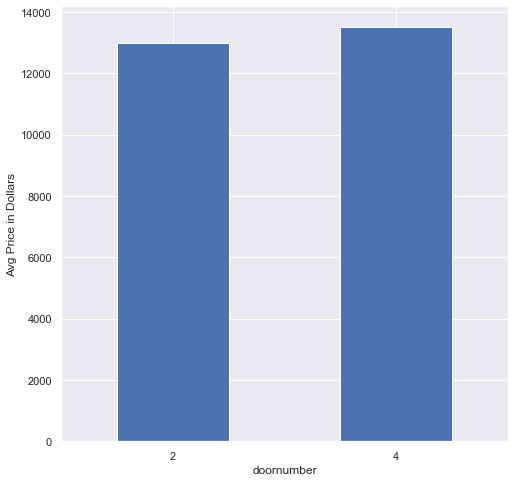

In [104]:
# Measures of Association between CAR "Price" & CAR "doornumber"
# Let's see the average price of automobile/CarModel in each category of "doornumber" feature
# groupby() will be applied to "doornumber" & mean() will be applied to "price" as per gropby() of "doornumber"
CAR[['doornumber','price']].groupby("doornumber").mean().plot(kind='bar',legend = False).set(xlabel='doornumber', ylabel='Avg Price in Dollars')
xticks(rotation = 0) # 0 degree Horizontal alignment of "doornumber" category names
show() # Average price of car is just a little lower for doornumber(2) than doornumber(4) in "doornumber" category.
#There is no significant impact of CAR "price" change with respect to CAR "doornumber" feature
#So CAR "price" is not CAR "doornumber" feature sensitive

In [105]:
# Let's see the average price of automobile/CarModel in each category of "doornumber" feature
# groupby() will be applied to "doornumber" & mean() will be applied to "price" as per gropby() of "doornumber"
# There is no Significant Difference in the Average Price of CAR in each category of "doornumber" feature
CAR.price.groupby(CAR.doornumber).mean()

doornumber
2    12989.924078
4    13501.152174
Name: price, dtype: float64

In [106]:
# Let's see the total price of automobile/CarModel in each category of "doornumber" feature
# groupby() will be applied to "doornumber" & sum() will be applied to "price" as per gropby() of "doornumber"
# There is no Significant Differences in the Total Price of CAR in each category of "doornumber" feature
CAR.price.groupby(CAR.doornumber).sum()

doornumber
2    1169093.167
4    1552632.500
Name: price, dtype: float64

<AxesSubplot:title={'center':'price'}, xlabel='doornumber'>

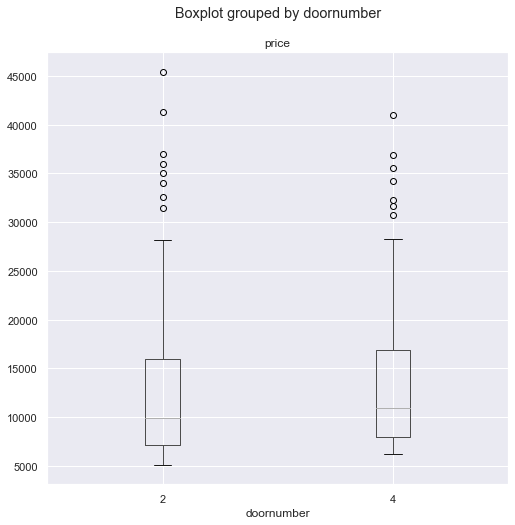

In [107]:
#Lets see the Boxplot of CAR "Price" grouped by "doornumber" feature
CAR.boxplot("price",by="doornumber")

D:\D Program Files\Anaconda\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


<AxesSubplot:xlabel='doornumber', ylabel='price'>

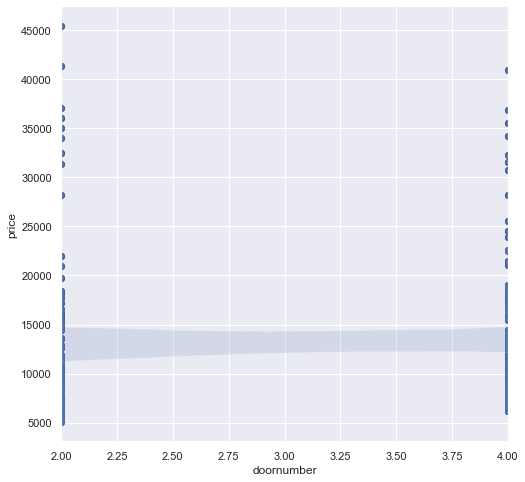

In [108]:
#"doornumber" is Ordinal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable
scatter(CAR['doornumber'],CAR['price']) #Scatter plot
regplot(CAR['doornumber'],CAR['price']) #Plot the Regression Line

In [109]:
# Shows the frequency of each unique Entry/Element/Category of "doornumber" Column
CAR.doornumber.value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [110]:
#"doornumber" is Ordinal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable

#To find Correlation between "Price" & "doornumber" we will Perform Spearman Rank Correlation
#Correlation between Rank of "Price" & Rank of "doornumber"
#Distribution of Ranking Squared Differences
#Spearman Rank Correlation is not much efficient here due to lots of Tied Rank Scores in "doornumber"
#The Magnitude of Each Variable doesnt really matter
#The only thing that we care about the Rank of Each Variable
#The Manual Binning of "Price" for each category of "doornumber"
#The Manual Ranking of "Price" & "doornumber"
TotalPrice=[1169093,1552632]
MeanPrice=[12989,13501]
DoorNumber=[2,4]

correlation,pvalue = spearmanr(MeanPrice, DoorNumber)
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and doornumber have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and doornumber have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "doornumber"
#To find Correlation between "Price" & "doornumber" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "doornumber"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
from scipy.stats import kendalltau
correlation,pvalue = kendalltau(MeanPrice, DoorNumber)
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and doornumber have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and doornumber have no non linear relationship")

#Detailed Test
linregress(CAR['price'], CAR['doornumber'])

Spearmans correlation coefficient:1.000
nan
Confidence Level : nan %
Null Hypothesis (H0)- price and doornumber have no non linear relationship
Kendall's Rank correlation coefficient:1.000
1.0
Confidence Level : 0.0 %
Null Hypothesis (H0)- price and doornumber have no non linear relationship


LinregressResult(slope=3.964900048030553e-06, intercept=3.0693103891326134, rvalue=0.03183526584560963, pvalue=0.6504483953299107, stderr=8.736863626474094e-06)

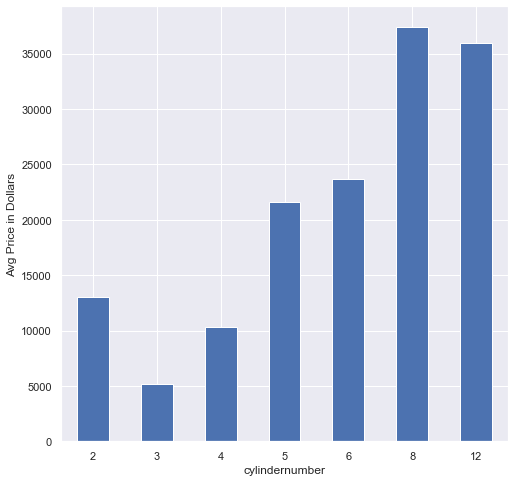

In [111]:
# Measures of Association between CAR "Price" & CAR "cylindernumber"
# Let's see the average price of automobile/CarModel in each category of "cylindernumber" feature
# groupby() will be applied to "cylindernumber" & mean() will be applied to "price" as per gropby() of "cylindernumber"
CAR[['cylindernumber','price']].groupby("cylindernumber").mean().plot(kind='bar',legend = False).set(xlabel='cylindernumber', ylabel='Avg Price in Dollars')
xticks(rotation = 0) # 0 degree Horizontal alignment of "cylindernumber" category names
show() # Average price of car is highest for cylindernumber(8) & lowest for cylindernumber(3) in "cylindernumber" category.
#There is significant impact of CAR "price" change with respect to CAR "cylindernumber" feature
#So CAR "price" is CAR "cylindernumber" feature sensitive

In [112]:
# Let's see the average price of automobile/CarModel in each category of "cylindernumber" feature
# groupby() will be applied to "cylindernumber" & mean() will be applied to "price" as per gropby() of "cylindernumber"
# There is Significant Differences in the Average Price of CAR in each category of "cylindernumber" feature
CAR.price.groupby(CAR.cylindernumber).mean()

cylindernumber
2     13020.000000
3      5151.000000
4     10285.754717
5     21630.469727
6     23671.833333
8     37400.100000
12    36000.000000
Name: price, dtype: float64

In [113]:
# Let's see the total price of automobile/CarModel in each category of "cylindernumber" feature
# groupby() will be applied to "cylindernumber" & sum() will be applied to "price" as per gropby() of "cylindernumber"
# There is Significant Differences in the Total Price of CAR in each category of "cylindernumber" feature
CAR.price.groupby(CAR.cylindernumber).sum()

cylindernumber
2       52080.000
3        5151.000
4     1635435.000
5      237935.167
6      568124.000
8      187000.500
12      36000.000
Name: price, dtype: float64

<AxesSubplot:title={'center':'price'}, xlabel='cylindernumber'>

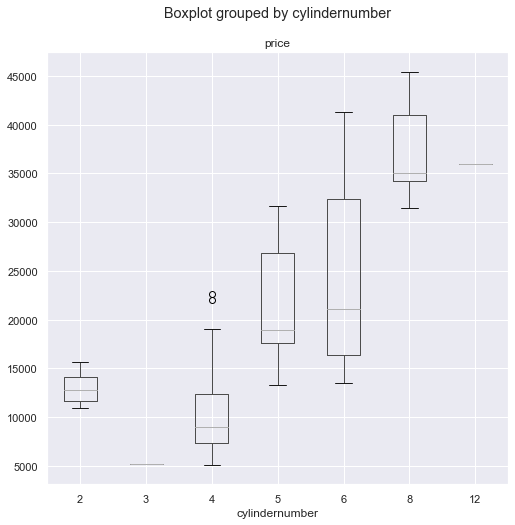

In [114]:
#Lets see the Boxplot of CAR "Price" grouped by "cylindernumber" feature
CAR.boxplot("price",by="cylindernumber")

D:\D Program Files\Anaconda\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

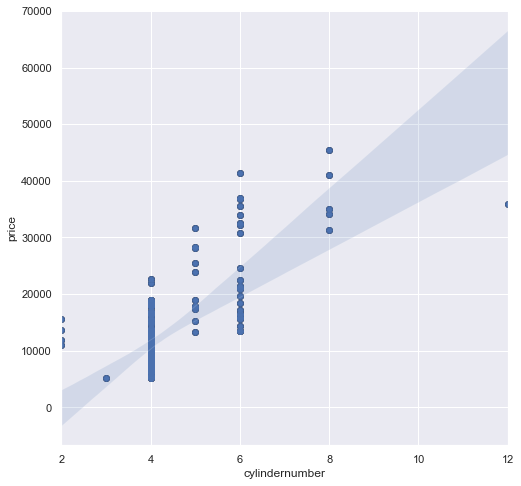

In [115]:
#"cylindernumber" is Ordinal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable
scatter(CAR['cylindernumber'],CAR['price']) #Scatter plot
regplot(CAR['cylindernumber'],CAR['price']) #Plot the Regression Line

In [116]:
# Shows the frequency of each unique Entry/Element/Category of "cylindernumber" Column
CAR.cylindernumber.value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64

In [117]:
#"cylindernumber" is Ordinal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable

#To find Correlation between "Price" & "cylindernumber" we will Perform Spearman Rank Correlation
#Correlation between Rank of "Price" & Rank of "cylindernumber"
#Distribution of Ranking Squared Differences
#Spearman Rank Correlation is not much efficient here due to lots of Tied Rank Scores in "cylindernumber"
#The Magnitude of Each Variable doesnt really matter
#The only thing that we care about the Rank of Each Variable
#The Manual Binning of "Price" for each category of "cylindernumber"
#The Manual Ranking of "Price" & "cylindernumber"
TotalPrice=[52080,5151,1635435,237935,568124,187000,36000]
MeanPrice=[13020,5151,10285,21630,23671,37400,36000]
CylinderNumber=[2,3,4,5,6,8,12]

correlation,pvalue = spearmanr(MeanPrice,CylinderNumber)
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and cylindernumber have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and cylindernumber have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "cylindernumber"
#To find Correlation between "Price" & "cylindernumber" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "cylindernumber"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
from scipy.stats import kendalltau
correlation,pvalue = kendalltau(MeanPrice,CylinderNumber)
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and cylindernumber have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and cylindernumber have no non linear relationship")

#Detailed Test
linregress(CAR['price'], CAR['cylindernumber'])

Spearmans correlation coefficient:0.857
0.01369732661532562
Confidence Level : 98.63026733846743 %
Alternate Hypothesis (H1) - price and cylindernumber have non linear relationship
Kendall's Rank correlation coefficient:0.714
0.03015873015873016
Confidence Level : 96.98412698412699 %
Alternate Hypothesis (H1) - price and cylindernumber have non linear relationship


LinregressResult(slope=9.718324043418227e-05, intercept=3.0902140493075807, rvalue=0.7183049020002832, pvalue=8.028863372444644e-34, stderr=6.60654330369684e-06)

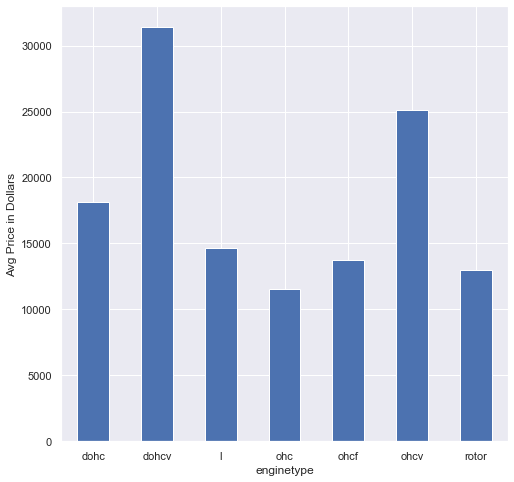

In [118]:
# Measures of Association between CAR "Price" & CAR "enginetype"
# Let's see the average price of automobile/CarModel in each category of "enginetype" feature
# groupby() will be applied to "enginetype" & mean() will be applied to "price" as per gropby() of "enginetype"
CAR[['enginetype','price']].groupby("enginetype").mean().plot(kind='bar',legend = False).set(xlabel='enginetype', ylabel='Avg Price in Dollars')
xticks(rotation = 0) # 0 degree Horizontal alignment of "enginetype" category names
show() # Average price of car is highest for enginetype(dohcv) & lowest for enginetype(ohc) in "enginetype" category.
#There is significant impact of CAR "price" change with respect to CAR "enginetype" feature
#So CAR "price" is CAR "enginetype" feature sensitive

In [119]:
# Let's see the average price of automobile/CarModel in each category of "enginetype" feature
# groupby() will be applied to "enginetype" & mean() will be applied to "price" as per gropby() of "enginetype"
# There is Significant Differences in the Average Price of CAR in each category of "enginetype" feature
CAR.price.groupby(CAR.enginetype).mean()

enginetype
dohc     18116.416667
dohcv    31400.500000
l        14627.583333
ohc      11574.048426
ohcf     13738.600000
ohcv     25098.384615
rotor    13020.000000
Name: price, dtype: float64

In [120]:
# Let's see the total price of automobile/CarModel in each category of "enginetype" feature
# groupby() will be applied to "enginetype" & sum() will be applied to "price" as per gropby() of "enginetype"
# There is Significant Differences in the Total Price of CAR in each category of "enginetype" feature
CAR.price.groupby(CAR.enginetype).sum()

enginetype
dohc      217397.000
dohcv      31400.500
l         175531.000
ohc      1712959.167
ohcf      206079.000
ohcv      326279.000
rotor      52080.000
Name: price, dtype: float64

<AxesSubplot:title={'center':'price'}, xlabel='enginetype'>

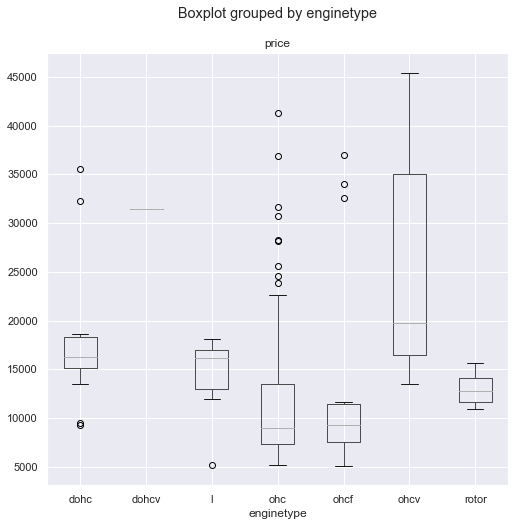

In [121]:
#Lets see the Boxplot of CAR "Price" grouped by "enginetype" feature
CAR.boxplot("price",by="enginetype")

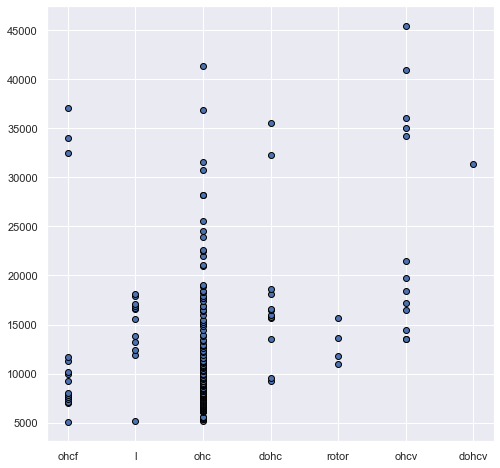

In [122]:
#"enginetype" is Nominal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable
scatter(CAR['enginetype'],CAR['price']) #Scatter plot

In [123]:
# Shows the frequency of each unique Entry/Element/Category of "enginetype" Column
CAR.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [124]:
#"enginetype" is Nominal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable

#To find Correlation between "Price" & "enginetype" we will Perform Kruskal Wallis H Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between CAR "Price" & CAR "enginetype"
from scipy.stats import kruskal

#Sampling of "Price" for each category of "enginetype"
dohc=CAR[CAR.enginetype=='dohc']
ohcv=CAR[CAR.enginetype=='ohcv']
ohc=CAR[CAR.enginetype=='ohc']
ohcf=CAR[CAR.enginetype=='ohcf']
l=CAR[CAR.enginetype=='l']
rotor=CAR[CAR.enginetype=='rotor']
dohcv=CAR[CAR.enginetype=='dohcv']

#Each Sample Must have at least 5 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
stat,pvalue=kruskal(dohc.price,ohcv.price,ohc.price,ohcf.price,l.price,rotor.price,dohcv.price)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and enginetype have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and enginetype are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "enginetype" we will Perform Moods Median Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between CAR "Price" & CAR "enginetype"
#Each Sample Must have at least 1 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
from scipy.stats import median_test

stat,pvalue,GrandMedian,ContigTable=median_test(dohc.price,ohcv.price,ohc.price,ohcf.price,l.price,rotor.price,dohcv.price)
print(GrandMedian)
print(ContigTable)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and enginetype have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and enginetype are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "enginetype" we will Perform Spearman Rank Correlation
#Correlation between Rank of "Price" & Rank of "enginetype"
#Distribution of Ranking Squared Differences
#Spearman Rank Correlation is not much efficient here due to lots of Tied Rank Scores in "enginetype"
#The Magnitude of Each Variable doesnt really matter
#The only thing that we care about the Rank of Each Variable
#The Manual Binning of "Price" for each category of "enginetype"
#The Manual Ranking of "Price" & "enginetype"
TotalPrice=[217397,31400,175531,1712959,206079,326279,52080]
MeanPrice=[18116,31400,14627,11574,13738,25098,13020]
EngineType=['dohc','dohcv','l','ohc','ohcf','ohcv','rotor']
EngineFreq=[12,1,12,148,15,13,4]

correlation,pvalue = spearmanr(TotalPrice,EngineFreq)
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and enginetype have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and enginetype have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "enginetype"
#To find Correlation between "Price" & "enginetype" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "enginetype"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
from scipy.stats import kendalltau
correlation,pvalue = kendalltau(TotalPrice,EngineFreq)
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and enginetype have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and enginetype have no non linear relationship")

Alternate Hypothesis (H1): Price and enginetype have some form of relationship.
Confidence Level : 99.99995712729259 %
Statistics=40.134, p=0.000
10295.0
[[10 13 58  5 11  4  1]
 [ 2  0 90 10  1  0  0]]
Alternate Hypothesis (H1): Price and enginetype have some form of relationship.
Confidence Level : 99.99995929131458 %
Statistics=40.248, p=0.000
Spearmans correlation coefficient:0.865
0.011965034552489661
Confidence Level : 98.80349654475104 %
Alternate Hypothesis (H1) - price and enginetype have non linear relationship
Kendall's Rank correlation coefficient:0.781
0.01507490731059806
Confidence Level : 98.4925092689402 %
Alternate Hypothesis (H1) - price and enginetype have non linear relationship


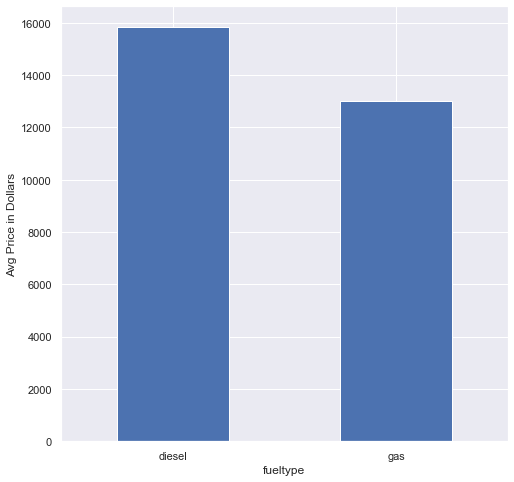

In [125]:
# Measures of Association between CAR "Price" & CAR "fueltype"
# Let's see the average price of automobile/CarModel in each category of "fueltype" feature
# groupby() will be applied to "fueltype" & mean() will be applied to "price" as per gropby() of "fueltype"
CAR[['fueltype','price']].groupby("fueltype").mean().plot(kind='bar',legend = False).set(xlabel='fueltype', ylabel='Avg Price in Dollars')
xticks(rotation = 0) # 0 degree Horizontal alignment of "fueltype" category names
show() # Average price of car is higher for fueltype(diesel) & lowest for fueltype(gas) in "fueltype" category.
#There is significant impact of CAR "price" change with respect to CAR "fueltype" feature
#So CAR "price" is CAR "fueltype" feature sensitive

In [126]:
# Let's see the average price of automobile/CarModel in each category of "fueltype" feature
# groupby() will be applied to "fueltype" & mean() will be applied to "price" as per gropby() of "fueltype"
# There is Significant Difference in the Average Price of CAR in each category of "fueltype" feature
CAR.price.groupby(CAR.fueltype).mean()

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64

In [127]:
# Let's see the total price of automobile/CarModel in each category of "fueltype" feature
# groupby() will be applied to "fueltype" & sum() will be applied to "price" as per gropby() of "fueltype"
# There is Significant Difference in the Total Price of CAR in each category of "fueltype" feature
CAR.price.groupby(CAR.fueltype).sum()

fueltype
diesel     316763.000
gas       2404962.667
Name: price, dtype: float64

<AxesSubplot:title={'center':'price'}, xlabel='fueltype'>

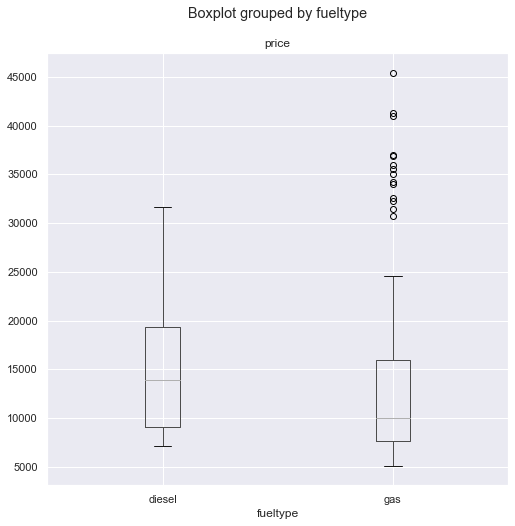

In [128]:
#Lets see the Boxplot of CAR "Price" grouped by "fueltype" feature
CAR.boxplot("price",by="fueltype")

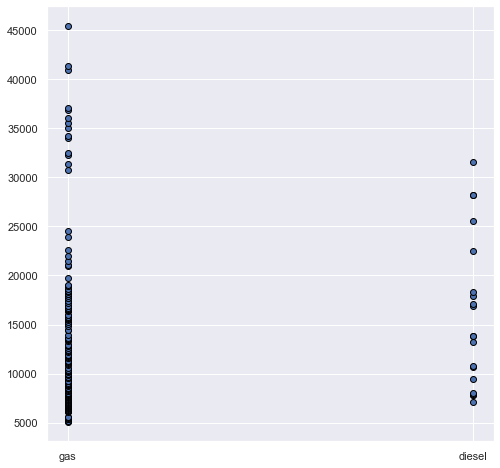

In [129]:
#"fueltype" is Nominal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable
scatter(CAR['fueltype'],CAR['price']) #Scatter plot

In [130]:
#Shows the frequency of each unique Entry/Element/Category of "fueltype" Column
CAR.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [131]:
#There Should Be No Outliers for the Continuous Variable ie "DEBTINC" for each category of the "DEFAULTER" variable
#Continuous Variable Should be approximately normally distributed for each category of the "DEFAULTER" variable
#Continuous Variable Should have equal Variances for Each Category of the "DEFAULTER" variable
Fueltype=CAR["fueltype"].replace({'gas':1,'diesel':0})
from scipy.stats import pointbiserialr
stat,pvalue=pointbiserialr(Fueltype, CAR['price'])
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): price and fueltype have some form of relationship.")
else:
    print("Null Hypothesis (H0) : price and fueltype are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))


#"fueltype" is Dichotomous Nominal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable

#To find Correlation between "Price" & "fueltype" we will Perform Mann Whiteny U Test
#It is Non Parametric Version of Independent 2 Sample T-test
#Correlation between CAR "Price" & CAR "fueltype"

#Lets do Mann Whiteny U Test First
from scipy.stats import mannwhitneyu

#Sampling of "Price" for each category of "fueltype"
gas=CAR[CAR.fueltype=='gas']
diesel=CAR[CAR.fueltype=='diesel']

stat,pvalue=mannwhitneyu(gas.price,diesel.price)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and fueltype have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and fueltype are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "fueltype" we will Perform Kruskal Wallis H Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between CAR "Price" & CAR "fueltype"
from scipy.stats import kruskal

#Each Sample Must have at least 5 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
stat,pvalue=kruskal(gas.price,diesel.price)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and fueltype have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and fueltype are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "fueltype" we will Perform Moods Median Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between CAR "Price" & CAR "fueltype"
#Each Sample Must have at least 1 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
from scipy.stats import median_test
stat,pvalue,GrandMedian,ContigTable=median_test(gas.price,diesel.price)
print(GrandMedian)
print(ContigTable)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and fueltype have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and fueltype are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "fueltype" we will Perform Spearman Rank Correlation
#Correlation between Rank of "Price" & Rank of "fueltype"
#Distribution of Ranking Squared Differences
#Spearman Rank Correlation is not much efficient here due to lots of Tied Rank Scores in "fueltype"
#The Magnitude of Each Variable doesnt really matter
#The only thing that we care about the Rank of Each Variable
#The Manual Binning of "Price" for each category of "fueltype"
#The Manual Ranking of "Price" & "fueltype"
TotalPrice=[316763,2404962]
MeanPrice=[15838,12999]
FuelType=['diesel','gas']
FuelTypeFreq=[20,185]

correlation,pvalue = spearmanr(TotalPrice,FuelTypeFreq)
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and fueltype have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and fueltype have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "fueltype"
#To find Correlation between "Price" & "fueltype" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "fueltype"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
from scipy.stats import kendalltau
correlation,pvalue = kendalltau(TotalPrice,FuelTypeFreq)
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and fueltype have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and fueltype have no non linear relationship")

#To find Correlation between "Price" & "fueltype" we will Perform Wilcoxon Rank Sum Test
#It is Non Parametric Version of independent 2 sample T test
#Correlation between CAR "Price" & CAR "fueltype"
#Each Sample Must have at least 1 measurements
#Only two samples work for this test
#The samples are not required to have the same length
from scipy.stats import ranksums
correlation,pvalue = ranksums(gas.price,diesel.price)
print("Wilcoxon Rank Sum correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and fueltype have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and fueltype have no non linear relationship")

Null Hypothesis (H0) : price and fueltype are independent of each other.
Confidence Level : nan %
Statistics=nan, p=nan
Alternate Hypothesis (H1): Price and fueltype have some form of relationship.
Confidence Level : 97.69163157688673 %
Statistics=1347.000, p=0.023
Alternate Hypothesis (H1): Price and fueltype have some form of relationship.
Confidence Level : 95.40490756356948 %
Statistics=3.983, p=0.046
10295.0
[[88 14]
 [97  6]]
Null Hypothesis (H0) : Price and fueltype are independent of each other.
Confidence Level : 90.5212889598056 %
Statistics=2.791, p=0.095
Spearmans correlation coefficient:1.000
nan
Confidence Level : nan %
Null Hypothesis (H0)- price and fueltype have no non linear relationship
Kendall's Rank correlation coefficient:1.000
1.0
Confidence Level : 0.0 %
Null Hypothesis (H0)- price and fueltype have no non linear relationship
Wilcoxon Rank Sum correlation coefficient:-1.996
0.04595213518525119
Confidence Level : 95.40478648147487 %
Alternate Hypothesis (H1) - pr

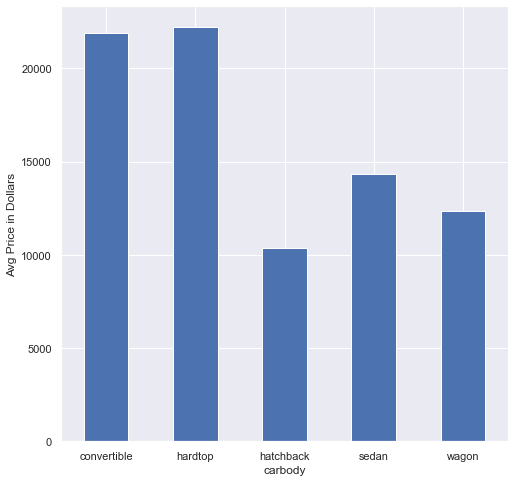

In [132]:
# Measures of Association between CAR "Price" & CAR "carbody"
# Let's see the average price of automobile/CarModel in each category of "carbody" feature
# groupby() will be applied to "carbody" & mean() will be applied to "price" as per gropby() of "carbody"
CAR[['carbody','price']].groupby("carbody").mean().plot(kind='bar',legend = False).set(xlabel='carbody', ylabel='Avg Price in Dollars')
xticks(rotation = 0) # 0 degree Horizontal alignment of "carbody" category names
show() # Average price of car is highest for carbody(hardtop) & lowest for carbody(hatchback) in "carbody" category.
#There is significant impact of CAR "price" change with respect to CAR "carbody" feature
#So CAR "price" is CAR "carbody" feature sensitive

In [133]:
# Let's see the average price of automobile/CarModel in each category of "carbody" feature
# groupby() will be applied to "carbody" & mean() will be applied to "price" as per gropby() of "carbody"
# There is Significant Differences in the Average Price of CAR in each category of "carbody" feature
CAR.price.groupby(CAR.carbody).mean()

carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64

In [134]:
# Let's see the total price of automobile/CarModel in each category of "carbody" feature
# groupby() will be applied to "carbody" & sum() will be applied to "price" as per gropby() of "carbody"
# There is Significant Differences in the Total Price of CAR in each category of "carbody" feature
CAR.price.groupby(CAR.carbody).sum()

carbody
convertible     131343.000
hardtop         177668.000
hatchback       726365.667
sedan          1377050.000
wagon           309299.000
Name: price, dtype: float64

<AxesSubplot:title={'center':'price'}, xlabel='carbody'>

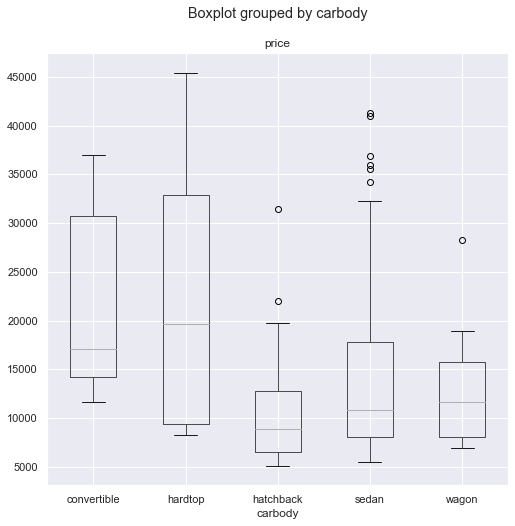

In [135]:
#Lets see the Boxplot of CAR "Price" grouped by "carbody" feature
CAR.boxplot("price",by="carbody")

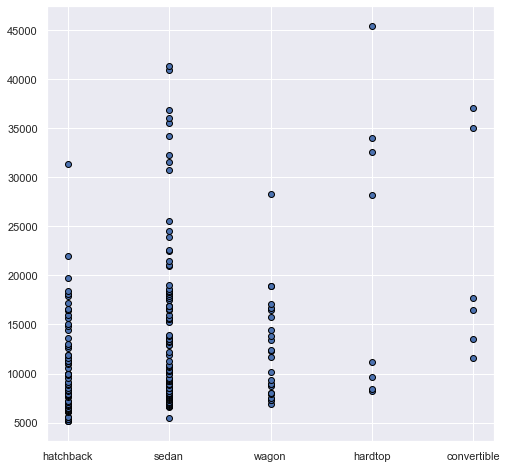

In [136]:
#"carbody" is Nominal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable
scatter(CAR['carbody'],CAR['price']) #Scatter plot

In [137]:
#Shows the frequency of each unique Entry/Element/Category of "carbody" Column
CAR.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [138]:
#"carbody" is Nominal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable

#To find Correlation between "Price" & "carbody" we will Perform Kruskal Wallis H Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between CAR "Price" & CAR "carbody"
from scipy.stats import kruskal

#Sampling of "Price" for each category of "carbody"
sedan=CAR[CAR.carbody=='sedan']
hatchback=CAR[CAR.carbody=='hatchback']
wagon=CAR[CAR.carbody=='wagon']
hardtop=CAR[CAR.carbody=='hardtop']
convertible=CAR[CAR.carbody=='convertible']

#Each Sample Must have at least 5 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
stat,pvalue=kruskal(sedan.price,hatchback.price,wagon.price,hardtop.price,convertible.price)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and carbody have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and carbody are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "carbody" we will Perform Moods Median Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between CAR "Price" & CAR "carbody"
#Each Sample Must have at least 1 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
from scipy.stats import median_test

stat,pvalue,GrandMedian,ContigTable=median_test(sedan.price,hatchback.price,wagon.price,hardtop.price,convertible.price)
print(GrandMedian)
print(ContigTable)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and carbody have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and carbody are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "carbody" we will Perform Spearman Rank Correlation
#Correlation between Rank of "Price" & Rank of "carbody"
#Distribution of Ranking Squared Differences
#Spearman Rank Correlation is not much efficient here due to lots of Tied Rank Scores in "carbody"
#The Magnitude of Each Variable doesnt really matter
#The only thing that we care about the Rank of Each Variable
#The Manual Binning of "Price" for each category of "carbody"
#The Manual Ranking of "Price" & "carbody"
TotalPrice=[131343,177668,726365,1377050,309299]
MeanPrice=[21890,22208,10376,14344,12371]
Carbody=['convertible','hardtop','hatchback','sedan','wagon']
CarbodyFreq=[6,8,70,96,25]

correlation,pvalue = spearmanr(TotalPrice,CarbodyFreq)
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and carbody have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and carbody have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "carbody"
#To find Correlation between "Price" & "carbody" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "carbody"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
from scipy.stats import kendalltau
correlation,pvalue = kendalltau(TotalPrice,CarbodyFreq)
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and carbody have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and carbody have no non linear relationship")


Alternate Hypothesis (H1): Price and carbody have some form of relationship.
Confidence Level : 99.98157465191312 %
Statistics=22.183, p=0.000
10295.0
[[51 27 13  5  6]
 [45 43 12  3  0]]
Alternate Hypothesis (H1): Price and carbody have some form of relationship.
Confidence Level : 96.81204296666817 %
Statistics=10.568, p=0.032
Spearmans correlation coefficient:1.000
1.4042654220543672e-24
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and carbody have non linear relationship
Kendall's Rank correlation coefficient:1.000
0.016666666666666666
Confidence Level : 98.33333333333333 %
Alternate Hypothesis (H1) - price and carbody have non linear relationship


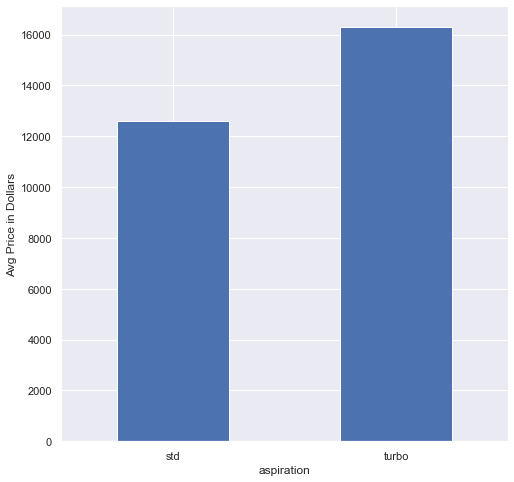

In [139]:
# Measures of Association between CAR "Price" & CAR "aspiration"
# Let's see the average price of automobile/CarModel in each category of "aspiration" feature
# groupby() will be applied to "aspiration" & mean() will be applied to "price" as per gropby() of "aspiration"
CAR[['aspiration','price']].groupby("aspiration").mean().plot(kind='bar',legend = False).set(xlabel='aspiration', ylabel='Avg Price in Dollars')
xticks(rotation = 0) # 0 degree Horizontal alignment of "aspiration" category names
show() # Average price of car is higher for aspiration(turbo) & lower for aspiration(std) in "aspiration" category.
#There is significant impact of CAR "price" change with respect to CAR "aspiration" feature
#So CAR "price" is CAR "aspiration" feature sensitive

In [140]:
# Let's see the average price of automobile/CarModel in each category of "aspiration" feature
# groupby() will be applied to "aspiration" & mean() will be applied to "price" as per gropby() of "aspiration"
# There is Significant Differences in the Average Price of CAR in each category of "aspiration" feature
CAR.price.groupby(CAR.aspiration).mean()

aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64

In [141]:
# Let's see the total price of automobile/CarModel in each category of "aspiration" feature
# groupby() will be applied to "aspiration" & sum() will be applied to "price" as per gropby() of "aspiration"
# There is Significant Differences in the Total Price of CAR in each category of "aspiration" feature
CAR.price.groupby(CAR.aspiration).sum()

aspiration
std      2118693.500
turbo     603032.167
Name: price, dtype: float64

<AxesSubplot:title={'center':'price'}, xlabel='aspiration'>

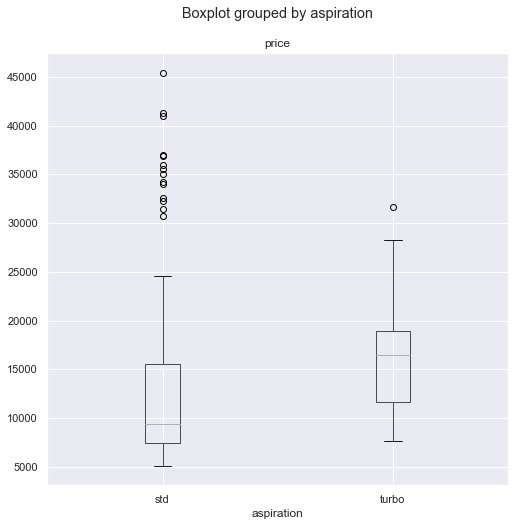

In [142]:
#Lets see the Boxplot of CAR "Price" grouped by "aspiration" feature
CAR.boxplot("price",by="aspiration")

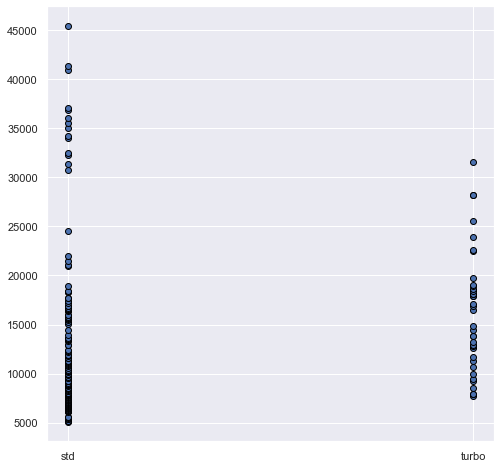

In [143]:
#"aspiration" is Nominal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable
scatter(CAR['aspiration'],CAR['price']) #Scatter plot

In [144]:
#Shows the frequency of each unique Entry/Element/Category of "aspiration" Column
CAR.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [145]:
#There Should Be No Outliers for the Continuous Variable ie "DEBTINC" for each category of the "DEFAULTER" variable
#Continuous Variable Should be approximately normally distributed for each category of the "DEFAULTER" variable
#Continuous Variable Should have equal Variances for Each Category of the "DEFAULTER" variable
Aspiration=CAR["aspiration"].replace({'std':1,'turbo':0})
stat,pvalue=pointbiserialr(Aspiration, CAR['price'])
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): price and aspiration have some form of relationship.")
else:
    print("Null Hypothesis (H0) : price and aspiration are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#"aspiration" is Dichotomous Nominal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable

#To find Correlation between "Price" & "aspiration" we will Perform Mann Whiteny U Test
#It is Non Parametric Version of Independent 2 Sample T-test
#Correlation between CAR "Price" & CAR "aspiration"

#Lets do Mann Whiteny U Test First
from scipy.stats import mannwhitneyu

#Sampling of "Price" for each category of "aspiration"
std=CAR[CAR.aspiration=='std']
turbo=CAR[CAR.aspiration=='turbo']

stat,pvalue=mannwhitneyu(std.price,turbo.price)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and aspiration have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and aspiration are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "aspiration" we will Perform Kruskal Wallis H Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between CAR "Price" & CAR "aspiration"
from scipy.stats import kruskal

#Each Sample Must have at least 5 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
stat,pvalue=kruskal(std.price,turbo.price)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and aspiration have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and aspiration are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "aspiration" we will Perform Moods Median Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between CAR "Price" & CAR "aspiration"
#Each Sample Must have at least 1 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
from scipy.stats import median_test
stat,pvalue,GrandMedian,ContigTable=median_test(std.price,turbo.price)
print(GrandMedian)
print(ContigTable)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and aspiration have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and aspiration are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "aspiration" we will Perform Spearman Rank Correlation
#Correlation between Rank of "Price" & Rank of "aspiration"
#Distribution of Ranking Squared Differences
#Spearman Rank Correlation is not much efficient here due to lots of Tied Rank Scores in "aspiration"
#The Magnitude of Each Variable doesnt really matter
#The only thing that we care about the Rank of Each Variable
#The Manual Binning of "Price" for each category of "aspiration"
#The Manual Ranking of "Price" & "aspiration"
TotalPrice=[2118693,603032]
MeanPrice=[12611,16298]
Aspiration=['std','turbo']
AspirationFreq=[168,37]

correlation,pvalue = spearmanr(TotalPrice,AspirationFreq)
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and aspiration have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and aspiration have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "aspiration"
#To find Correlation between "Price" & "aspiration" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "aspiration"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
from scipy.stats import kendalltau
correlation,pvalue = kendalltau(TotalPrice,AspirationFreq)
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and aspiration have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and aspiration have no non linear relationship")

#To find Correlation between "Price" & "fueltype" we will Perform Wilcoxon Rank Sum Test
#It is Non Parametric Version of independent 2 sample T test
#Correlation between CAR "Price" & CAR "fueltype"
#Each Sample Must have at least 1 measurements
#Only two samples work for this test
#The samples are not required to have the same length
correlation,pvalue = ranksums(std.price,turbo.price)
print("Wilcoxon Rank Sum correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and aspiration have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and aspiration have no non linear relationship")

Null Hypothesis (H0) : price and aspiration are independent of each other.
Confidence Level : nan %
Statistics=nan, p=nan
Alternate Hypothesis (H1): Price and aspiration have some form of relationship.
Confidence Level : 99.99948627255051 %
Statistics=1666.500, p=0.000
Alternate Hypothesis (H1): Price and aspiration have some form of relationship.
Confidence Level : 99.99897978498133 %
Statistics=19.473, p=0.000
10295.0
[[72 30]
 [96  7]]
Alternate Hypothesis (H1): Price and aspiration have some form of relationship.
Confidence Level : 99.99437649039774 %
Statistics=16.225, p=0.000
Spearmans correlation coefficient:1.000
nan
Confidence Level : nan %
Null Hypothesis (H0)- price and aspiration have no non linear relationship
Kendall's Rank correlation coefficient:1.000
1.0
Confidence Level : 0.0 %
Null Hypothesis (H0)- price and aspiration have no non linear relationship
Wilcoxon Rank Sum correlation coefficient:-4.413
1.0203309293514567e-05
Confidence Level : 99.99897966907065 %
Alterna

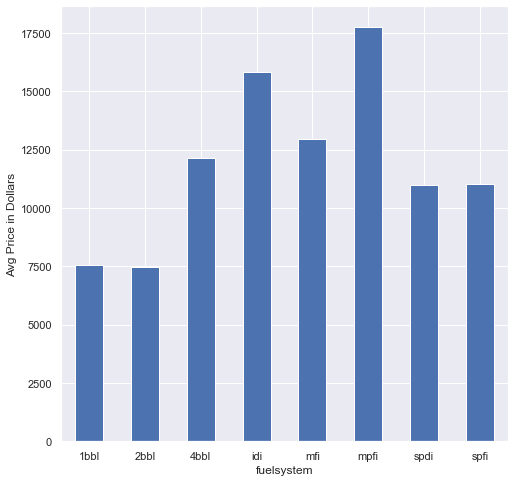

In [146]:
#Measures of Association between CAR "Price" & CAR "fuelsystem"
#Let's see the average price of automobile/CarModel in each category of "fuelsystem" feature
#groupby() will be applied to "fuelsystem" & mean() will be applied to "price" as per gropby() of "fuelsystem"
CAR[['fuelsystem','price']].groupby("fuelsystem").mean().plot(kind='bar',legend = False).set(xlabel='fuelsystem', ylabel='Avg Price in Dollars')
xticks(rotation = 0) # 0 degree Horizontal alignment of "fuelsystem" category names
show() # Average price of car is highest for fuelsystem(mpfi) & lowest for fuelsystem(1bbl & 2bbl) in "fuelsystem" category.
#There is significant impact of CAR "price" change with respect to CAR "fuelsystem" feature
#So CAR "price" is CAR "fuelsystem" feature sensitive

In [147]:
# Let's see the average price of automobile/CarModel in each category of "fuelsystem" feature
# groupby() will be applied to "fuelsystem" & mean() will be applied to "price" as per gropby() of "fuelsystem"
# There is Significant Differences in the Average Price of CAR in each category of "fuelsystem" feature
CAR.price.groupby(CAR.fuelsystem).mean()

fuelsystem
1bbl     7555.545455
2bbl     7478.151515
4bbl    12145.000000
idi     15838.150000
mfi     12964.000000
mpfi    17754.602840
spdi    10990.444444
spfi    11048.000000
Name: price, dtype: float64

In [148]:
# Let's see the total price of automobile/CarModel in each category of "fuelsystem" feature
# groupby() will be applied to "fuelsystem" & sum() will be applied to "price" as per gropby() of "fuelsystem"
# There is Significant Differences in the Total Price of CAR in each category of "fuelsystem" feature
CAR.price.groupby(CAR.fuelsystem).sum()

fuelsystem
1bbl      83111.000
2bbl     493558.000
4bbl      36435.000
idi      316763.000
mfi       12964.000
mpfi    1668932.667
spdi      98914.000
spfi      11048.000
Name: price, dtype: float64

<AxesSubplot:title={'center':'price'}, xlabel='fuelsystem'>

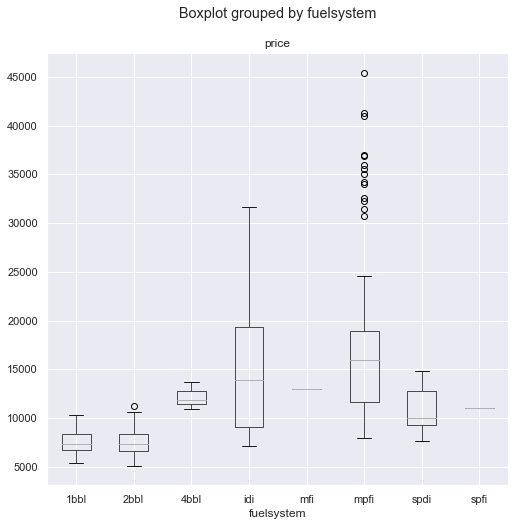

In [149]:
#Lets see the Boxplot of CAR "Price" grouped by "fuelsystem" feature
CAR.boxplot("price", by="fuelsystem")

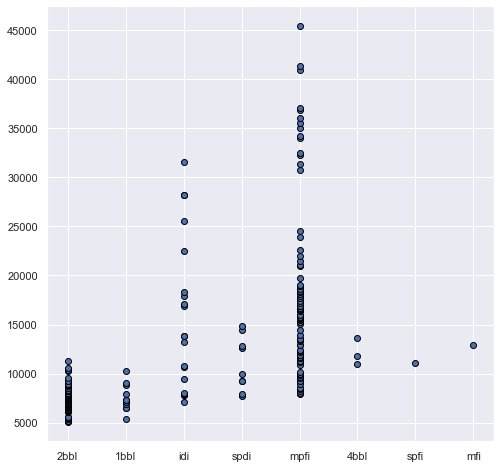

In [150]:
#"fuelsystem" is Nominal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable
scatter(CAR['fuelsystem'],CAR['price']) #Scatter plot

In [151]:
#Shows the frequency of each unique Entry/Element/Category of "fuelsystem" Column
CAR.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [152]:
#"fuelsystem" is Nominal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable

#To find Correlation between "Price" & "fuelsystem" we will Perform Kruskal Wallis H Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between CAR "Price" & CAR "fuelsystem"
from scipy.stats import kruskal

#Sampling of "Price" for each category of "fuelsystem"
mpfi=CAR[CAR.fuelsystem=='mpfi']
twobbl=CAR[CAR.fuelsystem=='2bbl']
omnebbl=CAR[CAR.fuelsystem=='1bbl']
spdi=CAR[CAR.fuelsystem=='spdi']
fourbbl=CAR[CAR.fuelsystem=='4bbl']
spfi=CAR[CAR.fuelsystem=='spfi']
mfi=CAR[CAR.fuelsystem=='mfi']

#Each Sample Must have at least 5 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
stat,pvalue=kruskal(mpfi.price,twobbl.price,omnebbl.price,spdi.price,fourbbl.price,spfi.price,mfi.price)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and fuelsystem have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and fuelsystem are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "fuelsystem" we will Perform Moods Median Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between CAR "Price" & CAR "fuelsystem"
#Each Sample Must have at least 1 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
from scipy.stats import median_test

stat,pvalue,GrandMedian,ContigTable=median_test(mpfi.price,twobbl.price,omnebbl.price,spdi.price,fourbbl.price,spfi.price,mfi.price)
print(GrandMedian)
print(ContigTable)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and fuelsystem have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and fuelsystem are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "fuelsystem" we will Perform Spearman Rank Correlation
#Correlation between Rank of "Price" & Rank of "fuelsystem"
#Distribution of Ranking Squared Differences
#Spearman Rank Correlation is not much efficient here due to lots of Tied Rank Scores in "fuelsystem"
#The Magnitude of Each Variable doesnt really matter
#The only thing that we care about the Rank of Each Variable
#The Manual Binning of "Price" for each category of "fuelsystem"
#The Manual Ranking of "Price" & "fuelsystem"
TotalPrice=[83111,493558,36435,316763,12964,1668932,98914,11048]
MeanPrice=[7555,7478,12145,15838,12964,17754,10990,11048]
FuelSystem=['1bbl','2bbl','4bbl','idi','mfi','mpfi','spdi','spfi']
FuelSystemFreq=[11,66,3,20,1,94,9,1]

correlation,pvalue = spearmanr(TotalPrice,FuelSystemFreq)
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and fuelsystem have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and fuelsystem have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "fuelsystem"
#To find Correlation between "Price" & "fuelsystem" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "fuelsystem"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
from scipy.stats import kendalltau
correlation,pvalue = kendalltau(TotalPrice,FuelSystemFreq)
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and fuelsystem have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and fuelsystem have no non linear relationship")


Alternate Hypothesis (H1): Price and fuelsystem have some form of relationship.
Confidence Level : 100.0 %
Statistics=122.051, p=0.000
9989.0
[[78  4  1  4  3  1  1]
 [16 62 10  5  0  0  0]]
Alternate Hypothesis (H1): Price and fuelsystem have some form of relationship.
Confidence Level : 100.0 %
Statistics=104.336, p=0.000
Spearmans correlation coefficient:0.970
6.548558831120658e-05
Confidence Level : 99.99345144116887 %
Alternate Hypothesis (H1) - price and fuelsystem have non linear relationship
Kendall's Rank correlation coefficient:0.909
0.0018276750354536864
Confidence Level : 99.81723249645464 %
Alternate Hypothesis (H1) - price and fuelsystem have non linear relationship


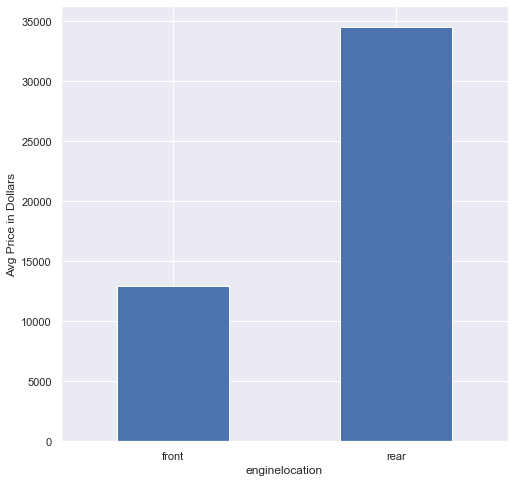

In [153]:
# Measures of Association between CAR "Price" & CAR "enginelocation"
# Let's see the average price of automobile/CarModel in each category of "enginelocation" feature
# groupby() will be applied to "enginelocation" & mean() will be applied to "price" as per gropby() of "enginelocation"
CAR[['enginelocation','price']].groupby("enginelocation").mean().plot(kind='bar',legend = False).set(xlabel='enginelocation', ylabel='Avg Price in Dollars')
xticks(rotation = 0) # 0 degree Horizontal alignment of "enginelocation" category names
show() # Average price of car is higher for enginelocation(rear) & lower for enginelocation(front) in "enginelocation" category.
#There is significant impact of CAR "price" change with respect to CAR "enginelocation" feature
#So CAR "price" is CAR "enginelocation" feature sensitive

In [154]:
# Let's see the average price of automobile/CarModel in each category of "enginelocation" feature
# groupby() will be applied to "enginelocation" & mean() will be applied to "price" as per gropby() of "enginelocation"
# There is Significant Differences in the Average Price of CAR in each category of "enginelocation" feature
CAR.price.groupby(CAR.enginelocation).mean()

enginelocation
front    12961.097361
rear     34528.000000
Name: price, dtype: float64

In [155]:
# Let's see the total price of automobile/CarModel in each category of "enginelocation" feature
# groupby() will be applied to "enginelocation" & sum() will be applied to "price" as per gropby() of "enginelocation"
# There is Significant Differences in the Total Price of CAR in each category of "enginelocation" feature
CAR.price.groupby(CAR.enginelocation).sum()

enginelocation
front    2618141.667
rear      103584.000
Name: price, dtype: float64

<AxesSubplot:title={'center':'price'}, xlabel='enginelocation'>

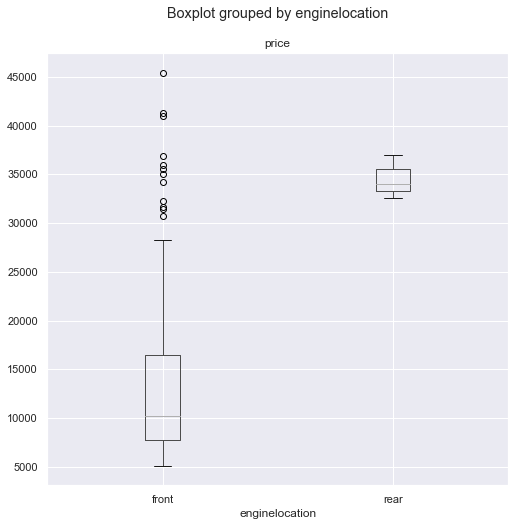

In [156]:
#Lets see the Boxplot of CAR "Price" grouped by "enginelocation" feature
CAR.boxplot("price",by="enginelocation")

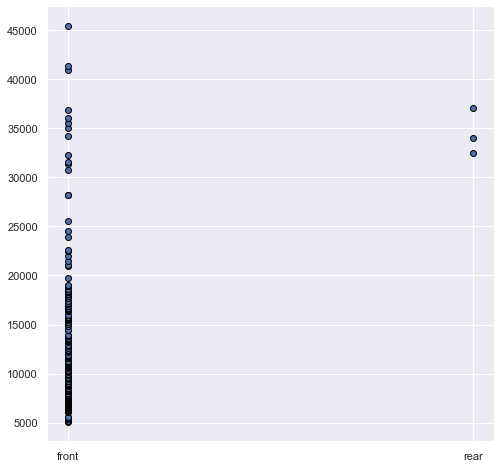

In [157]:
#"enginelocation" is Nominal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable
scatter(CAR['enginelocation'],CAR['price']) #Scatter plot

In [158]:
#Shows the frequency of each unique Entry/Element/Category of "enginelocation" Column
CAR.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [159]:
#There Should Be No Outliers for the Continuous Variable ie "DEBTINC" for each category of the "DEFAULTER" variable
#Continuous Variable Should be approximately normally distributed for each category of the "DEFAULTER" variable
#Continuous Variable Should have equal Variances for Each Category of the "DEFAULTER" variable
EngineLocation=CAR["enginelocation"].replace({'front':1,'rear':0})
stat,pvalue=pointbiserialr(EngineLocation, CAR['price'])
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): price and enginelocation have some form of relationship.")
else:
    print("Null Hypothesis (H0) : price and enginelocation are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#"enginelocation" is Dichotomous Nominal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable

#To find Correlation between "Price" & "enginelocation" we will Perform Mann Whiteny U Test
#It is Non Parametric Version of Independent 2 Sample T-test
#Correlation between CAR "Price" & CAR "aspiration"

#Lets do Mann Whiteny U Test First
from scipy.stats import mannwhitneyu

#Sampling of "Price" for each category of "enginelocation"
front=CAR[CAR.enginelocation=='front']
rear=CAR[CAR.enginelocation=='rear']

stat,pvalue=mannwhitneyu(front.price,rear.price)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and enginelocation have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and enginelocation are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "enginelocation" we will Perform Kruskal Wallis H Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between CAR "Price" & CAR "enginelocation"
from scipy.stats import kruskal

#Each Sample Must have at least 5 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
stat,pvalue=kruskal(front.price,rear.price)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and enginelocation have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and enginelocation are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "enginelocation" we will Perform Moods Median Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between CAR "Price" & CAR "enginelocation"
#Each Sample Must have at least 1 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
from scipy.stats import median_test
stat,pvalue,GrandMedian,ContigTable=median_test(front.price,rear.price)
print(GrandMedian)
print(ContigTable)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and enginelocation have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and enginelocation are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "enginelocation" we will Perform Spearman Rank Correlation
#Correlation between Rank of "Price" & Rank of "enginelocation"
#Distribution of Ranking Squared Differences
#Spearman Rank Correlation is not much efficient here due to lots of Tied Rank Scores in "enginelocation"
#The Magnitude of Each Variable doesnt really matter
#The only thing that we care about the Rank of Each Variable
#The Manual Binning of "Price" for each category of "enginelocation"
#The Manual Ranking of "Price" & "enginelocation"
TotalPrice=[2618141,103584]
MeanPrice=[12961,34528]
Enginelocation=['front','rear']
EnginelocationFreq=[202,3]

correlation,pvalue = spearmanr(TotalPrice,EnginelocationFreq)
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and enginelocation have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and enginelocation have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "enginelocation"
#To find Correlation between "Price" & "enginelocation" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "enginelocation"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
from scipy.stats import kendalltau
correlation,pvalue = kendalltau(TotalPrice,EnginelocationFreq)
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and enginelocation have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and enginelocation have no non linear relationship")

#To find Correlation between "Price" & "fueltype" we will Perform Wilcoxon Rank Sum Test
#It is Non Parametric Version of independent 2 sample T test
#Correlation between CAR "Price" & CAR "fueltype"
#Each Sample Must have at least 1 measurements
#Only two samples work for this test
#The samples are not required to have the same length
correlation,pvalue = ranksums(std.price,turbo.price)
print("Wilcoxon Rank Sum correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and enginelocation have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and enginelocation have no non linear relationship")

Null Hypothesis (H0) : price and enginelocation are independent of each other.
Confidence Level : nan %
Statistics=nan, p=nan
Alternate Hypothesis (H1): Price and enginelocation have some form of relationship.
Confidence Level : 99.72783771626278 %
Statistics=19.000, p=0.003
Alternate Hypothesis (H1): Price and enginelocation have some form of relationship.
Confidence Level : 99.46383571888818 %
Statistics=7.753, p=0.005
10295.0
[[ 99   3]
 [103   0]]
Null Hypothesis (H0) : Price and enginelocation are independent of each other.
Confidence Level : 75.87101577090468 %
Statistics=1.373, p=0.241
Spearmans correlation coefficient:1.000
nan
Confidence Level : nan %
Null Hypothesis (H0)- price and enginelocation have no non linear relationship
Kendall's Rank correlation coefficient:1.000
1.0
Confidence Level : 0.0 %
Null Hypothesis (H0)- price and enginelocation have no non linear relationship
Wilcoxon Rank Sum correlation coefficient:-4.413
1.0203309293514567e-05
Confidence Level : 99.99897

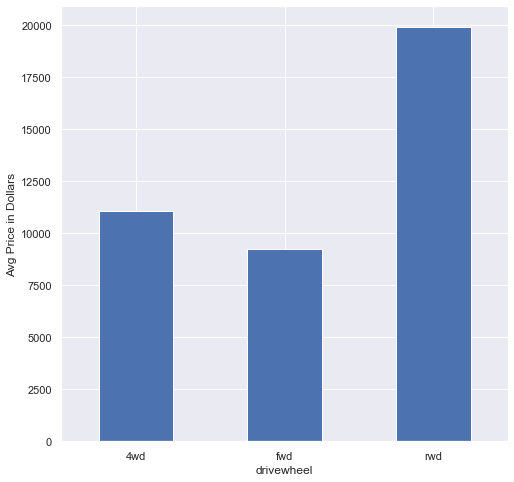

In [160]:
#Measures of Association between CAR "Price" & CAR "drivewheel"
#Let's see the average price of automobile/CarModel in each category of "drivewheel" feature
#groupby() will be applied to "drivewheel" & mean() will be applied to "price" as per gropby() of "drivewheel"
CAR[['drivewheel','price']].groupby("drivewheel").mean().plot(kind='bar',legend = False).set(xlabel='drivewheel', ylabel='Avg Price in Dollars')
xticks(rotation = 0) # 0 degree Horizontal alignment of "drivewheel" category names
show() # Average price of car is highest for drivewheel(rwd) & lowest for drivewheel(fwd) in "drivewheel" category.
#There is significant impact of CAR "price" change with respect to CAR "drivewheel" feature
#So CAR "price" is CAR "drivewheel" feature sensitive

In [161]:
# Let's see the average price of automobile/CarModel in each category of "drivewheel" feature
# groupby() will be applied to "drivewheel" & mean() will be applied to "price" as per gropby() of "drivewheel"
# There is Significant Differences in the Average Price of CAR in each category of "drivewheel" feature
CAR.price.groupby(CAR.drivewheel).mean()

drivewheel
4wd    11087.463000
fwd     9239.308333
rwd    19910.809211
Name: price, dtype: float64

In [162]:
# Let's see the total price of automobile/CarModel in each category of "drivewheel" feature
# groupby() will be applied to "drivewheel" & sum() will be applied to "price" as per gropby() of "drivewheel"
# There is Significant Differences in the Total Price of CAR in each category of "drivewheel" feature
CAR.price.groupby(CAR.drivewheel).sum()

drivewheel
4wd      99787.167
fwd    1108717.000
rwd    1513221.500
Name: price, dtype: float64

<AxesSubplot:title={'center':'price'}, xlabel='drivewheel'>

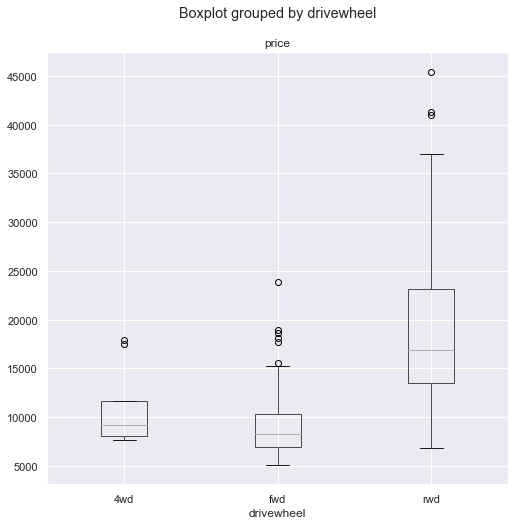

In [163]:
#Lets see the Boxplot of CAR "Price" grouped by "drivewheel" feature
CAR.boxplot("price",by="drivewheel")

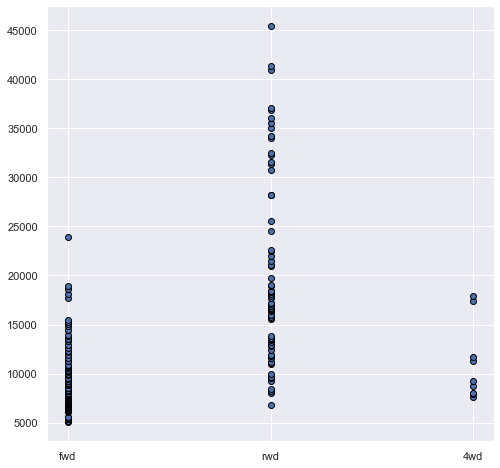

In [164]:
#"drivewheel" is Nominal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable
scatter(CAR['drivewheel'],CAR['price'],edgecolor='black') #Scatter plot

In [165]:
#Shows the frequency of each unique Entry/Element/Category of "drivewheel" Column
CAR.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [166]:
#"drivewheel" is Nominal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable

#To find Correlation between "Price" & "drivewheel" we will Perform Kruskal Wallis H Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between CAR "Price" & CAR "drivewheel"
from scipy.stats import kruskal

#Sampling of "Price" for each category of "drivewheel"
fourwd=CAR[CAR.drivewheel=='4wd']
rwd=CAR[CAR.drivewheel=='rwd']
fwd=CAR[CAR.drivewheel=='fwd']

#Each Sample Must have at least 5 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
stat,pvalue=kruskal(fourwd.price,rwd.price,fwd.price)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and drivewheel have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and drivewheel are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "drivewheel" we will Perform Moods Median Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between CAR "Price" & CAR "drivewheel"
#Each Sample Must have at least 1 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
from scipy.stats import median_test

stat,pvalue,GrandMedian,ContigTable=median_test(fourwd.price,rwd.price,fwd.price)
print(GrandMedian)
print(ContigTable)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and drivewheel have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and drivewheel are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "drivewheel" we will Perform Spearman Rank Correlation
#Correlation between Rank of "Price" & Rank of "drivewheel"
#Distribution of Ranking Squared Differences
#Spearman Rank Correlation is not much efficient here due to lots of Tied Rank Scores in "drivewheel"
#The Magnitude of Each Variable doesnt really matter
#The only thing that we care about the Rank of Each Variable
#The Manual Binning of "Price" for each category of "drivewheel"
#The Manual Ranking of "Price" & "drivewheel"
TotalPrice=[99787,1108717,1513221]
MeanPrice=[11087,9239,19910]
Drivewheel=['4wd','fwd','rwd']
DrivewheelFreq=[9,120,76]

correlation,pvalue = spearmanr(TotalPrice,DrivewheelFreq)
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and drivewheel have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and drivewheel have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "drivewheel"
#To find Correlation between "Price" & "drivewheel" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "drivewheel"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
from scipy.stats import kendalltau
correlation,pvalue = kendalltau(TotalPrice,DrivewheelFreq)
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and drivewheel have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and drivewheel have no non linear relationship")


Alternate Hypothesis (H1): Price and drivewheel have some form of relationship.
Confidence Level : 100.0 %
Statistics=95.024, p=0.000
10295.0
[[ 4 68 30]
 [ 5  8 90]]
Alternate Hypothesis (H1): Price and drivewheel have some form of relationship.
Confidence Level : 100.0 %
Statistics=77.476, p=0.000
Spearmans correlation coefficient:0.500
0.6666666666666667
Confidence Level : 33.33333333333333 %
Null Hypothesis (H0)- price and drivewheel have no non linear relationship
Kendall's Rank correlation coefficient:0.333
1.0
Confidence Level : 0.0 %
Null Hypothesis (H0)- price and drivewheel have no non linear relationship


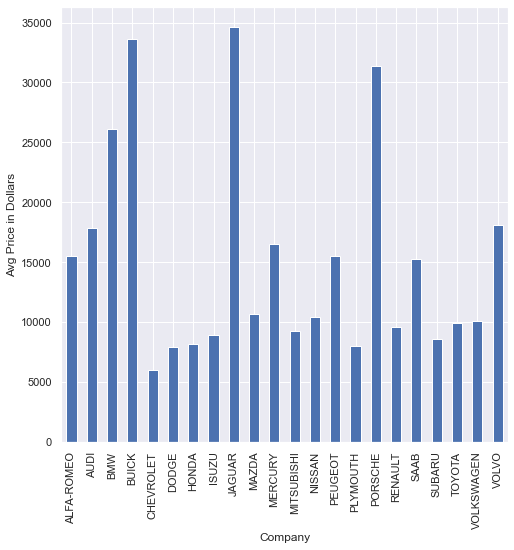

In [167]:
#Measures of Association between CAR "Price" & CAR "Company"
#Let's see the average price of automobile/CarModel in each category of "Company" feature
#groupby() will be applied to "Company" & mean() will be applied to "price" as per gropby() of "Company"
CAR[['Company','price']].groupby("Company").mean().plot(kind='bar',legend = False).set(xlabel='Company', ylabel='Avg Price in Dollars')
xticks(rotation = 90) # 90 degree Vertical alignment of "Company" category names
show() # Average price of car is higher for Company(JAGUAR,BUICK,PORSCHE) & lower for Company(fwd) in "Company" category.
#There is significant impact of CAR "price" change with respect to CAR "Company" feature
#So CAR "price" is CAR "Company" feature sensitive

In [168]:
# Let's see the average price of automobile/CarModel in each category of "Company" feature
# groupby() will be applied to "Company" & mean() will be applied to "price" as per gropby() of "Company"
# There is Significant Differences in the Average Price of CAR in each category of "Company" feature
CAR.price.groupby(CAR.Company).mean()

Company
ALFA-ROMEO    15498.333333
AUDI          17859.166714
BMW           26118.750000
BUICK         33647.000000
CHEVROLET      6007.000000
DODGE          7875.444444
HONDA          8184.692308
ISUZU          8916.500000
JAGUAR        34600.000000
MAZDA         10652.882353
MERCURY       16503.000000
MITSUBISHI     9239.769231
NISSAN        10415.666667
PEUGEOT       15489.090909
PLYMOUTH       7963.428571
PORSCHE       31400.500000
RENAULT        9595.000000
SAAB          15223.333333
SUBARU         8541.250000
TOYOTA         9885.812500
VOLKSWAGEN    10077.500000
VOLVO         18063.181818
Name: price, dtype: float64

In [169]:
# Let's see the total price of automobile/CarModel in each category of "Company" feature
# groupby() will be applied to "Company" & sum() will be applied to "price" as per gropby() of "Company"
# There is Significant Differences in the Total Price of CAR in each category of "Company" feature
CAR.price.groupby(CAR.Company).sum()

Company
ALFA-ROMEO     46495.000
AUDI          125014.167
BMW           208950.000
BUICK         269176.000
CHEVROLET      18021.000
DODGE          70879.000
HONDA         106401.000
ISUZU          35666.000
JAGUAR        103800.000
MAZDA         181099.000
MERCURY        16503.000
MITSUBISHI    120117.000
NISSAN        187482.000
PEUGEOT       170380.000
PLYMOUTH       55744.000
PORSCHE       157002.500
RENAULT        19190.000
SAAB           91340.000
SUBARU        102495.000
TOYOTA        316346.000
VOLKSWAGEN    120930.000
VOLVO         198695.000
Name: price, dtype: float64

<AxesSubplot:title={'center':'price'}, xlabel='Company'>

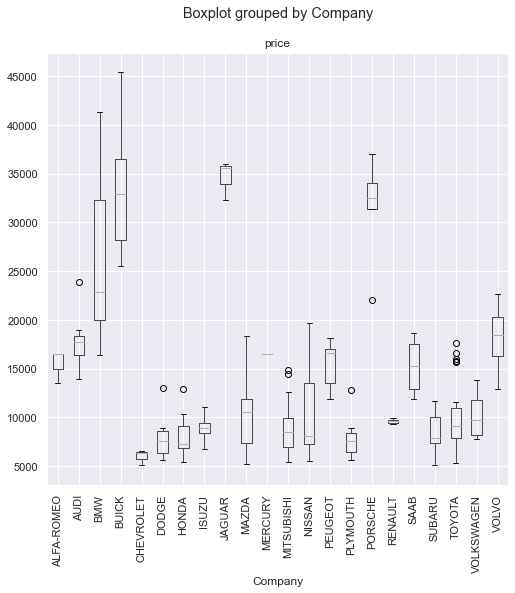

In [170]:
#Lets see the Boxplot of CAR "Price" grouped by "Company" feature
CAR.boxplot("price",by="Company",rot=90)

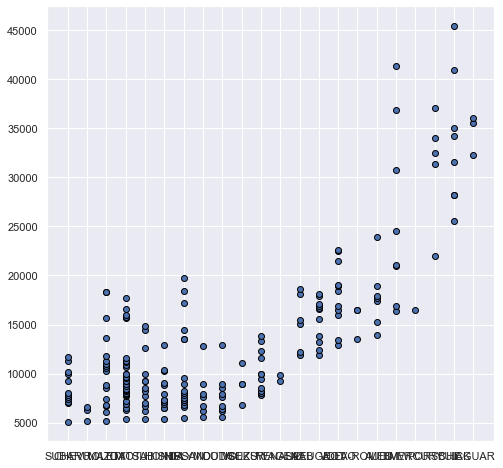

In [171]:
#"Company" is Nominal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable
scatter(CAR['Company'],CAR['price'],edgecolor='black') #Scatter plot

In [172]:
#Shows the frequency of each unique Entry/Element/Category of "Company" Column
CAR.Company.value_counts()

TOYOTA        32
NISSAN        18
MAZDA         17
MITSUBISHI    13
HONDA         13
SUBARU        12
VOLKSWAGEN    12
PEUGEOT       11
VOLVO         11
DODGE          9
BMW            8
BUICK          8
PLYMOUTH       7
AUDI           7
SAAB           6
PORSCHE        5
ISUZU          4
JAGUAR         3
ALFA-ROMEO     3
CHEVROLET      3
RENAULT        2
MERCURY        1
Name: Company, dtype: int64

In [173]:
#"Company" is Nominal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable

#To find Correlation between "Price" & "Company" we will Perform Kruskal Wallis H Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between CAR "Price" & CAR "Company"
from scipy.stats import kruskal

#Sampling of "Price" for each category of "Company"
TOYOTA=CAR[CAR.Company=='TOYOTA']
NISSAN=CAR[CAR.Company=='NISSAN']
MAZDA=CAR[CAR.Company=='MAZDA']
HONDA=CAR[CAR.Company=='HONDA']
MITSUBISHI=CAR[CAR.Company=='MITSUBISHI']
SUBARU=CAR[CAR.Company=='SUBARU']
VOLKSWAGEN=CAR[CAR.Company=='VOLKSWAGEN']
PEUGEOT=CAR[CAR.Company=='PEUGEOT']
VOLVO=CAR[CAR.Company=='VOLVO']
DODGE=CAR[CAR.Company=='DODGE']
BMW=CAR[CAR.Company=='BMW']
BUICK=CAR[CAR.Company=='BUICK']
AUDI=CAR[CAR.Company=='AUDI']
PLYMOUTH=CAR[CAR.Company=='PLYMOUTH']
SAAB=CAR[CAR.Company=='SAAB']
PORSCHE=CAR[CAR.Company=='PORSCHE']
ISUZU=CAR[CAR.Company=='ISUZU']
CHEVROLET=CAR[CAR.Company=='CHEVROLET']
ALFAROMEO=CAR[CAR.Company=='ALFA-ROMEO']
JAGUAR=CAR[CAR.Company=='JAGUAR']
RENAULT=CAR[CAR.Company=='RENAULT']
MERCURY=CAR[CAR.Company=='MERCURY']

#Each Sample Must have at least 5 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
stat,pvalue=kruskal(TOYOTA.price,NISSAN.price,MAZDA.price,HONDA.price,MITSUBISHI.price,SUBARU.price,VOLKSWAGEN.price,PEUGEOT.price,VOLVO.price,DODGE.price,BMW.price,
                    BUICK.price,AUDI.price,PLYMOUTH.price,SAAB.price,PORSCHE.price,ISUZU.price,CHEVROLET.price,ALFAROMEO.price,JAGUAR.price,RENAULT.price,MERCURY.price)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and Company have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and Company are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "Company" we will Perform Moods Median Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between CAR "Price" & CAR "Company"
#Each Sample Must have at least 1 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
from scipy.stats import median_test

stat,pvalue,GrandMedian,ContigTable=median_test(TOYOTA.price,NISSAN.price,MAZDA.price,HONDA.price,MITSUBISHI.price,SUBARU.price,VOLKSWAGEN.price,PEUGEOT.price,VOLVO.price,DODGE.price,BMW.price,
                    BUICK.price,AUDI.price,PLYMOUTH.price,SAAB.price,PORSCHE.price,ISUZU.price,CHEVROLET.price,ALFAROMEO.price,JAGUAR.price,RENAULT.price,MERCURY.price)
print(GrandMedian)
print(ContigTable)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Price and Company have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Price and Company are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Price" & "Company" we will Perform Spearman Rank Correlation
#Correlation between Rank of "Price" & Rank of "Company"
#Distribution of Ranking Squared Differences
#Spearman Rank Correlation is not much efficient here due to lots of Tied Rank Scores in "Company"
#The Magnitude of Each Variable doesnt really matter
#The only thing that we care about the Rank of Each Variable
#The Manual Binning of "Price" for each category of "Company"
#The Manual Ranking of "Price" & "Company"
TotalPrice=[46495,125014,208950,269176,18021,70879,106401,35666,103800,181099,16503,120117,187482,170380,55744,157002,19190,91340,102495,316346,120930,198695]
MeanPrice=[15498,17859,26118,33647,6007,7875,8184,8916,34600,10652,16503,9239,10415,15489,7963,31400,9595,15223,8541,9885,10077,18063]
Company=['ALFA-ROMEO','AUDI','BMW','BUICK','CHEVROLET','DODGE','HONDA','ISUZU','JAGUAR','MAZDA','MERCURY','MITSUBISHI','NISSAN','PEUGEOT','PLYMOUTH','PORSCHE','RENAULT','SAAB','SUBARU','TOYOTA','VOLKSWAGEN','VOLVO']
CompanyFreq=[3,7,8,8,3,9,13,4,3,17,1,13,18,11,7,5,2,6,12,32,12,11]

correlation,pvalue = spearmanr(TotalPrice,CompanyFreq)
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and Company have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and Company have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "Company"
#To find Correlation between "Price" & "Company" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "Company"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
from scipy.stats import kendalltau
correlation,pvalue = kendalltau(TotalPrice,CompanyFreq)
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and Company have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and Company have no non linear relationship")


Alternate Hypothesis (H1): Price and Company have some form of relationship.
Confidence Level : 100.0 %
Statistics=128.029, p=0.000
10295.0
[[10  6  9  2  3  2  4 11 11  1  8  8  7  1  6  5  1  0  3  3  0  1]
 [22 12  8 11 10 10  8  0  0  8  0  0  0  6  0  0  3  3  0  0  2  0]]
Alternate Hypothesis (H1): Price and Company have some form of relationship.
Confidence Level : 99.99999999982586 %
Statistics=101.239, p=0.000
Spearmans correlation coefficient:0.690
0.0003854107374949061
Confidence Level : 99.96145892625051 %
Alternate Hypothesis (H1) - price and Company have non linear relationship
Kendall's Rank correlation coefficient:0.524
0.0007594236517054847
Confidence Level : 99.92405763482945 %
Alternate Hypothesis (H1) - price and Company have non linear relationship


Text(0.5, 0, 'Continuous Variable')

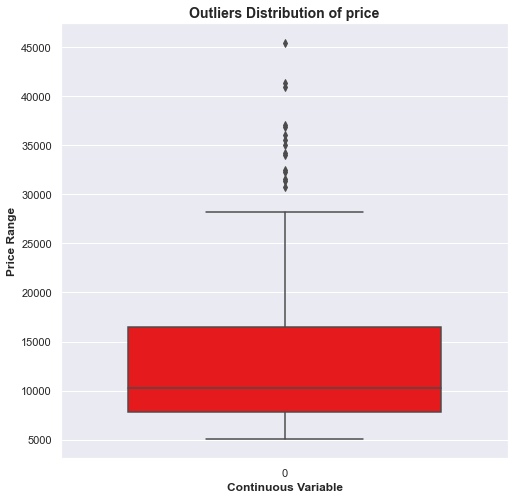

In [174]:
# Outlier Analysis of target variable CAR "price" with maximum amount of Inconsistency
rcParams['figure.figsize'] = [8,8]
boxplot(data=CAR["price"], orient="v", palette="Set1", whis=1.5, saturation=1, width=0.7)
title("Outliers Distribution of price", fontsize = 14, fontweight = 'bold')
ylabel("Price Range", fontweight = 'bold')
xlabel("Continuous Variable", fontweight = 'bold')

<AxesSubplot:title={'center':'CAR Price Distribution Plot'}, xlabel='price', ylabel='Frequency'>

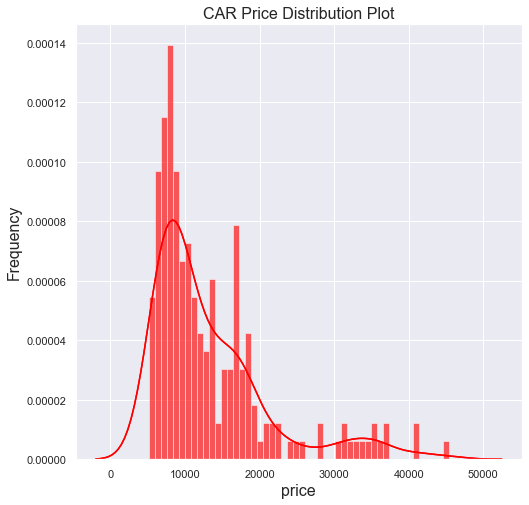

In [175]:
# See the distribution plot/histogram of "Price" Column
# Inference
# Mean and median of price are significantly different.
# Large standard deviation indicates that there is considerable variance in the prices of the automobiles.
# Price values are right-skewed, most cars are priced at the lower end (9000) of the price range.

figure(figsize=(8,8)) # Assign the Plotting Figure Size of 8 by 8
title('CAR Price Distribution Plot', fontsize=16) #Give the Distribution plot Name
xlabel('Price', fontsize=16) #Give name to the X-axis
ylabel('Frequency', fontsize=16) #Give name to the Y-axis
distplot(CAR['price'], color='red', bins=50)
distplot(CAR.price, color='red', bins=50)

Text(0, 0.5, 'Probability')

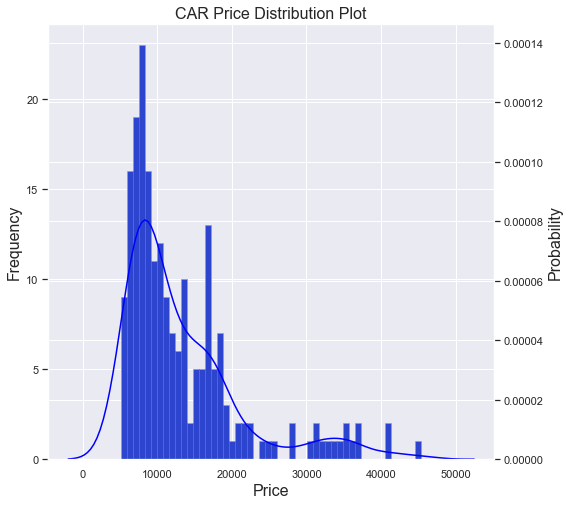

In [176]:
# See the histogram plot of plot of "Price" Column
# Inference
# Mean and median of price are significantly different.
# Large standard deviation indicates that there is considerable variance in the prices of the automobiles.
# Price values are right-skewed, most cars are priced at the lower end (9000) of the price range.
fig, ax = subplots(figsize=(8,8))
ax2 = ax.twinx()
ax.hist(CAR['price'], bins=50)
ax2.hist(CAR['price'], bins=50, density=True)
distplot(CAR['price'], hist_kws=dict(edgecolor="red", linewidth=1), color='Blue', bins=50)
title('CAR Price Distribution Plot', fontsize=16) #Give the Distribution plot Name
ax.set_xlabel('Price', fontsize=16) #Give name to the X-axis
ax.set_ylabel('Frequency',fontsize=16)
ax2.set_ylabel('Probability',fontsize=16)

In [177]:
CAR['price'].describe() #It prints the statistics of the data file
CAR.price.describe()    #This shows the statistical informations of numerical cols only
                        #Only numeric cols have been taken into account

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [178]:
#New Feature Column Creation So that I can remove "Company" & "CarModel" Feature Column from My DataFrame
CAR['PriceCategory'] = CAR['price'].apply(lambda x : "Economy" if x < 15188 
                                                     else ("Standard" if 15188 <= x < 25258
                                                           else "Premium" if 25258 <= x < 35328
                                                                else "Luxuary"))

D:\D Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [179]:
# Rearrange the order of CAR DataFrame columns/serieses
# "PriceCategory" this column will be plced After "price" Column
# Just assign the Column Names in the Order you want them
CAR=CAR[['price', 'PriceCategory', 'InsuranceRisk', 'Company', 'CarModel', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'compressionratio',
       'horsepower', 'CityMileage', 'HighwayMileage']]
CAR

price PriceCategory  InsuranceRisk     Company  \
0     5118.000       Economy              2      SUBARU   
1     5151.000       Economy              2   CHEVROLET   
2     5195.000       Economy              1       MAZDA   
3     5348.000       Economy              1      TOYOTA   
4     5389.000       Economy              2  MITSUBISHI   
5     5399.000       Economy              1       HONDA   
6     5499.000       Economy              1      NISSAN   
7     5572.000       Economy              1    PLYMOUTH   
8     5572.000       Economy              1       DODGE   
9     6095.000       Economy              1       MAZDA   
10    6189.000       Economy              2  MITSUBISHI   
11    6229.000       Economy              1       DODGE   
12    6229.000       Economy              1    PLYMOUTH   
13    6295.000       Economy              1   CHEVROLET   
14    6338.000       Economy              1      TOYOTA   
15    6377.000       Economy              1       DODGE   
16    6479.000       Economy              2       HONDA   
17    6488.000       Economy              1      TOYOTA   
18    6529.000       Economy              1       HONDA   
19    6575.000       Economy              0   CHEVROLET   
20    6649.000       Economy              1      NISSAN   
21    6669.000       Economy              2  MITSUBISHI   
22    6692.000       Economy              1       DODGE   
23    6692.000       Economy              1    PLYMOUTH   
24    6695.000       Economy              1       MAZDA   
25    6785.000       Economy              0       ISUZU   
26    6795.000       Economy              1       MAZDA   
27    6849.000       Economy              1      NISSAN   
28    6855.000       Economy              2       HONDA   
29    6918.000       Economy              0      TOYOTA   
30    6938.000       Economy              0      TOYOTA   
31    6989.000       Economy              1  MITSUBISHI   
32    7053.000       Economy              2      SUBARU   
33    7099.000       Economy              1      NISSAN   
34    7126.000       Economy              0      SUBARU   
35    7129.000       Economy              1       HONDA   
36    7198.000       Economy              0      TOYOTA   
37    7295.000       Economy              0       HONDA   
38    7295.000       Economy              0       HONDA   
39    7299.000       Economy              1      NISSAN   
40    7349.000       Economy              1      NISSAN   
41    7395.000       Economy              1       MAZDA   
42    7463.000       Economy              0      SUBARU   
43    7499.000       Economy              1      NISSAN   
44    7603.000       Economy              2      SUBARU   
45    7609.000       Economy              1       DODGE   
46    7609.000       Economy              1    PLYMOUTH   
47    7689.000       Economy              1  MITSUBISHI   
48    7738.000       Economy              0      TOYOTA   
49    7775.000       Economy              0      SUBARU   
50    7775.000       Economy              2  VOLKSWAGEN   
51    7788.000       Economy              0      TOYOTA   
52    7799.000       Economy              1      NISSAN   
53    7895.000       Economy              0       HONDA   
54    7898.000       Economy              0      TOYOTA   
55    7898.000       Economy              0      TOYOTA   
56    7957.000       Economy              1    PLYMOUTH   
57    7957.000       Economy              1       DODGE   
58    7975.000       Economy              2  VOLKSWAGEN   
59    7995.000       Economy              2  VOLKSWAGEN   
60    7999.000       Economy              1      NISSAN   
61    8013.000       Economy              0      SUBARU   
62    8058.000       Economy              1      TOYOTA   
63    8189.000       Economy              1  MITSUBISHI   
64    8195.000       Economy              2  VOLKSWAGEN   
65    8238.000       Economy              1      TOYOTA   
66    8249.000       Economy              2      NISSAN 

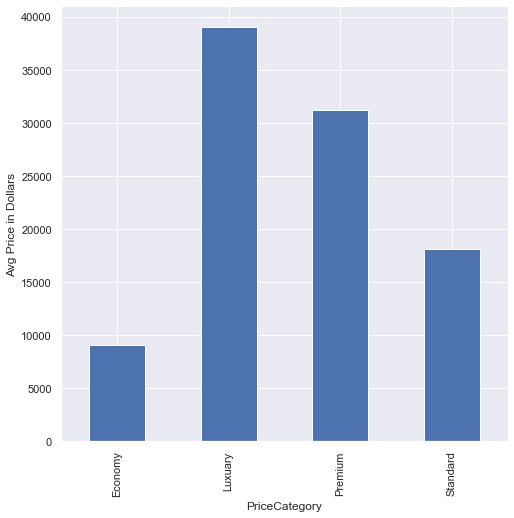

In [180]:
#Measures of Association between CAR "Price" & CAR "PriceCategory"
#Let's see the average price of automobile/CarModel in each category of "PriceCategory" feature
#groupby() will be applied to "PriceCategory" & mean() will be applied to "price" as per gropby() of "PriceCategory"
CAR[['PriceCategory','price']].groupby("PriceCategory").mean().plot(kind='bar',legend = False).set(xlabel='PriceCategory', ylabel='Avg Price in Dollars')
xticks(rotation = 90) # 90 degree Vertical alignment of "PriceCategory" category names
show() # Average price of car is highest for PriceCategory(Luxuary) & lowest for PriceCategory(Economy) in "PriceCategory" category.
#There is significant impact of CAR "price" change with respect to CAR "PriceCategory" feature
#So CAR "price" is CAR "PriceCategory" feature sensitive


In [181]:
# Let's see the average price of automobile/CarModel in each category of "PriceCategory" feature
# groupby() will be applied to "PriceCategory" & mean() will be applied to "price" as per gropby() of "PriceCategory"
# There is Significant Differences in the Average Price of CAR in each category of "PriceCategory" feature
CAR.price.groupby(CAR.PriceCategory).mean()

PriceCategory
Economy      9080.274648
Luxuary     39019.000000
Premium     31252.954545
Standard    18120.248156
Name: price, dtype: float64

In [182]:
# Let's see the total price of automobile/CarModel in each category of "PriceCategory" feature
# groupby() will be applied to "PriceCategory" & sum() will be applied to "price" as per gropby() of "PriceCategory"
# There is Significant Differences in the Total Price of CAR in each category of "PriceCategory" feature
CAR.price.groupby(CAR.PriceCategory).sum()

PriceCategory
Economy     1289399.000
Luxuary      273133.000
Premium      343782.500
Standard     815411.167
Name: price, dtype: float64

<AxesSubplot:title={'center':'price'}, xlabel='PriceCategory'>

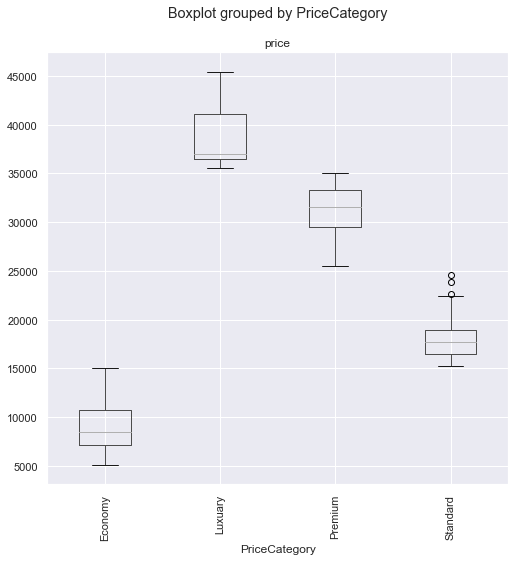

In [183]:
#Lets see the Boxplot of CAR "Price" grouped by "PriceCategory" feature
CAR.boxplot("price",by="PriceCategory",rot=90)

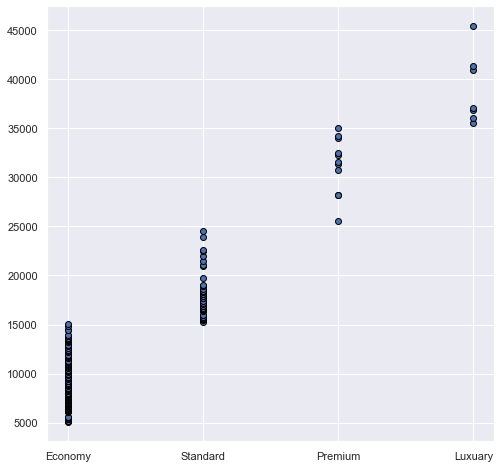

In [184]:
#"PriceCategory" is Ordinal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable
scatter(CAR['PriceCategory'],CAR['price'],edgecolor='black') #Scatter plot

In [185]:
#Shows the frequency of each unique Entry/Element/Category of "PriceCategory" Column
CAR.PriceCategory.value_counts()

Economy     142
Standard     45
Premium      11
Luxuary       7
Name: PriceCategory, dtype: int64

In [186]:
#"PriceCategory" is Ordinal(Categorical) Independent Variable
#"Price" is Continuous(Ratio Scale) Dependent Variable

#To find Correlation between "Price" & "PriceCategory" we will Perform Spearman Rank Correlation
#Correlation between Rank of "Price" & Rank of "PriceCategory"
#Distribution of Ranking Squared Differences
#Spearman Rank Correlation is not much efficient here due to lots of Tied Rank Scores in "PriceCategory"
#The Magnitude of Each Variable doesnt really matter
#The only thing that we care about the Rank of Each Variable
#The Manual Binning of "Price" for each category of "PriceCategory"
#The Manual Ranking of "Price" & "PriceCategory"
TotalPrice=[1289399,815411,343782,273133]
MeanPrice=[9080,18120,31252,39019]
RankedMeanPrice=[1,2,3,4]
PriceCategory=["Economy","Standard","Premium","Luxuary"]
RankedPriceCategory=[1,2,3,4]

correlation,pvalue = spearmanr(RankedMeanPrice,RankedPriceCategory)
print('Spearmans correlation coefficient:%.3f' % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and PriceCategory have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and PriceCategory have no non linear relationship")
    
#We will Perform Kendall's Rank Correlation due to lots of Tied Rank Scores in "PriceCategory"
#To find Correlation between "Price" & "PriceCategory" we will Perform Kendall's Rank Correlation
#Correlation between Rank of "Price" & Rank of "PriceCategory"
#Kendall's Tau=(Concordant-Discordant/Concordant+Discordant)
from scipy.stats import kendalltau
correlation,pvalue = kendalltau(RankedMeanPrice,RankedPriceCategory)
print("Kendall's Rank correlation coefficient:%.3f" % correlation)
print(pvalue)
print("Confidence Level : {} %".format(((1- pvalue)*100)))
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1) - price and PriceCategory have non linear relationship")
else:
    print("Null Hypothesis (H0)- price and PriceCategory have no non linear relationship")
    
#Detailed Test
PriceCategory=CAR["PriceCategory"].replace({'Economy':1,'Standard':2,'Premium':3,'Luxuary':4})
linregress(CAR['price'], PriceCategory)

Spearmans correlation coefficient:1.000
0.0
Confidence Level : 100.0 %
Alternate Hypothesis (H1) - price and PriceCategory have non linear relationship
Kendall's Rank correlation coefficient:1.000
0.08333333333333333
Confidence Level : 91.66666666666666 %
Null Hypothesis (H0)- price and PriceCategory have no non linear relationship


LinregressResult(slope=8.863721987142198e-05, intercept=0.25245757865574814, rvalue=0.9463159911037698, pvalue=1.6061669050938758e-101, stderr=2.1250104650687276e-06)

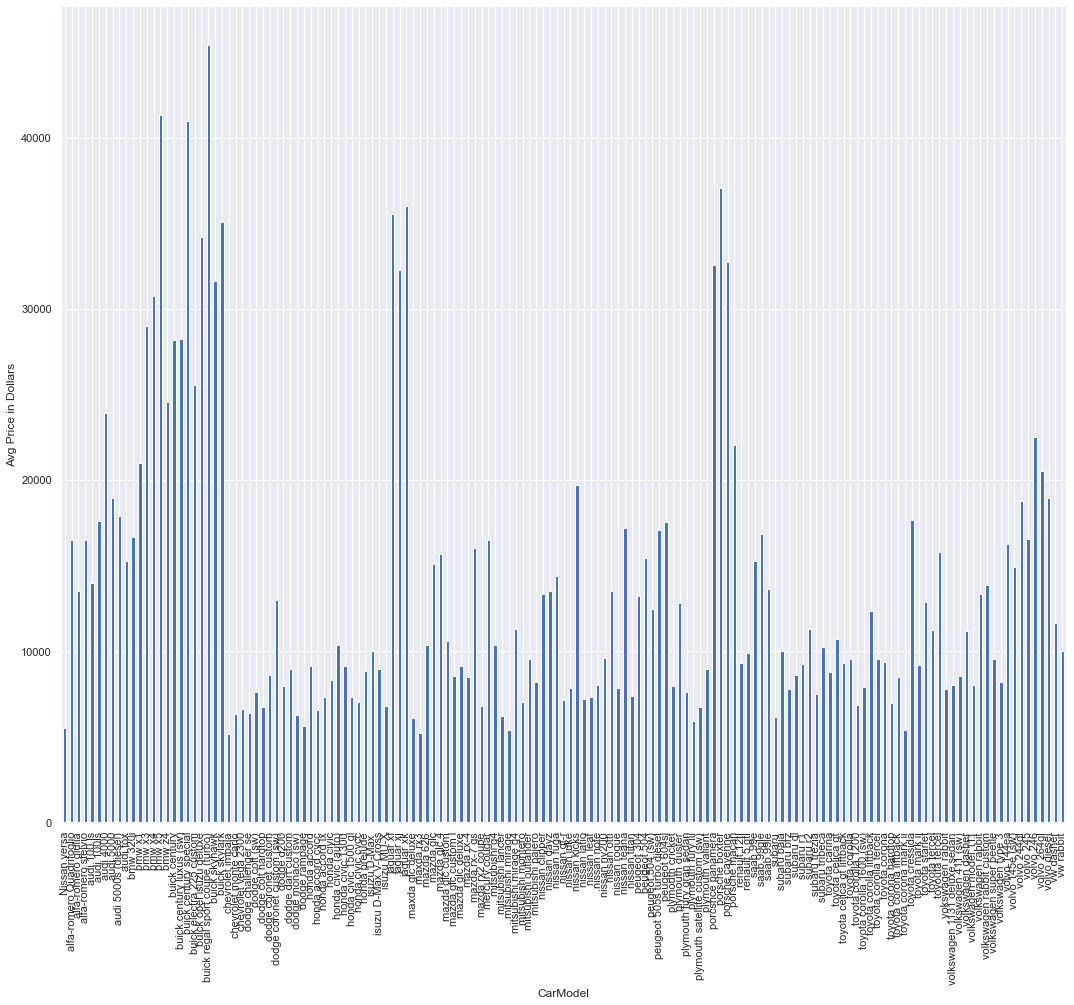

In [187]:
#Measures of Association between CAR "Price" & CAR "CarModel"
#Let's see the average price of automobile/CarModel in each category of "CarModel" feature
#groupby() will be applied to "CarModel" & mean() will be applied to "price" as per gropby() of "CarName"
CAR[['CarModel','price']].groupby("CarModel").mean().plot(kind='bar',legend = False, figsize = (18,15)).set(xlabel='CarModel', ylabel='Avg Price in Dollars')
xticks(rotation = 90) # 90 degree Vertical alignment of "CarModel" category names
show() # Average price of car is highest for CarModel(buick regal sport coupe (turbo)) & lowest for CarModel(chevrolet impala) in "CarModel" category.
#There is no significant impact of CAR "price" change with respect to CAR "CarModel" feature
#So CAR "price" is not CAR "CarModel" feature sensitive
#There is no significant Association Between CAR "price" & CAR "CarModel"

In [188]:
# Let's see the average price of automobile/CarModel in each category of "CarModel" feature
# groupby() will be applied to "CarModel" & mean() will be applied to "price" as per gropby() of "CarModel"
# There is Significant Differences in the Average Price of CAR in each category of "CarModel" feature
CAR.price.groupby(CAR.CarModel).mean()

CarModel
Nissan versa                        5499.000000
alfa-romero Quadrifoglio           16500.000000
alfa-romero giulia                 13495.000000
alfa-romero stelvio                16500.000000
audi 100 ls                        13950.000000
audi 100ls                         17580.000000
audi 4000                          23875.000000
audi 5000                          18920.000000
audi 5000s (diesel)                17859.167000
audi fox                           15250.000000
bmw 320i                           16677.500000
bmw x1                             20970.000000
bmw x3                             28992.500000
bmw x4                             30760.000000
bmw x5                             41315.000000
bmw z4                             24565.000000
buick century                      28176.000000
buick century luxus (sw)           28248.000000
buick century special              40960.000000
buick electra 225 custom           25552.000000
buick opel isuzu deluxe        

In [189]:
# Let's see the total price of automobile/CarModel in each category of "CarModel" feature
# groupby() will be applied to "CarModel" & sum() will be applied to "price" as per gropby() of "CarModel"
# There is Significant Differences in the Total Price of CAR in each category of "CarModel" feature
CAR.price.groupby(CAR.CarModel).sum()

CarModel
Nissan versa                        5499.000
alfa-romero Quadrifoglio           16500.000
alfa-romero giulia                 13495.000
alfa-romero stelvio                16500.000
audi 100 ls                        13950.000
audi 100ls                         35160.000
audi 4000                          23875.000
audi 5000                          18920.000
audi 5000s (diesel)                17859.167
audi fox                           15250.000
bmw 320i                           33355.000
bmw x1                             20970.000
bmw x3                             57985.000
bmw x4                             30760.000
bmw x5                             41315.000
bmw z4                             24565.000
buick century                      28176.000
buick century luxus (sw)           28248.000
buick century special              40960.000
buick electra 225 custom           25552.000
buick opel isuzu deluxe            34184.000
buick regal sport coupe (turbo)    45400.000
b

# Removal/Selection of Categorical Features

In [190]:
#We will Straightaway Remove "InsuranceRisk", "doornumber", "enginelocation", "fueltype", "CarModel" & "PriceCategory" features from our DataFrame
CAR.drop(columns=["InsuranceRisk","doornumber","enginelocation","fueltype","CarModel"],axis=1,inplace=True)
CAR.columns

D:\D Program Files\Anaconda\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['price', 'PriceCategory', 'Company', 'aspiration', 'carbody',
       'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'compressionratio', 'horsepower',
       'CityMileage', 'HighwayMileage'],
      dtype='object')

In [191]:
# Shows the Unique Elements/Entries of "PriceCategory" Column
CAR["PriceCategory"].unique()

array(['Economy', 'Standard', 'Premium', 'Luxuary'], dtype=object)

In [192]:
# We will rename/replace the Unique Elements/Entries of "PriceCategory" Column
# As 'Economy' = 1, 'Standard' = 2, 'Premium' = 3, 'Luxuary' = 4
CAR["PriceCategory"].replace({'Economy':1,'Standard':2,'Premium':3,'Luxuary':4},inplace=True)

D:\D Program Files\Anaconda\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


<AxesSubplot:>

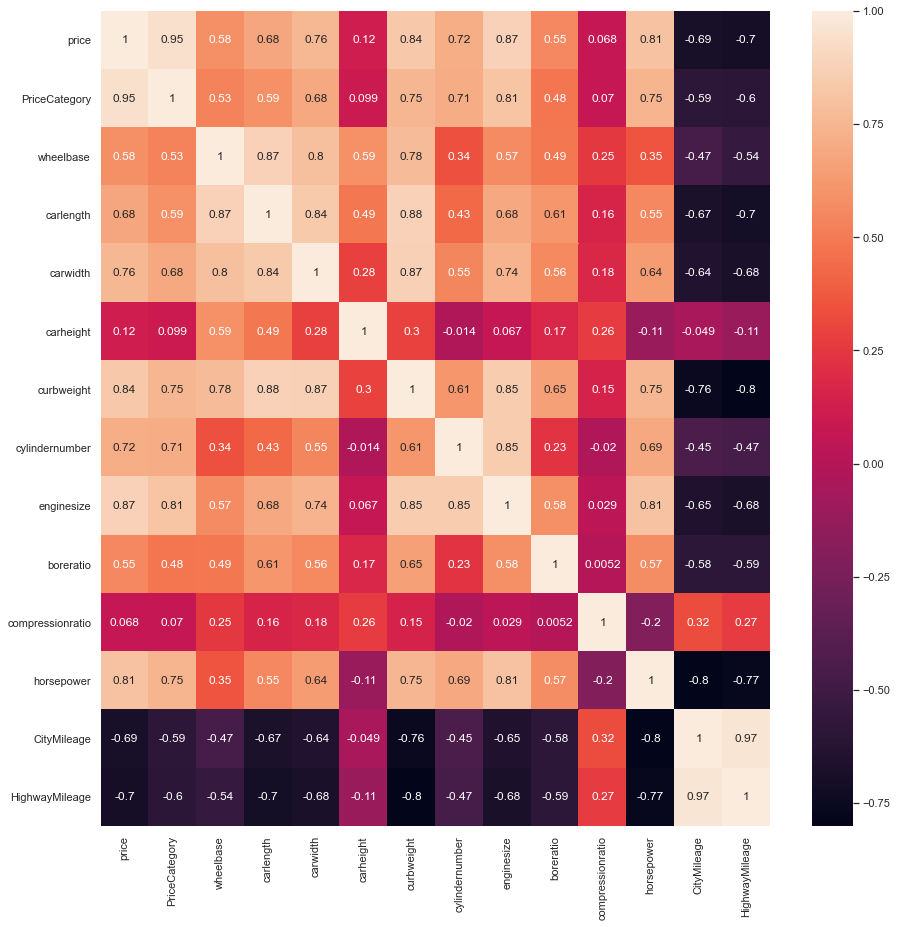

In [193]:
# Correlation plot by using heatmap
figure(figsize=(15,15)) # Assign the Plotting Figure Size of 8 by 8
heatmap(CAR.corr(), annot=True)

In [194]:
# Each Pair Combination of Feature & Label Correlation List
CAR.corr().price.sort_values(ascending=False)

price               1.000000
PriceCategory       0.946316
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
cylindernumber      0.718305
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
compressionratio    0.067984
CityMileage        -0.685751
HighwayMileage     -0.697599
Name: price, dtype: float64

In [195]:
#Displaying correlation among all the columns 
CAR.corr()

price  PriceCategory  wheelbase  carlength  carwidth  \
price             1.000000       0.946316   0.577816   0.682920  0.759325   
PriceCategory     0.946316       1.000000   0.534933   0.591556  0.684696   
wheelbase         0.577816       0.534933   1.000000   0.874587  0.795144   
carlength         0.682920       0.591556   0.874587   1.000000  0.841118   
carwidth          0.759325       0.684696   0.795144   0.841118  1.000000   
carheight         0.119336       0.098688   0.589435   0.491029  0.279210   
curbweight        0.835305       0.753248   0.776386   0.877728  0.867032   
cylindernumber    0.718305       0.706201   0.339507   0.430672  0.545007   
enginesize        0.874145       0.813651   0.569329   0.683360  0.735433   
boreratio         0.553173       0.479427   0.488750   0.606454  0.559150   
compressionratio  0.067984       0.070188   0.249786   0.158414  0.181129   
horsepower        0.808139       0.746589   0.353294   0.552623  0.640732   
CityMileage      -0.685751      -0.585105  -0.470414  -0.670909 -0.642704   
HighwayMileage   -0.697599      -0.595606  -0.544082  -0.704662 -0.677218   

                  carheight  curbweight  cylindernumber  enginesize  \
price              0.119336    0.835305        0.718305    0.874145   
PriceCategory      0.098688    0.753248        0.706201    0.813651   
wheelbase          0.589435    0.776386        0.339507    0.569329   
carlength          0.491029    0.877728        0.430672    0.683360   
carwidth           0.279210    0.867032        0.545007    0.735433   
carheight          1.000000    0.295572       -0.013995    0.067149   
curbweight         0.295572    1.000000        0.609727    0.850594   
cylindernumber    -0.013995    0.609727        1.000000    0.846031   
enginesize         0.067149    0.850594        0.846031    1.000000   
boreratio          0.171071    0.648480        0.231399    0.583774   
compressionratio   0.261214    0.151362       -0.020002    0.028971   
horsepower        -0.108802    0.750739        0.692016    0.809769   
CityMileage       -0.048640   -0.757414       -0.445837   -0.653658   
HighwayMileage    -0.107358   -0.797465       -0.466666   -0.677470   

                  boreratio  compressionratio  horsepower  CityMileage  \
price              0.553173          0.067984    0.808139    -0.685751   
PriceCategory      0.479427          0.070188    0.746589    -0.585105   
wheelbase          0.488750          0.249786    0.353294    -0.470414   
carlength          0.606454          0.158414    0.552623    -0.670909   
carwidth           0.559150          0.181129    0.640732    -0.642704   
carheight          0.171071          0.261214   -0.108802    -0.048640   
curbweight         0.648480          0.151362    0.750739    -0.757414   
cylindernumber     0.231399         -0.020002    0.692016    -0.445837   
enginesize         0.583774          0.028971    0.809769    -0.653658   
boreratio          1.000000          0.005197    0.573677    -0.584532   
compressionratio   0.005197          1.000000   -0.204326     0.324701   
horsepower         0.573677         -0.204326    1.000000    -0.801456   
CityMileage       -0.584532          0.324701   -0.801456     1.000000   
HighwayMileage    -0.587012          0.265201   -0.770544     0.971337   

                  HighwayMileage  
price                  -0.697599  
PriceCategory          -0.595606  
wheelbase              -0.544082  
carlength              -0.704662  
carwidth               -0.677218  
carheight              -0.107358  
curbweight             -0.797465  
cylindernumber         -0.466666  
enginesize             -0.677470  
boreratio              -0.587012  
compressionratio        0.265201  
horsepower             -0.770544  
CityMileage             0.971337  
HighwayMileage          1.000000

In [196]:
#We will Straightaway Remove "compressionratio" & "carheight" features from our DataFrame
CAR.drop(columns=["compressionratio","carheight"],axis=1,inplace=True)
CAR.columns

D:\D Program Files\Anaconda\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['price', 'PriceCategory', 'Company', 'aspiration', 'carbody',
       'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'horsepower', 'CityMileage', 'HighwayMileage'],
      dtype='object')

In [197]:
#Saving This CAR DataFrame into DataFile folder as CleanCar.csv file
CAR.to_csv(r'D:\Python Data\Anwesh Python\DataFile\CleanCar.csv', index=False)

In [210]:
CAR=read_csv("DataFile\\CleanCar.csv",sep=',',header='infer',na_values=None,keep_default_na=True,na_filter=True,index_col=None) #Write the file path & name inside ("")
CAR

price  PriceCategory     Company aspiration      carbody drivewheel  \
0     5118.000              1      SUBARU        std    hatchback        fwd   
1     5151.000              1   CHEVROLET        std    hatchback        fwd   
2     5195.000              1       MAZDA        std    hatchback        fwd   
3     5348.000              1      TOYOTA        std    hatchback        fwd   
4     5389.000              1  MITSUBISHI        std    hatchback        fwd   
5     5399.000              1       HONDA        std    hatchback        fwd   
6     5499.000              1      NISSAN        std        sedan        fwd   
7     5572.000              1    PLYMOUTH        std    hatchback        fwd   
8     5572.000              1       DODGE        std    hatchback        fwd   
9     6095.000              1       MAZDA        std    hatchback        fwd   
10    6189.000              1  MITSUBISHI        std    hatchback        fwd   
11    6229.000              1       DODGE        std    hatchback        fwd   
12    6229.000              1    PLYMOUTH        std    hatchback        fwd   
13    6295.000              1   CHEVROLET        std    hatchback        fwd   
14    6338.000              1      TOYOTA        std    hatchback        fwd   
15    6377.000              1       DODGE        std    hatchback        fwd   
16    6479.000              1       HONDA        std    hatchback        fwd   
17    6488.000              1      TOYOTA        std    hatchback        fwd   
18    6529.000              1       HONDA        std    hatchback        fwd   
19    6575.000              1   CHEVROLET        std        sedan        fwd   
20    6649.000              1      NISSAN        std        sedan        fwd   
21    6669.000              1  MITSUBISHI        std    hatchback        fwd   
22    6692.000              1       DODGE        std        sedan        fwd   
23    6692.000              1    PLYMOUTH        std        sedan        fwd   
24    6695.000              1       MAZDA        std        sedan        fwd   
25    6785.000              1       ISUZU        std        sedan        rwd   
26    6795.000              1       MAZDA        std    hatchback        fwd   
27    6849.000              1      NISSAN        std        sedan        fwd   
28    6855.000              1       HONDA        std    hatchback        fwd   
29    6918.000              1      TOYOTA        std        wagon        fwd   
30    6938.000              1      TOYOTA        std        sedan        fwd   
31    6989.000              1  MITSUBISHI        std        sedan        fwd   
32    7053.000              1      SUBARU        std    hatchback        fwd   
33    7099.000              1      NISSAN        std        sedan        fwd   
34    7126.000              1      SUBARU        std        sedan        fwd   
35    7129.000              1       HONDA        std    hatchback        fwd   
36    7198.000              1      TOYOTA        std    hatchback        fwd   
37    7295.000              1       HONDA        std        sedan        fwd   
38    7295.000              1       HONDA        std        wagon        fwd   
39    7299.000              1      NISSAN        std        sedan        fwd   
40    7349.000              1      NISSAN        std        wagon        fwd   
41    7395.000              1       MAZDA        std        sedan        fwd   
42    7463.000              1      SUBARU        std        wagon        fwd   
43    7499.000              1      NISSAN        std        sedan        fwd   
44    7603.000              1      SUBARU        std    hatchback        4wd   
45    7609.000              1       DODGE        std        sedan        fwd   
46    7609.000              1    PLYMOUTH        std        sedan        fwd   
47    7689.000              1  MITSUBISHI      turbo    hatchback        fwd   
48    7738.000              1      TOYOTA        std        sedan        fwd   
49    777

# HP-Category New Feature Creation

In [211]:
#New Feature Column Creation So that I can remove "Company" & "CarModel" Feature Column from My DataFrame
CAR['HP-Category'] = CAR['horsepower'].apply(lambda x : "Medium-HP" if x < 108 
                                                     else ("Standard-HP" if 108 <= x < 168
                                                           else "Heavy-HP" if 168 <= x < 228
                                                                else "Sports-HP"))

# Verify Skewness

In [212]:
CAR.skew()

price             1.777678
PriceCategory     1.874872
wheelbase         1.050214
carlength         0.155954
carwidth          0.904003
curbweight        0.681398
cylindernumber    2.817459
enginesize        1.947655
boreratio         0.020156
horsepower        1.405310
CityMileage       0.663704
HighwayMileage    0.539997
dtype: float64

# For Regression, Label should be in 2D and Features in 2D format
Assigning Label & Features

In [213]:
#DataFrame Separation for Encoding
#CAR1 will be 1D Series
#CAR2 & CAR3 will remain 2D DataFrame only
Label=CAR['price']
Continuous=CAR[['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','CityMileage','HighwayMileage']]
Ordinal=CAR[['cylindernumber','PriceCategory','HP-Category']]
Nominal=CAR[['Company','aspiration','carbody','drivewheel','enginetype','fuelsystem']]

# Encoding Technique

In [214]:
#You can Dummify 'string' value "Columns" only
#Dummy Encoding for Nominal Categorical Features "Company", "aspiration", "carbody", "drivewheel", "enginetype", "fuelsystem"
#CAR3 will remain DataFrame
Nominal=get_dummies(Nominal,drop_first=False)
Nominal.shape,type(Nominal),ndim(Nominal)

D:\D Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: scipy.ndim is deprecated and will be removed in SciPy 2.0.0, use numpy.ndim instead
  """


((205, 47), pandas.core.frame.DataFrame, 2)

In [215]:
# We will rename/replace the Unique Elements/Entries of "PriceCategory" Column
Ordinal["PriceCategory"].replace({1:'Economy',2:'Standard',3:'Premium',4:'Luxuary'},inplace=True)

# We will rename/replace the Unique Elements/Entries of "cylindernumber" Column
Ordinal["cylindernumber"].replace({2:'two',3:'three',4:'four',5:'five',6:'six',8:'eight',12:'twelve'},inplace=True)

D:\D Program Files\Anaconda\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [216]:
#Dummy Encoding for Ordinal Categorical Features "cylindernumber", "PriceCategory"
#Ordinal will remain 2D DataFrame
Ordinal=get_dummies(Ordinal,drop_first=False)
Ordinal.shape,type(Ordinal),ndim(Ordinal)

D:\D Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: scipy.ndim is deprecated and will be removed in SciPy 2.0.0, use numpy.ndim instead
  after removing the cwd from sys.path.


((205, 15), pandas.core.frame.DataFrame, 2)

In [217]:
Ordinal["cylindernumber_eight"].replace({1:8},inplace=True)
Ordinal["cylindernumber_five"].replace({1:5},inplace=True)
Ordinal["cylindernumber_four"].replace({1:4},inplace=True)
Ordinal["cylindernumber_six"].replace({1:6},inplace=True)
Ordinal["cylindernumber_three"].replace({1:3},inplace=True)
Ordinal["cylindernumber_twelve"].replace({1:12},inplace=True)
Ordinal["cylindernumber_two"].replace({1:2},inplace=True)
Ordinal["PriceCategory_Standard"].replace({1:2},inplace=True)
Ordinal["PriceCategory_Premium"].replace({1:3},inplace=True)
Ordinal["PriceCategory_Luxuary"].replace({1:4},inplace=True)
Ordinal["HP-Category_Heavy-HP"].replace({1:3},inplace=True)
Ordinal["HP-Category_Sports-HP"].replace({1:4},inplace=True)
Ordinal["HP-Category_Standard-HP"].replace({1:2},inplace=True)

In [218]:
# Continuous Feature Scaling(Scaling of features)
# Continuous Features will be in 2D Array
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
Continuous=StandardScaler.fit_transform(Continuous) #Scaling of Features part for optimisation

# Check data type and dimention
# While Converting into DataFrame always provide columns name
Continuous=DataFrame(Continuous,columns=['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','CityMileage','HighwayMileage']) #Converting Features into 2D DataFrame
type(Continuous),ndim(Continuous),Continuous.shape

D:\D Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: scipy.ndim is deprecated and will be removed in SciPy 2.0.0, use numpy.ndim instead
  # Remove the CWD from sys.path while we load stuff.


(pandas.core.frame.DataFrame, 2, (205, 8))

In [219]:
#Final ConCatination For Creating Features
#Features will be 2D DataFrame
Features=concat([Continuous,Ordinal,Nominal],axis=1)
Features

wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \
0    -0.841772  -1.393438 -1.171890   -0.973349   -0.719947   1.074252   
1    -1.724066  -2.677244 -2.620512   -2.055348   -1.586561  -1.553603   
2    -0.941655  -1.214681 -0.798053   -1.281391   -0.864383  -1.109459   
3    -0.508831  -1.247182 -1.078431   -1.098491   -0.840310  -1.035435   
4    -0.841772  -1.360937 -0.704593   -1.227484   -0.840310  -1.331531   
5    -0.841772  -1.954087 -0.891512   -1.383431   -1.153254  -1.553603   
6    -0.708596  -0.710909 -0.984972   -1.283317   -0.719947  -0.665314   
7    -0.841772  -1.360937 -0.984972   -1.227484   -0.888455  -1.331531   
8    -0.841772  -1.360937 -0.984972   -1.308345   -0.888455  -1.331531   
9    -0.941655  -1.214681 -0.798053   -1.262139   -0.864383  -1.109459   
10   -0.841772  -1.360937 -0.704593   -1.177427   -0.840310  -1.331531   
11   -0.841772  -1.360937 -0.984972   -1.133146   -0.888455  -1.331531   
12   -0.841772  -1.360937 -0.984972   -1.133146   -0.888455  -1.331531   
13   -0.708596  -1.474692 -1.078431   -1.312196   -0.888455  -1.109459   
14   -0.508831  -1.247182 -1.078431   -0.992601   -0.840310  -1.035435   
15   -0.841772  -1.360937 -0.984972   -1.308345   -0.888455  -1.331531   
16   -2.023713  -2.392856 -0.938242   -1.622164   -0.840310  -1.553603   
17   -0.508831  -1.247182 -1.078431   -1.040733   -0.840310  -1.035435   
18   -0.841772  -1.954087 -0.891512   -1.185128   -0.840310  -1.553603   
19   -0.708596  -1.239057 -1.078431   -1.244811   -0.888455  -1.109459   
20   -0.708596  -0.710909 -0.984972   -1.227484   -0.719947  -0.665314   
21   -0.841772  -1.360937 -0.704593   -1.061911   -0.840310  -1.331531   
22   -0.841772  -1.360937 -0.984972   -1.090790   -0.888455  -1.331531   
23   -0.841772  -0.548402 -0.984972   -1.090790   -0.888455  -1.331531   
24   -0.941655  -0.589028 -0.798053   -1.175502   -0.864383  -1.109459   
25   -0.741890  -0.272140 -1.919566   -0.420797   -0.382931  -0.073121   
26   -0.941655  -1.214681 -0.798053   -1.252512   -0.864383  -1.109459   
27   -0.708596  -0.710909 -0.984972   -1.188979   -0.719947  -0.665314   
28   -2.023713  -2.392856 -0.938242   -1.418085   -0.840310  -1.553603   
29   -0.508831  -0.353393 -1.078431   -0.530538   -0.840310  -1.035435   
30   -0.508831  -0.629655 -0.704593   -0.913666   -0.695874  -0.517266   
31   -0.408949  -0.134009 -0.237296   -0.366890   -0.118132   0.074927   
32   -0.841772  -1.312185 -1.078431   -0.838580   -0.455148   1.074252   
33   -0.708596  -0.710909 -0.984972   -1.036883   -0.575511  -1.257507   
34   -0.259126  -0.166510 -0.237296   -0.790449   -0.455148   1.074252   
35   -0.841772  -1.954087 -0.891512   -1.154324   -0.840310  -1.553603   
36   -0.508831  -0.629655 -0.704593   -0.859758   -0.695874  -0.517266   
37   -0.375655  -0.865290 -0.891512   -1.050359   -0.840310  -1.553603   
38   -0.375655  -1.377188 -0.938242   -1.023406   -0.840310  -1.516591   
39   -0.708596  -0.710909 -0.984972   -1.163950   -0.719947  -0.665314   
40   -0.708596  -0.312767 -0.984972   -1.023406   -0.719947  -0.665314   
41   -0.941655  -0.589028 -0.798053   -1.165875   -0.864383  -0.924398   
42   -0.292420  -0.044630 -0.237296   -0.511285   -0.455148   1.074252   
43   -0.708596  -0.710909 -0.984972   -1.125445   -0.719947  -0.665314   
44   -0.908360  -1.360937 -0.984972   -0.607548   -0.455148   1.074252   
45   -0.841772  -1.360937 -0.984972   -1.090790   -0.888455  -1.331531   
46   -0.841772  -0.548402 -0.984972   -0.701886   -0.695874  -1.331531   
47   -0.958302  -1.360937 -0.984972   -0.790449   -0.695874  -1.109459   
48   -0.508831  -0.629655 -0.704593   -0.888637   -0.695874  -0.517266   
49   -0.259126  -0.166510 -0.237296   -0.703812   -0.455148   1.074252   
50   -0.242478  -0.190886 -0.190566   -0.567118   -0.719947  -1.183483   
51   -0.508831  -0.629655 -0.704593   -0.540164   -0.407003  -0.221170   
52   -0.708596  -0.686533 -0.984972   -1.015705   -0.719947  -0.665314   
53   -0.3

In [220]:
#Due to lowest frequency we will drop these Categorical columns
Features.drop(columns=["fuelsystem_spfi","fuelsystem_mfi","enginetype_dohcv","Company_MERCURY","Company_ALFA-ROMEO","Company_CHEVROLET","cylindernumber_three"],axis=1,inplace=True)
Features.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'CityMileage', 'HighwayMileage', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'PriceCategory_Economy',
       'PriceCategory_Luxuary', 'PriceCategory_Premium',
       'PriceCategory_Standard', 'HP-Category_Heavy-HP',
       'HP-Category_Medium-HP', 'HP-Category_Sports-HP',
       'HP-Category_Standard-HP', 'Company_AUDI', 'Company_BMW',
       'Company_BUICK', 'Company_DODGE', 'Company_HONDA', 'Company_ISUZU',
       'Company_JAGUAR', 'Company_MAZDA', 'Company_MITSUBISHI',
       'Company_NISSAN', 'Company_PEUGEOT', 'Company_PLYMOUTH',
       'Company_PORSCHE', 'Company_RENAULT', 'Company_SAAB', 'Company_SUBARU',
       'Company_TOYOTA', 'Company_VOLKSWAGEN', 'Company_VOLVO',
       'aspiration_std', 'aspiration_turbo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback',

In [221]:
# For loop to check ideal sample that will give generalized model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
for i in range(1,10000):
    X_train,X_test,Y_train,Y_test = train_test_split(Features, Label, test_size=0.20, random_state=i)
    
    CARmodel=LinearRegression()
    
    CARmodel.fit(X_train,Y_train)
    
    train_score=CARmodel.score(X_train,Y_train)
    
    test_score=CARmodel.score(X_test,Y_test)
    
    if test_score > train_score:
        print("Test: {} Train: {} RandomState: {}".format(test_score,train_score,i))

Test: 0.9850264507550286 Train: 0.9800275540667801 RandomState: 6195


In [222]:
#Train Test Split, 80% Training Data & 20% Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(Features,Label,test_size=0.2,random_state=6195)

In [223]:
# Statistical Implementation of Linear Regression Model
# VIF & Multicolinearity finding
# Summary table from OLS Statsmodels of Linear Regression
# In Python's OLS, it is used for variance inflation factor calculation, does not add an intercept by default.
from statsmodels.api import *
Features_with_constant=add_constant(X_train)
CARmodel_Stat=OLS(Y_train,Features_with_constant)

In [224]:
# Here we will Check the Summary of Jpimodel
# All Features having P-value < 0.05
# All Features are Significant
Results=CARmodel_Stat.fit()
Results.params
print(Results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     98.48
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           4.21e-72
Time:                        18:14:27   Log-Likelihood:                -1383.0
No. Observations:                 164   AIC:                             2878.
Df Residuals:                     108   BIC:                             3052.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4

In [225]:
# We will drop these Categorical & Numeric columns/Features because they are not significant with the Model
# These Categorical & Numeric columns/Features having P-Value more than 0.05 so not significant
Features.drop(columns=["wheelbase",
                       "carlength","CityMileage","HighwayMileage",
                       "cylindernumber_eight","PriceCategory_Economy","Company_DODGE",
                       "Company_ISUZU","Company_JAGUAR","Company_MAZDA",
                      "Company_NISSAN","Company_RENAULT","Company_PEUGEOT","enginetype_rotor",
                      "Company_SUBARU","Company_VOLKSWAGEN","carbody_wagon",
                      "enginetype_ohc","fuelsystem_2bbl",
                      "fuelsystem_spdi","drivewheel_rwd","drivewheel_fwd","fuelsystem_4bbl",
                       "enginetype_ohcv","carbody_hatchback","Company_BUICK","cylindernumber_two",
                       "Company_PLYMOUTH","enginetype_dohc","enginetype_ohcf","Company_MITSUBISHI",
                       "boreratio","fuelsystem_idi","drivewheel_4wd","Company_VOLVO","carbody_sedan",
                      "aspiration_std","enginesize","cylindernumber_twelve","fuelsystem_1bbl",
                      "Company_HONDA","Company_SAAB","curbweight","cylindernumber_six",
                      "Company_AUDI","enginetype_l","HP-Category_Sports-HP","carbody_hardtop","Company_TOYOTA",
                      "HP-Category_Medium-HP","fuelsystem_mpfi"],axis=1,inplace=True)
Features.columns

Index(['carwidth', 'cylindernumber_five', 'cylindernumber_four',
       'PriceCategory_Luxuary', 'PriceCategory_Premium',
       'PriceCategory_Standard', 'HP-Category_Heavy-HP',
       'HP-Category_Standard-HP', 'Company_BMW', 'Company_PORSCHE',
       'aspiration_turbo', 'carbody_convertible'],
      dtype='object')

In [226]:
# For loop to check ideal sample that will give generalized model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
for i in range(1,10000):
    X_train,X_test,Y_train,Y_test = train_test_split(Features, Label, test_size=0.20, random_state=i)
    
    CARmodel=LinearRegression()
    
    CARmodel.fit(X_train,Y_train)
    
    train_score=CARmodel.score(X_train,Y_train)
    
    test_score=CARmodel.score(X_test,Y_test)
    
    if test_score > train_score:
        print("Test: {} Train: {} RandomState: {}".format(test_score,train_score,i))

Test: 0.9605598870377853 Train: 0.960442377489102 RandomState: 1
Test: 0.9599695670648016 Train: 0.9587548060730291 RandomState: 17
Test: 0.9675075033701817 Train: 0.9562792736541856 RandomState: 19
Test: 0.9657245773301882 Train: 0.9579891901424089 RandomState: 21
Test: 0.9626687269246592 Train: 0.958801450270391 RandomState: 29
Test: 0.9666674009302657 Train: 0.9570691247550955 RandomState: 51
Test: 0.9618049937137269 Train: 0.958686254480456 RandomState: 52
Test: 0.961178814483441 Train: 0.9601802553993821 RandomState: 68
Test: 0.9786366359896174 Train: 0.9565121761725235 RandomState: 70
Test: 0.9621553583379071 Train: 0.9605550956692277 RandomState: 76
Test: 0.9626560918442421 Train: 0.9593204471192971 RandomState: 79
Test: 0.9700971463114215 Train: 0.9586976482284728 RandomState: 92
Test: 0.9748117175976885 Train: 0.9576320548065688 RandomState: 106
Test: 0.972180442696444 Train: 0.9510151089624372 RandomState: 110
Test: 0.9724053801933483 Train: 0.9582622101365423 RandomState: 11

Test: 0.9715382898401523 Train: 0.9572142234238666 RandomState: 690
Test: 0.9625344945896736 Train: 0.960520326396643 RandomState: 691
Test: 0.9655186659352931 Train: 0.9600901114563752 RandomState: 692
Test: 0.9803197452845327 Train: 0.9539206979461762 RandomState: 696
Test: 0.9706822171371132 Train: 0.9590654180519067 RandomState: 698
Test: 0.9657831916373095 Train: 0.9603062588687744 RandomState: 699
Test: 0.9732777031646244 Train: 0.9556665606423863 RandomState: 703
Test: 0.9667985977397526 Train: 0.9594356538431275 RandomState: 705
Test: 0.9651789052757245 Train: 0.959703245740799 RandomState: 710
Test: 0.9720855031702013 Train: 0.9582864477712859 RandomState: 712
Test: 0.9608327087627081 Train: 0.9602792866475532 RandomState: 713
Test: 0.9718680169405034 Train: 0.9568320329651798 RandomState: 714
Test: 0.9649569650598484 Train: 0.9596945436599478 RandomState: 721
Test: 0.9674565599714147 Train: 0.9594147638991337 RandomState: 723
Test: 0.9633159030348237 Train: 0.9607698608940839

Test: 0.9604008547575029 Train: 0.9588470698068422 RandomState: 1353
Test: 0.9612284738707694 Train: 0.958493676928636 RandomState: 1354
Test: 0.9609948948262508 Train: 0.9592096289335676 RandomState: 1359
Test: 0.9691716068243941 Train: 0.9567151306149698 RandomState: 1363
Test: 0.9611929190129542 Train: 0.9609805936420089 RandomState: 1372
Test: 0.9720392188926802 Train: 0.9530580061988602 RandomState: 1375
Test: 0.9605149196117904 Train: 0.9602846423123634 RandomState: 1380
Test: 0.962674587622686 Train: 0.9601507017797719 RandomState: 1384
Test: 0.9623498532355171 Train: 0.9594915171587621 RandomState: 1391
Test: 0.9600317894669985 Train: 0.9584159240702723 RandomState: 1407
Test: 0.9649452482375318 Train: 0.9602889205036536 RandomState: 1408
Test: 0.9633997014666936 Train: 0.9551684912737367 RandomState: 1414
Test: 0.9756167298552159 Train: 0.9562349991368188 RandomState: 1427
Test: 0.9604440444391987 Train: 0.9603855312069198 RandomState: 1435
Test: 0.9612407897153281 Train: 0.95

Test: 0.9614261117800454 Train: 0.9600581123957369 RandomState: 2160
Test: 0.9634514104367173 Train: 0.95816578643299 RandomState: 2161
Test: 0.9817615199915201 Train: 0.9544493813857587 RandomState: 2170
Test: 0.9618045370066868 Train: 0.9599826322627004 RandomState: 2183
Test: 0.971838550641183 Train: 0.958174160318567 RandomState: 2184
Test: 0.9621898267220215 Train: 0.9596993065114536 RandomState: 2186
Test: 0.9688317469050759 Train: 0.9568190884037464 RandomState: 2190
Test: 0.9614726785577784 Train: 0.9607530633260473 RandomState: 2191
Test: 0.9650028978269972 Train: 0.9589189392645556 RandomState: 2193
Test: 0.9616455794435085 Train: 0.9590337741993344 RandomState: 2215
Test: 0.9651156971967688 Train: 0.9601904644504036 RandomState: 2218
Test: 0.9690921729932003 Train: 0.9537307411732333 RandomState: 2232
Test: 0.9586940330405824 Train: 0.9582965570322985 RandomState: 2238
Test: 0.961469486475941 Train: 0.9604978974842937 RandomState: 2240
Test: 0.9662106838230041 Train: 0.95813

Test: 0.9629808044382634 Train: 0.9604952926838752 RandomState: 2781
Test: 0.959698771254998 Train: 0.9551883886678489 RandomState: 2783
Test: 0.9712550252041562 Train: 0.9586344768257856 RandomState: 2788
Test: 0.9627863559912982 Train: 0.9600790146651169 RandomState: 2791
Test: 0.9656043300921008 Train: 0.9599825713577884 RandomState: 2796
Test: 0.9665332242142348 Train: 0.9600410493084658 RandomState: 2805
Test: 0.9663639983413447 Train: 0.9595503187109676 RandomState: 2813
Test: 0.9660126585563834 Train: 0.9599243485435842 RandomState: 2818
Test: 0.9717883558354662 Train: 0.9581158224423059 RandomState: 2826
Test: 0.9683547098670358 Train: 0.9583950146615636 RandomState: 2828
Test: 0.967761458231177 Train: 0.9590006963753426 RandomState: 2836
Test: 0.9726520630763477 Train: 0.9560440122047034 RandomState: 2851
Test: 0.9668707621869788 Train: 0.9573959092336245 RandomState: 2859
Test: 0.9656561740662649 Train: 0.9596359080817591 RandomState: 2863
Test: 0.9680323235761342 Train: 0.95

Test: 0.977882334838036 Train: 0.9573150286256358 RandomState: 3505
Test: 0.9655127142522347 Train: 0.9583130962828227 RandomState: 3508
Test: 0.9785670266915095 Train: 0.9557904016719916 RandomState: 3511
Test: 0.9605346364389966 Train: 0.957703790250007 RandomState: 3512
Test: 0.9610132134476168 Train: 0.9605700585812843 RandomState: 3519
Test: 0.9612201652237486 Train: 0.9598098217918914 RandomState: 3528
Test: 0.9620307156518575 Train: 0.9607901903865497 RandomState: 3534
Test: 0.9599738774419997 Train: 0.956821894603503 RandomState: 3548
Test: 0.9731684324571944 Train: 0.9557727307611888 RandomState: 3553
Test: 0.9726590776254896 Train: 0.9580087355369772 RandomState: 3559
Test: 0.9640212339479178 Train: 0.9588889185998811 RandomState: 3562
Test: 0.9669659854107124 Train: 0.9587999615262198 RandomState: 3563
Test: 0.9618084027149664 Train: 0.959769684620751 RandomState: 3564
Test: 0.9617376724172031 Train: 0.9601487758775553 RandomState: 3577
Test: 0.9612916139590144 Train: 0.9568

Test: 0.962125797997062 Train: 0.9609332884661379 RandomState: 4298
Test: 0.9684915373021042 Train: 0.9577127000036617 RandomState: 4300
Test: 0.9733353208664082 Train: 0.954840840917885 RandomState: 4309
Test: 0.9710475210599688 Train: 0.9557816565519053 RandomState: 4318
Test: 0.9753410985907498 Train: 0.9579176416679849 RandomState: 4322
Test: 0.9659633750636788 Train: 0.9586968173809763 RandomState: 4323
Test: 0.9724938625191978 Train: 0.9566609724847759 RandomState: 4329
Test: 0.9694567823280382 Train: 0.9599266810118452 RandomState: 4332
Test: 0.9725706874693318 Train: 0.9570842834908782 RandomState: 4357
Test: 0.9677756019688784 Train: 0.9590066145822512 RandomState: 4359
Test: 0.9608271376110195 Train: 0.959950035403848 RandomState: 4370
Test: 0.9625977964993313 Train: 0.9573031702019869 RandomState: 4373
Test: 0.9628154962794883 Train: 0.959980257846454 RandomState: 4381
Test: 0.965168810195669 Train: 0.9585830813960744 RandomState: 4382
Test: 0.9712738613217271 Train: 0.95855

Test: 0.963299181018344 Train: 0.9599888523278449 RandomState: 4981
Test: 0.9624104697822351 Train: 0.959065029487868 RandomState: 4990
Test: 0.9659418135414829 Train: 0.9592342053527738 RandomState: 4992
Test: 0.9681560296519024 Train: 0.9596120899841722 RandomState: 4993
Test: 0.9621564068336705 Train: 0.9606496714054957 RandomState: 4995
Test: 0.9606341621294443 Train: 0.959005436380264 RandomState: 5013
Test: 0.9611965480280877 Train: 0.9595721619486299 RandomState: 5015
Test: 0.9705630656188773 Train: 0.9598713307500594 RandomState: 5018
Test: 0.9671101820147833 Train: 0.959216551962513 RandomState: 5021
Test: 0.9646820684797316 Train: 0.9605004611506573 RandomState: 5029
Test: 0.963619846545998 Train: 0.9603679438496872 RandomState: 5041
Test: 0.959290596306169 Train: 0.9585754698794271 RandomState: 5048
Test: 0.975981756346817 Train: 0.9559145129167297 RandomState: 5057
Test: 0.9664929710067627 Train: 0.9590739369048225 RandomState: 5064
Test: 0.9716459797974836 Train: 0.9590136

Test: 0.9595731984098507 Train: 0.9538586081450865 RandomState: 5650
Test: 0.9650600844134292 Train: 0.9579223949648871 RandomState: 5653
Test: 0.968782543091685 Train: 0.955303424910089 RandomState: 5654
Test: 0.9656403412930725 Train: 0.9593277600167178 RandomState: 5657
Test: 0.9630067127389758 Train: 0.9598849276585795 RandomState: 5660
Test: 0.9637687080289262 Train: 0.960479537280419 RandomState: 5661
Test: 0.975525486102817 Train: 0.9555084947120527 RandomState: 5662
Test: 0.9665461860415983 Train: 0.9590384877111777 RandomState: 5664
Test: 0.9677634492368948 Train: 0.957692956438397 RandomState: 5665
Test: 0.9689228729586563 Train: 0.9591794051997831 RandomState: 5670
Test: 0.9623545933228425 Train: 0.9600913485146225 RandomState: 5673
Test: 0.9631409877013952 Train: 0.9581931707676454 RandomState: 5684
Test: 0.9624498712572872 Train: 0.9604319594470506 RandomState: 5690
Test: 0.9620746533457196 Train: 0.9605184925706154 RandomState: 5694
Test: 0.9634684818469467 Train: 0.95903

Test: 0.9618975152332544 Train: 0.9598555670678046 RandomState: 6323
Test: 0.9722663343227779 Train: 0.9561697135454363 RandomState: 6329
Test: 0.9644178340298025 Train: 0.9604822215506195 RandomState: 6332
Test: 0.9807088836771791 Train: 0.9504116236379366 RandomState: 6333
Test: 0.9646365488132751 Train: 0.9592189358753024 RandomState: 6342
Test: 0.9668143741014922 Train: 0.9584609642838946 RandomState: 6347
Test: 0.9613875555992544 Train: 0.9611855251675174 RandomState: 6351
Test: 0.9599089174703185 Train: 0.9576915770152765 RandomState: 6354
Test: 0.9634797641036492 Train: 0.9598026775320048 RandomState: 6358
Test: 0.958456871652908 Train: 0.9568488016733712 RandomState: 6359
Test: 0.968714732599059 Train: 0.9588175587454278 RandomState: 6363
Test: 0.9679297611027415 Train: 0.9583378276058334 RandomState: 6365
Test: 0.9609690041062592 Train: 0.9604067178988938 RandomState: 6389
Test: 0.9715283127724765 Train: 0.9580052753121515 RandomState: 6390
Test: 0.9775216370296789 Train: 0.95

Test: 0.9615785720648103 Train: 0.9602191372902844 RandomState: 7101
Test: 0.9650204552652196 Train: 0.9592249921402042 RandomState: 7103
Test: 0.9592539485268736 Train: 0.9588702363667785 RandomState: 7128
Test: 0.9707044572840113 Train: 0.956777119526483 RandomState: 7131
Test: 0.973602383688864 Train: 0.9574119323299459 RandomState: 7148
Test: 0.9718218354951365 Train: 0.9557572678763575 RandomState: 7150
Test: 0.9617004066943696 Train: 0.9604011560000992 RandomState: 7159
Test: 0.966515069699156 Train: 0.9588962667815237 RandomState: 7174
Test: 0.9598421756993077 Train: 0.9592572025246738 RandomState: 7181
Test: 0.9709633358330014 Train: 0.9577740633505114 RandomState: 7182
Test: 0.9665269771582684 Train: 0.9597099879954097 RandomState: 7186
Test: 0.9694024820711299 Train: 0.9572272569049225 RandomState: 7193
Test: 0.9651459083037384 Train: 0.9595760625822705 RandomState: 7216
Test: 0.9644690152727354 Train: 0.9569346630496893 RandomState: 7223
Test: 0.9619833463475042 Train: 0.960

Test: 0.9620362574902819 Train: 0.9604764839334379 RandomState: 7766
Test: 0.961591917291669 Train: 0.9595326529035703 RandomState: 7768
Test: 0.9567617861186011 Train: 0.9556569992804627 RandomState: 7771
Test: 0.9666507262820853 Train: 0.9579071975863231 RandomState: 7773
Test: 0.9651761115810389 Train: 0.9583312647767189 RandomState: 7775
Test: 0.9737478086119306 Train: 0.9545623140634496 RandomState: 7778
Test: 0.9657020695035915 Train: 0.9588363266290172 RandomState: 7789
Test: 0.9785556875192416 Train: 0.9564643801131464 RandomState: 7798
Test: 0.9616045385753007 Train: 0.9585324870766471 RandomState: 7800
Test: 0.9623326426025706 Train: 0.9605626292192163 RandomState: 7802
Test: 0.970281131297904 Train: 0.9584188978855559 RandomState: 7805
Test: 0.9632416567854444 Train: 0.9598828510763896 RandomState: 7832
Test: 0.9610141346836278 Train: 0.9602424392834612 RandomState: 7833
Test: 0.9627823502986681 Train: 0.95985895620253 RandomState: 7836
Test: 0.9684217000434869 Train: 0.9594

Test: 0.9611501775553306 Train: 0.9597705953843997 RandomState: 8387
Test: 0.9663842533828726 Train: 0.9572499256047435 RandomState: 8396
Test: 0.9625620183581632 Train: 0.9610159674722256 RandomState: 8405
Test: 0.9619748015420677 Train: 0.9597988715857638 RandomState: 8424
Test: 0.9618981706549252 Train: 0.9590024751286924 RandomState: 8425
Test: 0.9640859134664439 Train: 0.9606954068462139 RandomState: 8432
Test: 0.9620362492066263 Train: 0.9591469667831235 RandomState: 8433
Test: 0.9669075594710005 Train: 0.9569283390559027 RandomState: 8434
Test: 0.9595051417288555 Train: 0.9573786556166143 RandomState: 8438
Test: 0.9636587000514102 Train: 0.9596176720801847 RandomState: 8439
Test: 0.965810396658724 Train: 0.9583038863358895 RandomState: 8440
Test: 0.9718706112936771 Train: 0.9586316341940548 RandomState: 8443
Test: 0.9637948160374463 Train: 0.9599250428418921 RandomState: 8446
Test: 0.9595293896606077 Train: 0.9579758922960622 RandomState: 8450
Test: 0.9690688685498233 Train: 0.9

Test: 0.9638675855497927 Train: 0.9584511013936907 RandomState: 9066
Test: 0.9681277463643839 Train: 0.9574227681076073 RandomState: 9069
Test: 0.9706051676122136 Train: 0.958548331385948 RandomState: 9072
Test: 0.970489690558297 Train: 0.9573888670172763 RandomState: 9080
Test: 0.960188364434071 Train: 0.9581018628428102 RandomState: 9084
Test: 0.9641376233631698 Train: 0.9595946854736472 RandomState: 9092
Test: 0.9612204255764178 Train: 0.9606380072222317 RandomState: 9104
Test: 0.9646009060188065 Train: 0.9576977619770581 RandomState: 9107
Test: 0.9639044856297819 Train: 0.9599161269121019 RandomState: 9110
Test: 0.9645617200732719 Train: 0.9603170294328154 RandomState: 9111
Test: 0.9701504567286848 Train: 0.9584305737939356 RandomState: 9114
Test: 0.965295091128642 Train: 0.9558421703135112 RandomState: 9115
Test: 0.9681106534440217 Train: 0.9594018346048344 RandomState: 9122
Test: 0.9655737143295735 Train: 0.959236857840063 RandomState: 9125
Test: 0.9635605838649489 Train: 0.95861

Test: 0.9626684916385592 Train: 0.9583123936161553 RandomState: 9823
Test: 0.9671247656264935 Train: 0.9597867348845773 RandomState: 9827
Test: 0.9625650227576744 Train: 0.9598370300295159 RandomState: 9832
Test: 0.9638820817398158 Train: 0.9599782623790857 RandomState: 9835
Test: 0.9625217215777697 Train: 0.9597079168944858 RandomState: 9844
Test: 0.9643254248952139 Train: 0.9603348958663711 RandomState: 9847
Test: 0.9653114337343478 Train: 0.957864166657332 RandomState: 9858
Test: 0.9634639813975758 Train: 0.9591051986614073 RandomState: 9875
Test: 0.9767203510867828 Train: 0.9580368167898208 RandomState: 9878
Test: 0.9652526313635679 Train: 0.9599009061961382 RandomState: 9881
Test: 0.9682770801809018 Train: 0.9577840158747947 RandomState: 9885
Test: 0.9664073006929308 Train: 0.9566035321334727 RandomState: 9894
Test: 0.9636463794437561 Train: 0.9599915916311705 RandomState: 9901
Test: 0.9616885112272989 Train: 0.9602008548111355 RandomState: 9913
Test: 0.971594217441376 Train: 0.95

In [227]:
#Train Test Split, 80% Training Data & 20% Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(Features,Label,test_size=0.2,random_state=2356)

In [228]:
# Statistical Implementation of Linear Regression Model
# VIF & Multicolinearity finding
# Summary table from OLS Statsmodels of Linear Regression
# In Python's OLS, it is used for variance inflation factor calculation, does not add an intercept by default.
Features_with_constant=add_constant(X_train)
CARmodel_Stat=OLS(Y_train,Features_with_constant)

In [229]:
# Here we will Check the Summary of Jpimodel
# All Features having P-value < 0.05
# All Features are Significant
Results=CARmodel_Stat.fit()
Results.params
print(Results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     264.5
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           8.07e-95
Time:                        18:16:06   Log-Likelihood:                -1448.0
No. Observations:                 164   AIC:                             2922.
Df Residuals:                     151   BIC:                             2962.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [230]:
# Multi-Colinearity
# All Features having VIF < 5 so the is no Multi-Colinearity
vif=[variance_inflation_factor(Features_with_constant.values,i) for i in range (Features_with_constant.shape[1])]
DataFrame({"vif":vif[0:]},index=Features_with_constant.columns).T

const  carwidth  cylindernumber_five  cylindernumber_four  \
vif  13.27909  2.663612             1.498356             2.277654   

     PriceCategory_Luxuary  PriceCategory_Premium  PriceCategory_Standard  \
vif               2.377118               2.952109                2.211962   

     HP-Category_Heavy-HP  HP-Category_Standard-HP  Company_BMW  \
vif              2.100489                 1.718373     1.319134   

     Company_PORSCHE  aspiration_turbo  carbody_convertible  
vif         1.508091          1.344546             1.184566

In [231]:
#Final Implmentation of Linear Regression Model
from sklearn.linear_model import LinearRegression
CARmodel = LinearRegression() #Assign Regression model name
CARmodel.fit(X_train,Y_train) #Used to create equation of line #RegModel generation by feeding Training Data

LinearRegression()

In [232]:
CARmodel.score(X_train,Y_train) #RegModel Accuracy check upon Training Data
                                  #Accuracy is 95.45 %

0.9545944743644285

In [233]:
CARmodel.score(X_test,Y_test) #RegModel Accuracy check upon Testing Data
                                #Accuracy is 98.27 %

0.982742741686465

In [234]:
# R2-Pred=SSR/SST=Regression Model Error/Null Model Error
# How Much Amount(Percentage) of Actual observed price Points will be Predicted Accurately by the Regression Line
# More we include Predictive variables/Features into the Model, Actual Observed price Points will be getting Tighter & Tighter
# Actual Observed price Points will be Keep Coming together for the formation of best fitting imaginary linear line
from sklearn.metrics import r2_score
r2_score(Y_test,CARmodel.predict(X_test)) #Actual Y value  #Predicted Label(Y value)

0.982742741686465

In [235]:
# MSE
# Mean Squared Error (MSE) is the mean of the squared errors
# Average Vertical Squared Distance/Error of Each Actual observed Price Point from the Regression Line
from sklearn.metrics import mean_squared_error
Error=mean_squared_error(Y_test,CARmodel.predict(X_test))
print(Error)

1318569.1737829621


In [236]:
# RMSE/Standard Error
# Average Vertical Distance/Error of Each Actual observed Price Point from the Regression line
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors
RMSE=math.sqrt(Error)
print(RMSE)

1148.28967328935


In [237]:
# MAE
# Mean Absolute Error
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors
from sklearn.metrics import mean_absolute_error
AbsError=mean_absolute_error(Y_test,CARmodel.predict(X_test))
print(AbsError)

828.4381904218146


In [238]:
# print the intercept/bo
print(CARmodel.intercept_)

11390.310952591413


In [239]:
# Mallow's CP
R_squared=0.955
Adj_R_squared=0.951
Mallows_CP=R_squared-Adj_R_squared
print('Mallows_CP:',Mallows_CP)

Mallows_CP: 0.0040000000000000036


In [240]:
# Find out coefficients of the Features
# Label should be in 1D format
Features_Coeff = DataFrame(CARmodel.coef_,Features.columns,columns=['Coefficient'])
Features_Coeff

Coefficient
carwidth                 2236.031426
cylindernumber_five      -577.216811
cylindernumber_four      -485.731936
PriceCategory_Luxuary    4730.779091
PriceCategory_Premium    4459.592639
PriceCategory_Standard   2125.171347
HP-Category_Heavy-HP      848.135780
HP-Category_Standard-HP   814.703752
Company_BMW              3656.914690
Company_PORSCHE          3965.124191
aspiration_turbo         1225.305529
carbody_convertible      3262.768010

In [241]:
# Predict CAR Price Amount upon X_test
# We have inserted X_test data in "CARmodel" & got the "Predicted_CARPrice_Y"
Predicted_CARPrice_Y = CARmodel.predict(X_test)

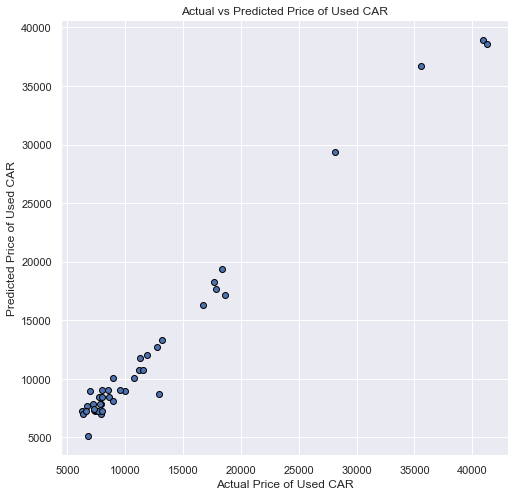

In [242]:
# CAR Price Prediction Plot upon Y_test data
# Actual CAR Price vs Predicted CAR Price of Used CAR... Plotting"
xlabel("Actual Price of Used CAR")
ylabel("Predicted Price of Used CAR")
title("Actual vs Predicted Price of Used CAR")
scatter(Y_test, Predicted_CARPrice_Y)

<AxesSubplot:title={'center':'Residual Distribution of Predicted Used CAR Price'}, xlabel='price'>

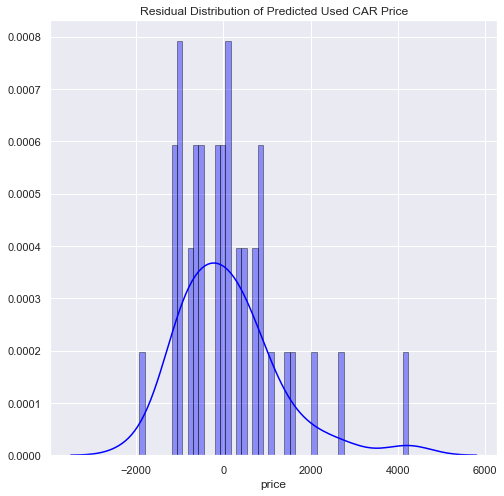

In [243]:
title("Residual Distribution of Predicted Used CAR Price")
distplot((Y_test-Predicted_CARPrice_Y),bins=50, hist_kws=dict(edgecolor="black", linewidth=1), color='Blue')   # bins=50 tells no of Bars ie 50

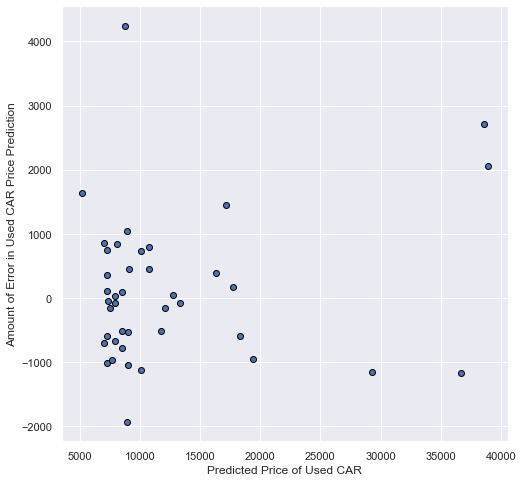

In [244]:
xlabel("Predicted Price of Used CAR")
ylabel("Amount of Error in Used CAR Price Prediction")
Residual=(Y_test-Predicted_CARPrice_Y)
scatter(Predicted_CARPrice_Y, Residual)

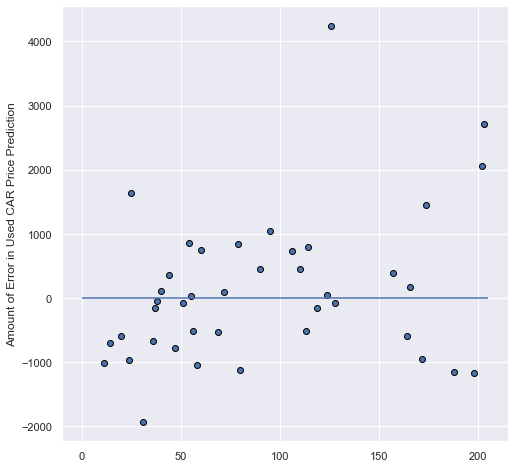

In [245]:
ylabel("Amount of Error in Used CAR Price Prediction")
Residual=(Y_test-Predicted_CARPrice_Y)
scatter(Residual.index, Residual.values)
hlines(0,0,205) # 205 is the no of Observations

In [246]:
# Durbin Watson Auto-Correlation Test
# The Durbin-Watson statistic will always have a value between 0 and 4.
# A value of 2.0 means that there is no autocorrelation detected in the sample.
from statsmodels.stats.stattools import durbin_watson
durbin_watson(Residual)

2.1712254068472654

In [247]:
# Model Accuracy Evaluation
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test,Predicted_CARPrice_Y))
print('MSE:', metrics.mean_squared_error(Y_test,Predicted_CARPrice_Y))
print('RMSE:', sqrt(metrics.mean_squared_error(Y_test,Predicted_CARPrice_Y)))

MAE: 828.4381904218146
MSE: 1318569.1737829621
RMSE: 1148.28967328935


D:\D Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  """


# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

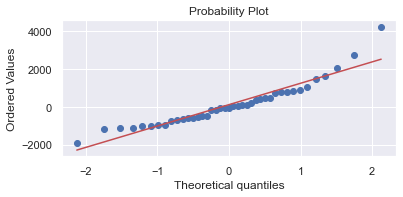

In [248]:
# Plotting the Regression Line
from scipy.stats import probplot
Residual=(Y_test-Predicted_CARPrice_Y)
fig, ax = subplots(figsize=(6,2.5))
_, (__, ___, r) = probplot(Residual, plot=ax, fit=True)

In [249]:
# Normality Check of Residual by Using Shapiro
from scipy.stats import shapiro
stat,p = shapiro(Residual)
if p >= 0.05:
    print("Alternate Hypothesis (H1): Residual is Normally distributed")
else:
    print("Null Hypothesis (H0) : Residual is not Normally Distributed")
print("Confidence Level : {} %".format(((1- p)*100)))

Null Hypothesis (H0) : Residual is not Normally Distributed
Confidence Level : 99.68752874992788 %


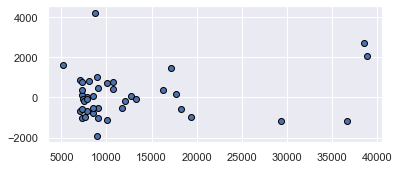

In [250]:
# (Y_test-Price_Prediction) is Residual Actually
Residual=(Y_test-Predicted_CARPrice_Y)
fig, ax = subplots(figsize=(6,2.5))
_=ax.scatter(Predicted_CARPrice_Y, Residual)

# Heteroscedasticity Tests

In [251]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.api import *
from statsmodels.formula.api import ols

In [253]:
# het_white test
white_test = het_white(Residual, add_constant(X_test))

In [254]:
# het_breuschpagan test
Breusch_Pagan_test = het_breuschpagan(Residual, X_test)

In [255]:
# Heteroscedasticity Tests
# What you get are two test statistics and two p-values (textbooks prefer the LM test, but the F test is widely used and basically equivalent). Heteroskedasticity is indicated if p <0.05, so according to these tests, this model is homoskedastic.
# The only caveat is that these tests can return low p-values when the model is not heteroskedastic if the model is otherwise flawed (most commonly due to omitted variable bias).
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
Breusch_Pagan_test=dict(zip(labels, Breusch_Pagan_test))
white_test=dict(zip(labels, white_test))
Breusch_Pagan_test, white_test

({'LM Statistic': 11.460037437593977,
  'LM-Test p-value': 0.4055653851659829,
  'F-Statistic': 1.202645940443864,
  'F-Test p-value': 0.3271708259666913},
 {'LM Statistic': 7.476249378686231,
  'LM-Test p-value': 0.9629535558298199,
  'F-Statistic': 0.3345202687702687,
  'F-Test p-value': 0.9864161858257979})

# Auto-Correlation plot

D:\D Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


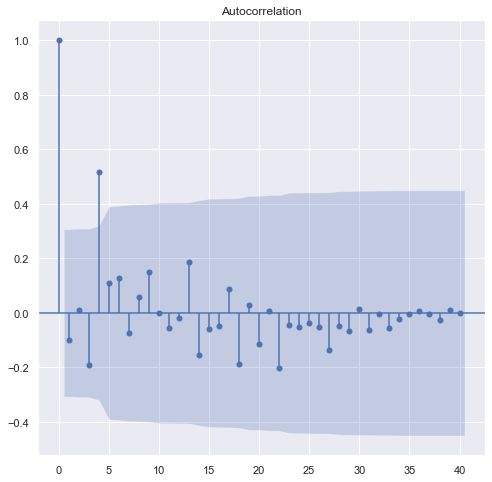

In [258]:
# Auto-Correlation plot
# Auto-correlation could Happen If we exclude any important key indp varib from the linear model then the varib reflects into errors
# Auto-correlation could Happen in time series data if we fill up any missing value with mean.
# residuals are not auto-corelated (lag of 1st order residual are not auto corelated) 
# Durbin-Watson statistic d = 2(1-r) where r is pearsons corelation coefficient & it ranges 0 to 4 
# 0 if perfectly auto corelated, 2 if uncorelated , 4 if perfectly negatively related
# Ho: there is no auto corelation in 1 st order lag of residual
# Ho: there exist auto corelation in 1 st order lag of residual
# Et=P(Et-1)+Wt, Et is a function of Et-1, Et is a function of one lag Below it(previous lag)
from statsmodels.tsa.api import *
Auto_Correlation=graphics.plot_acf((Y_test-Predicted_CARPrice_Y), lags=40, alpha=0.05)
Auto_Correlation.show()